In [578]:
# install / import required packages

!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [579]:
# read in raw data files as dataframes

groups_raw = pd.read_csv('groups.csv')
students_raw = pd.read_csv('students.csv')
scores_raw = pd.read_csv('scores.csv')

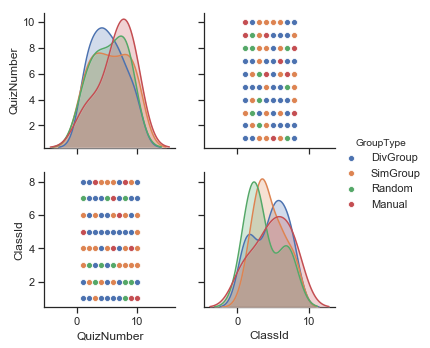

In [580]:
sns.set(style="ticks")
sns.pairplot(groups_raw, hue="GroupType")

In [581]:
# confirm rows and columns of each dataframe

print('\n',groups_raw.head())
print('\n',students_raw.head())
print('\n',scores_raw.head())


   GroupType  QuizNumber  ClassId
0  DivGroup           1        1
1  DivGroup           2        1
2  SimGroup           3        1
3  DivGroup           4        1
4  DivGroup           5        1

    StudentId        Race Gender  ClassId   Teacher
0          6     Martian      M        1  TeacherA
1         14    Venutian      F        1  TeacherA
2         22   Atlantean     NB        1  TeacherA
3         30   Atlantean      F        1  TeacherA
4         38  Liliputian      M        1  TeacherA

    StudentId  QuizNumber  Score
0          1           1     45
1          2           1     54
2          3           1     47
3          4           1     55
4          5           1     52


In [440]:
# define key helper function #1 (creating bar chart with legend)

def bar_chart_with_legend(df, xlabel, ylabel, title):
    rows = df.index.values
    bars = {}
    label_values = []
    label_names = []

    for i in range(len(df.columns.values)):
        bar_bottom = sum(bars.values())
        bars[df.columns.values[i]] = df.iloc[:,i].fillna(0)
        grouptype_i = plt.bar(rows, bars[df.columns.values[i]], bottom=bar_bottom)
        label_values.append(grouptype_i[0])
        label_names.append(df.iloc[:,i].fillna(0).name)
        if len(label_values) < 20:
            plt.legend(label_values, label_names)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    plt.clf()

In [442]:
# define key helper function #2 (profiling dataframes)

def dataframe_profile(dataframe):
    
    print('Top 5 Rows')
    print(dataframe.head())
    
    print('\nDataframe Info (Entries, Nulls, Data Types)')
    print(dataframe.info())
    
    print('\nDataframe Description By Column')
    print(dataframe.describe(include='all'))
    
    for i in range(len(dataframe.columns)): 
        print('\nValue Counts For', dataframe.columns[i], "Column")
        #fdataframe.iloc[:,i].plot(kind='hist')
        #plt.show()
        print(dataframe.groupby(dataframe.columns[i]).size())
    
    for i in range(len(dataframe.columns)):
        for j in range(i, len(dataframe.columns)):
            if i != j: 
                
                print('\nValue Counts For', dataframe.columns[j], "And", dataframe.columns[i], "Columns")
                grouped_views_1 = dataframe.groupby([dataframe.columns[j], dataframe.columns[i]]).size().unstack()
                print(grouped_views_1)
                
                grouped_views_2 = dataframe.groupby([dataframe.columns[j]]).size().fillna(0)
                pcnt_of_totals = grouped_views_1.fillna(0).divide(grouped_views_2,axis=0)
                bar_chart_with_legend(pcnt_of_totals, dataframe.columns[j], '% of Total', 'Distribution of ' + dataframe.columns[i] + ' by ' + dataframe.columns[j])
            

Top 5 Rows
  GroupType  QuizNumber  ClassId
0  DivGroup           1        1
1  DivGroup           2        1
2  SimGroup           3        1
3  DivGroup           4        1
4  DivGroup           5        1

Dataframe Info (Entries, Nulls, Data Types)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
GroupType     80 non-null object
QuizNumber    80 non-null int64
ClassId       80 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.0+ KB
None

Dataframe Description By Column
       GroupType  QuizNumber    ClassId
count         80   80.000000  80.000000
unique         4         NaN        NaN
top     DivGroup         NaN        NaN
freq          36         NaN        NaN
mean         NaN    5.500000   4.500000
std          NaN    2.890403   2.305744
min          NaN    1.000000   1.000000
25%          NaN    3.000000   2.750000
50%          NaN    5.500000   4.500000
75%          NaN    8.000000   6.250000
max          NaN   

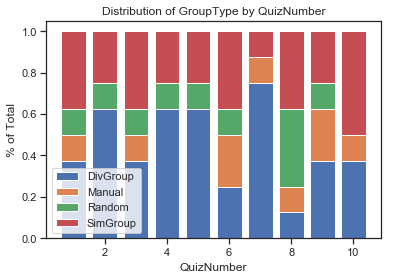


Value Counts For ClassId And GroupType Columns
GroupType  DivGroup  Manual  Random  SimGroup
ClassId                                      
1               6.0     2.0     1.0       1.0
2               4.0     NaN     3.0       3.0
3               2.0     NaN     3.0       5.0
4               2.0     2.0     NaN       6.0
5               8.0     1.0     NaN       1.0
6               4.0     1.0     NaN       5.0
7               6.0     1.0     3.0       NaN
8               4.0     2.0     NaN       4.0


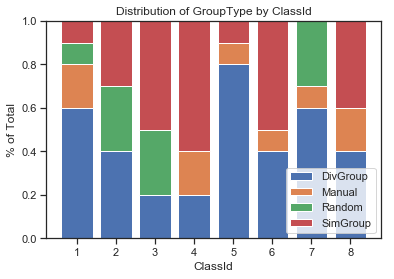


Value Counts For ClassId And QuizNumber Columns
QuizNumber  1   2   3   4   5   6   7   8   9   10
ClassId                                           
1            1   1   1   1   1   1   1   1   1   1
2            1   1   1   1   1   1   1   1   1   1
3            1   1   1   1   1   1   1   1   1   1
4            1   1   1   1   1   1   1   1   1   1
5            1   1   1   1   1   1   1   1   1   1
6            1   1   1   1   1   1   1   1   1   1
7            1   1   1   1   1   1   1   1   1   1
8            1   1   1   1   1   1   1   1   1   1


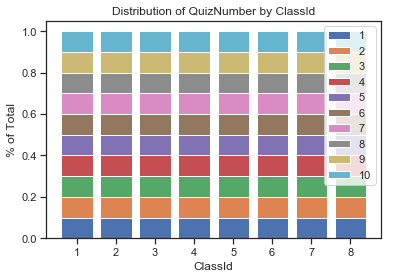

<Figure size 432x288 with 0 Axes>

In [443]:
# check structure and contents of groups table
# things to address: nothing
# key takeaways: 
    # 1. 80 rows as expected (10 quizzes * 8 classes)
    # 2. Group Type is string (4 distinct), Quiz Number is int (10 distinct), ClassId is int (8 distinct)
    # 3. DivGroup (36) is most common, followed by SimGroup (25), then Random and Manual (9 and 10)
    # 4. Distribution of GroupType by QuizNumber varies dramatically
    # 5. Distribution of GroupType by ClassId varies dramatically also
dataframe_profile(groups_raw)

Top 5 Rows
   StudentId        Race Gender  ClassId   Teacher
0          6     Martian      M        1  TeacherA
1         14    Venutian      F        1  TeacherA
2         22   Atlantean     NB        1  TeacherA
3         30   Atlantean      F        1  TeacherA
4         38  Liliputian      M        1  TeacherA

Dataframe Info (Entries, Nulls, Data Types)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
StudentId    240 non-null int64
Race         240 non-null object
Gender       239 non-null object
ClassId      240 non-null int64
Teacher      240 non-null object
dtypes: int64(2), object(3)
memory usage: 9.5+ KB
None

Dataframe Description By Column
        StudentId       Race Gender     ClassId   Teacher
count   240.00000        240    239  240.000000       240
unique        NaN          4      4         NaN         4
top           NaN  Atlantean      M         NaN  TeacherA
freq          NaN         94    104         NaN    

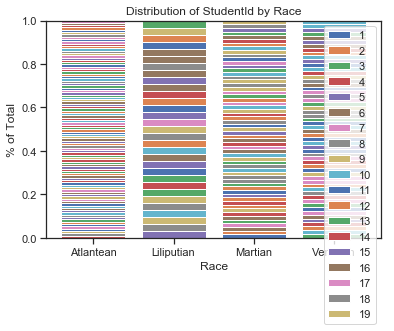


Value Counts For Gender And StudentId Columns
StudentId  3    5    8    10   11   12   14   15   25   26  ...   196  197  \
Gender                                                      ...              
F          1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0 ...   NaN  NaN   
Fe         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
M          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
NB         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   1.0  1.0   

StudentId  199  201  212  213  217  231  234  237  
Gender                                             
F          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Fe         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
M          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
NB         1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[4 rows x 239 columns]


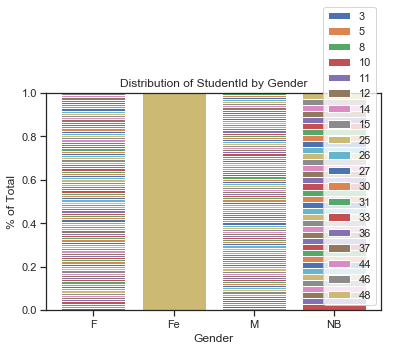


Value Counts For ClassId And StudentId Columns
StudentId  1    2    3    4    5    6    7    8    9    10  ...   231  232  \
ClassId                                                     ...              
1          NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN ...   NaN  NaN   
2          NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN ...   NaN  1.0   
3          NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
4          NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
5          NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN ...   1.0  NaN   
6          NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
7          1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN ...   NaN  NaN   
8          NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0 ...   NaN  NaN   

StudentId  233  234  235  236  237  238  239  240  
ClassId                                            
1          NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  
2          NaN 

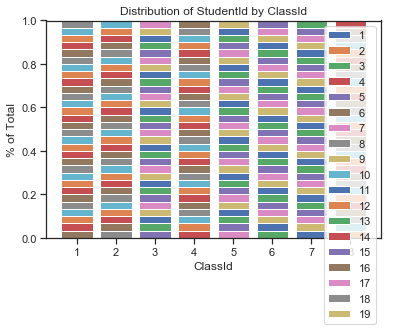


Value Counts For Teacher And StudentId Columns
StudentId  1    2    3    4    5    6    7    8    9    10  ...   231  232  \
Teacher                                                     ...              
TeacherA   NaN  NaN  NaN  NaN  NaN  1.0  NaN  1.0  NaN  NaN ...   NaN  1.0   
TeacherB   NaN  NaN  NaN  1.0  1.0  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
TeacherC   NaN  NaN  1.0  NaN  NaN  NaN  1.0  NaN  NaN  NaN ...   1.0  NaN   
TeacherD   1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0 ...   NaN  NaN   

StudentId  233  234  235  236  237  238  239  240  
Teacher                                            
TeacherA   NaN  NaN  NaN  NaN  NaN  1.0  NaN  1.0  
TeacherB   NaN  NaN  NaN  1.0  1.0  NaN  NaN  NaN  
TeacherC   NaN  NaN  1.0  NaN  NaN  NaN  1.0  NaN  
TeacherD   1.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  

[4 rows x 240 columns]


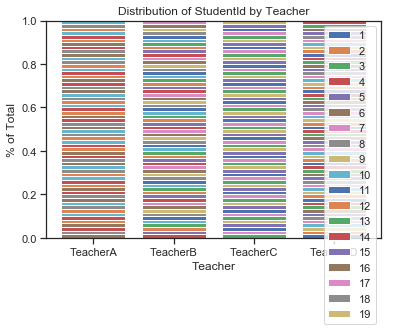


Value Counts For Gender And Race Columns
Race    Atlantean  Liliputian  Martian  Venutian
Gender                                          
F            36.0         7.0      NaN      55.0
Fe            NaN         NaN      NaN       1.0
M            27.0        19.0     58.0       NaN
NB           31.0         5.0      NaN       NaN


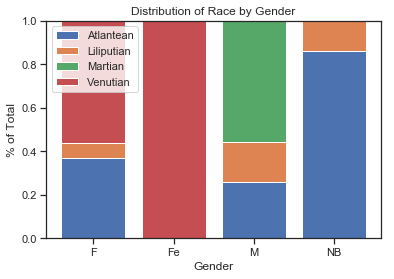


Value Counts For ClassId And Race Columns
Race     Atlantean  Liliputian  Martian  Venutian
ClassId                                          
1               10           3        7        10
2               14           2        8         6
3               11           5        9         5
4               11           5        7         7
5               11           4        6         9
6               13           4        8         5
7               15           2        5         8
8                9           6        9         6


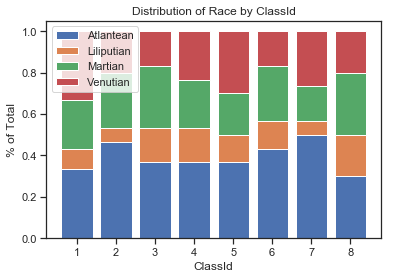


Value Counts For Teacher And Race Columns
Race      Atlantean  Liliputian  Martian  Venutian
Teacher                                           
TeacherA         24           5       15        16
TeacherB         22          10       16        12
TeacherC         24           8       14        14
TeacherD         24           8       14        14


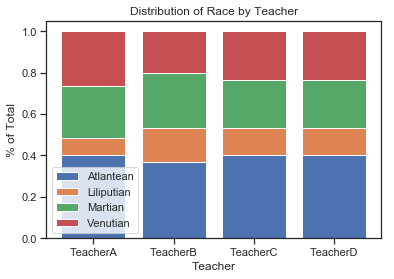


Value Counts For ClassId And Gender Columns
Gender      F   Fe     M   NB
ClassId                      
1        17.0  NaN  11.0  2.0
2        14.0  NaN  15.0  1.0
3         9.0  NaN  14.0  6.0
4        12.0  NaN  11.0  7.0
5        10.0  NaN  11.0  9.0
6        12.0  1.0  16.0  1.0
7        13.0  NaN  11.0  6.0
8        11.0  NaN  15.0  4.0


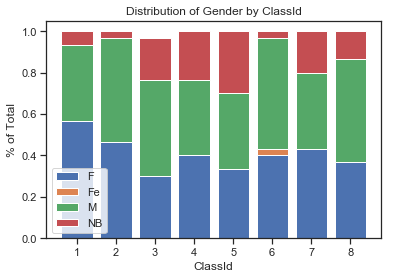


Value Counts For Teacher And Gender Columns
Gender       F   Fe     M    NB
Teacher                        
TeacherA  31.0  NaN  26.0   3.0
TeacherB  21.0  NaN  25.0  13.0
TeacherC  22.0  1.0  27.0  10.0
TeacherD  24.0  NaN  26.0  10.0


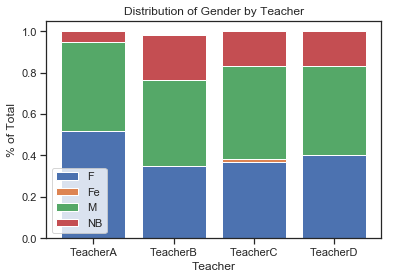


Value Counts For Teacher And ClassId Columns
ClassId      1     2     3     4     5     6     7     8
Teacher                                                 
TeacherA  30.0  30.0   NaN   NaN   NaN   NaN   NaN   NaN
TeacherB   NaN   NaN  30.0  30.0   NaN   NaN   NaN   NaN
TeacherC   NaN   NaN   NaN   NaN  30.0  30.0   NaN   NaN
TeacherD   NaN   NaN   NaN   NaN   NaN   NaN  30.0  30.0


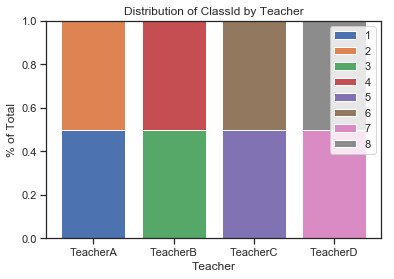

<Figure size 432x288 with 0 Axes>

In [450]:
# check structure and contents of students table 
# things to address: null value for Gender, miscellaneous gender values (Fe -- likely F, null -- likely  M)
# key takeaways: 
    # 1. 240 rows numbered 0 to 239(30 students per class * 8 classes)
    # 2. 5 columns (StudentId, Race, Gender, ClassId, Teacher)
    # 3. Gender has four distinct values + 1 null, though really should have just three distinct (M, F, NB)
    # 4. Race has four distinct values (Martian, Venutian, Atlantean, Liliputian)
    # 5. Teacher has four distinct values (Teachers A through D)
    # 6. Every teacher has exactly 60 students split evenly across two classes
    # 7. Martians look like they're only M Gender, Venutians look like only F Gender, other two are split
    # 8. Relatively even distribution of Race across classrooms / teachers
    # 9. Slightly less even distribution of Gender across classrooms / teachers (ex. 1, 2, 6)
dataframe_profile(students_raw)

In [582]:
# fill in value for student with missing gender 
# Martians are only M, so assuming M here (would want to confirm here)
students_raw[students_raw['Gender'].isnull()] 
students_raw.loc[students_raw['Gender'].isnull(), 'Gender'] = 'M'

StudentId     Race Gender  ClassId   Teacher
81        173  Martian    NaN        3  TeacherB

In [583]:
# fill in value for student with gender = 'Fe'
# looks like this should be 'F' - all other Venutians are F (there's only one Fe)
students_raw[students_raw['Gender'] == 'Fe']
students_raw[students_raw['Race'] == 'Venutian']
students_raw.loc[students_raw['Gender'] == 'Fe', 'Gender'] = 'F'

StudentId      Race Gender  ClassId   Teacher
158         67  Venutian     Fe        6  TeacherC

StudentId      Race Gender  ClassId   Teacher
1           14  Venutian      F        1  TeacherA
7           62  Venutian      F        1  TeacherA
12         102  Venutian      F        1  TeacherA
13         110  Venutian      F        1  TeacherA
14         118  Venutian      F        1  TeacherA
19         158  Venutian      F        1  TeacherA
21         174  Venutian      F        1  TeacherA
23         190  Venutian      F        1  TeacherA
25         206  Venutian      F        1  TeacherA
28         230  Venutian      F        1  TeacherA
35          48  Venutian      F        2  TeacherA
40          88  Venutian      F        2  TeacherA
45         128  Venutian      F        2  TeacherA
53         192  Venutian      F        2  TeacherA
56         216  Venutian      F        2  TeacherA
59         240  Venutian      F        2  TeacherA
64          37  Venutian      F        3  TeacherB
69          77  Venutian      F        3  TeacherB
72         101  Venutian      F        3  TeacherB
76         133  Venutian      F        3  TeacherB
82         181  Venutian      F        3  TeacherB
91          12  Venutian      F        4  TeacherB
95          44  Venutian      F        4  TeacherB
100         84  Venutian      F        4  TeacherB
102        100  Venutian      F        4  TeacherB
109        156  Venutian      F        4  TeacherB
112        180  Venutian      F        4  TeacherB
115        204  Venutian      F        4  TeacherB
121         15  Venutian      F        5  TeacherC
123         31  Venutian      F        5  TeacherC
129         79  Venutian      F        5  TeacherC
130         87  Venutian      F        5  TeacherC
131         95  Venutian      F        5  TeacherC
133        111  Venutian      F        5  TeacherC
138        151  Venutian      F        5  TeacherC
146        215  Venutian      F        5  TeacherC
147        223  Venutian      F        5  TeacherC
150          3  Venutian      F        6  TeacherC
153         27  Venutian      F        6  TeacherC
158         67  Venutian     Fe        6  TeacherC
161         91  Venutian      F        6  TeacherC
168        147  Venutian      F        6  TeacherC
184         33  Venutian      F        7  TeacherD
190         81  Venutian      F        7  TeacherD
194        113  Venutian      F        7  TeacherD
196        129  Venutian      F        7  TeacherD
197        137  Venutian      F        7  TeacherD
201        169  Venutian      F        7  TeacherD
203        185  Venutian      F        7  TeacherD
208        225  Venutian      F        7  TeacherD
211         10  Venutian      F        8  TeacherD
213         26  Venutian      F        8  TeacherD
216         50  Venutian      F        8  TeacherD
220         82  Venutian      F        8  TeacherD
223        106  Venutian      F        8  TeacherD
227        138  Venutian      F        8  TeacherD

Top 5 Rows
   StudentId  QuizNumber  Score
0          1           1     45
1          2           1     54
2          3           1     47
3          4           1     55
4          5           1     52

Dataframe Info (Entries, Nulls, Data Types)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
StudentId     2340 non-null int64
QuizNumber    2340 non-null int64
Score         2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB
None

Dataframe Description By Column
         StudentId   QuizNumber        Score
count  2340.000000  2340.000000  2340.000000
mean    120.487179     5.435897    65.038034
std      69.296423     2.881097    10.761824
min       1.000000     1.000000    27.000000
25%      60.750000     3.000000    58.000000
50%     120.500000     5.000000    66.000000
75%     180.250000     8.000000    73.000000
max     240.000000    10.000000    93.000000

Value Counts For StudentId Column
StudentId
1      10
2      

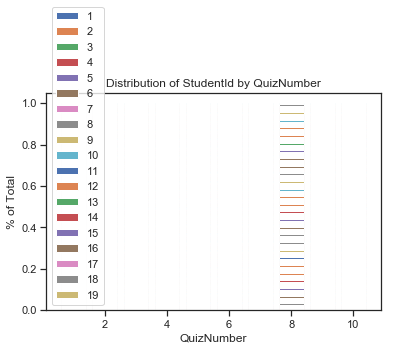


Value Counts For Score And StudentId Columns
StudentId  1    2    3    4    5    6    7    8    9    10  ...   231  232  \
Score                                                       ...              
27         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
28         1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
32         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
33         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
34         NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN ...   NaN  NaN   
35         NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
36         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
37         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN ...   NaN  NaN   
39         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
40         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
41         NaN  1.

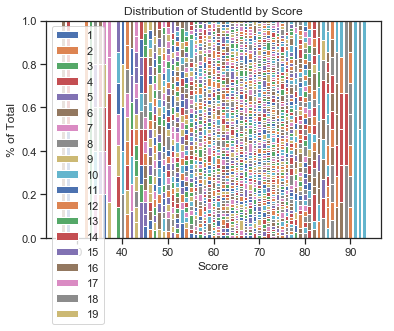


Value Counts For Score And QuizNumber Columns
QuizNumber    1     2     3     4     5     6     7     8     9     10
Score                                                                 
27           NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
28           NaN   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN
32           NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
33           1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
34           2.0   NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
35           1.0   NaN   3.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN
36           4.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
37           2.0   NaN   1.0   NaN   NaN   2.0   NaN   1.0   NaN   NaN
39           2.0   NaN   1.0   NaN   NaN   3.0   NaN   1.0   NaN   NaN
40           3.0   NaN   NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN
41           2.0   NaN   2.0   3.0   NaN   2.0   NaN   NaN   NaN   NaN
42           4.0   NaN   1.0  

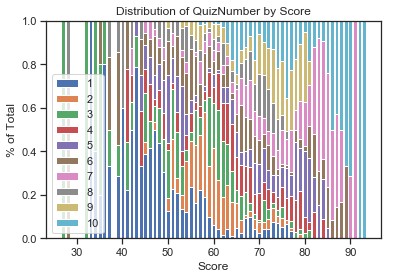

<Figure size 432x288 with 0 Axes>

In [503]:
# check structure and contents of student table
# things to address: nothing
# key takeaways:
    # 1. 2340 rows (180 students * 10 quizzes + 60 students * 9 quizzes) - all students have 9 or 10 quizzes
    # 2. Bar charts show score distributions increasing from quiz 1 to quiz 10
    # 3. No null values - StudentId, QuizNumber, and Score all ints
    # 4. Score distribution has mean of ~65, std of ~11, min of 27 and max = 93
dataframe_profile(scores_raw)

   StudentId  QuizNumber  Score       Race Gender  ClassId   Teacher GroupType
0          1           1     45    Martian      M        7  TeacherD    Random
1          9           1     41  Atlantean      M        7  TeacherD    Random
2         17           1     37  Atlantean     NB        7  TeacherD    Random
3         25           1     35  Atlantean      F        7  TeacherD    Random
4         33           1     39   Venutian      F        7  TeacherD    Random
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2339
Data columns (total 8 columns):
StudentId     2340 non-null int64
QuizNumber    2340 non-null int64
Score         2340 non-null int64
Race          2340 non-null object
Gender        2340 non-null object
ClassId       2340 non-null int64
Teacher       2340 non-null object
GroupType     2340 non-null object
dtypes: int64(4), object(4)
memory usage: 164.5+ KB
None
Top 5 Rows
   StudentId  QuizNumber  Score       Race Gender  ClassId   Teacher GroupTy

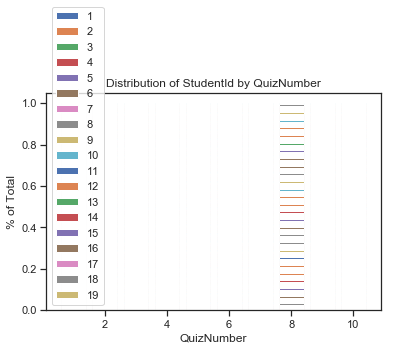


Value Counts For Score And StudentId Columns
StudentId  1    2    3    4    5    6    7    8    9    10  ...   231  232  \
Score                                                       ...              
27         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
28         1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
32         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
33         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
34         NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN ...   NaN  NaN   
35         NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
36         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
37         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN ...   NaN  NaN   
39         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
40         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN  NaN   
41         NaN  1.

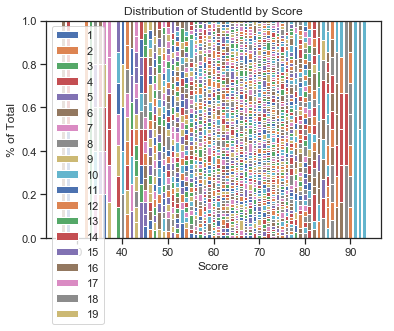


Value Counts For Race And StudentId Columns
StudentId    1     2    3     4     5     6    7     8     9     10   ...   \
Race                                                                  ...    
Atlantean    NaN   NaN  NaN  10.0   NaN   NaN  NaN  10.0  10.0   NaN  ...    
Liliputian   NaN   NaN  NaN   NaN  10.0   NaN  NaN   NaN   NaN   NaN  ...    
Martian     10.0  10.0  NaN   NaN   NaN  10.0  9.0   NaN   NaN   NaN  ...    
Venutian     NaN   NaN  9.0   NaN   NaN   NaN  NaN   NaN   NaN  10.0  ...    

StudentId   231   232   233   234  235   236   237   238  239   240  
Race                                                                 
Atlantean   9.0  10.0   NaN  10.0  NaN  10.0  10.0   NaN  NaN   NaN  
Liliputian  NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  NaN   NaN  
Martian     NaN   NaN  10.0   NaN  9.0   NaN   NaN  10.0  9.0   NaN  
Venutian    NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN  NaN  10.0  

[4 rows x 240 columns]


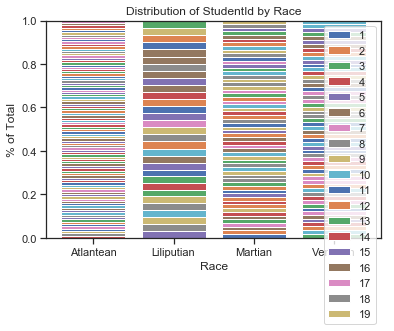


Value Counts For Gender And StudentId Columns
StudentId   1     2    3     4     5     6    7     8     9     10   ...   \
Gender                                                               ...    
F           NaN   NaN  9.0   NaN  10.0   NaN  NaN  10.0   NaN  10.0  ...    
M          10.0  10.0  NaN   NaN   NaN  10.0  9.0   NaN  10.0   NaN  ...    
NB          NaN   NaN  NaN  10.0   NaN   NaN  NaN   NaN   NaN   NaN  ...    

StudentId  231   232   233   234  235   236   237   238  239   240  
Gender                                                              
F          NaN  10.0   NaN   NaN  NaN   NaN   NaN   NaN  NaN  10.0  
M          NaN   NaN  10.0   NaN  9.0  10.0   NaN  10.0  9.0   NaN  
NB         9.0   NaN   NaN  10.0  NaN   NaN  10.0   NaN  NaN   NaN  

[3 rows x 240 columns]


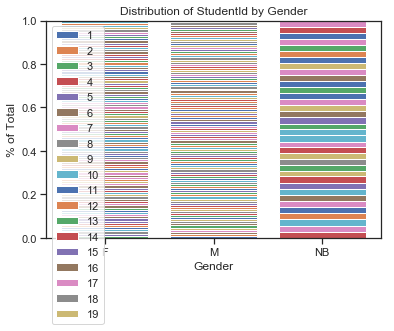


Value Counts For ClassId And StudentId Columns
StudentId   1     2    3     4     5     6    7     8     9     10   ...   \
ClassId                                                              ...    
1           NaN   NaN  NaN   NaN   NaN  10.0  NaN   NaN   NaN   NaN  ...    
2           NaN   NaN  NaN   NaN   NaN   NaN  NaN  10.0   NaN   NaN  ...    
3           NaN   NaN  NaN   NaN  10.0   NaN  NaN   NaN   NaN   NaN  ...    
4           NaN   NaN  NaN  10.0   NaN   NaN  NaN   NaN   NaN   NaN  ...    
5           NaN   NaN  NaN   NaN   NaN   NaN  9.0   NaN   NaN   NaN  ...    
6           NaN   NaN  9.0   NaN   NaN   NaN  NaN   NaN   NaN   NaN  ...    
7          10.0   NaN  NaN   NaN   NaN   NaN  NaN   NaN  10.0   NaN  ...    
8           NaN  10.0  NaN   NaN   NaN   NaN  NaN   NaN   NaN  10.0  ...    

StudentId  231   232   233   234  235   236   237   238  239   240  
ClassId                                                             
1          NaN   NaN   NaN   NaN  NaN   NaN

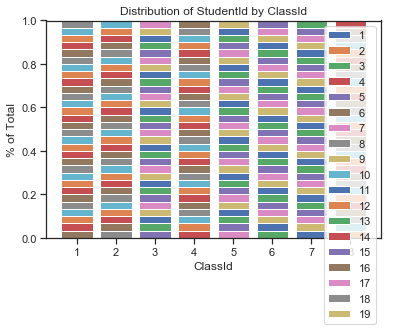


Value Counts For Teacher And StudentId Columns
StudentId   1     2    3     4     5     6    7     8     9     10   ...   \
Teacher                                                              ...    
TeacherA    NaN   NaN  NaN   NaN   NaN  10.0  NaN  10.0   NaN   NaN  ...    
TeacherB    NaN   NaN  NaN  10.0  10.0   NaN  NaN   NaN   NaN   NaN  ...    
TeacherC    NaN   NaN  9.0   NaN   NaN   NaN  9.0   NaN   NaN   NaN  ...    
TeacherD   10.0  10.0  NaN   NaN   NaN   NaN  NaN   NaN  10.0  10.0  ...    

StudentId  231   232   233   234  235   236   237   238  239   240  
Teacher                                                             
TeacherA   NaN  10.0   NaN   NaN  NaN   NaN   NaN  10.0  NaN  10.0  
TeacherB   NaN   NaN   NaN   NaN  NaN  10.0  10.0   NaN  NaN   NaN  
TeacherC   9.0   NaN   NaN   NaN  9.0   NaN   NaN   NaN  9.0   NaN  
TeacherD   NaN   NaN  10.0  10.0  NaN   NaN   NaN   NaN  NaN   NaN  

[4 rows x 240 columns]


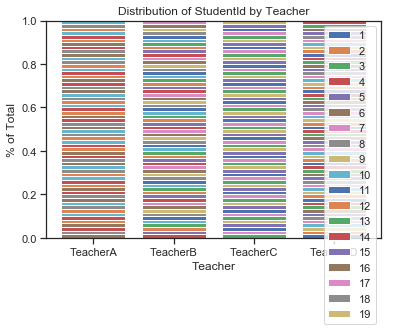


Value Counts For GroupType And StudentId Columns
StudentId  1    2    3    4    5    6    7    8    9    10  ...   231  232  \
GroupType                                                   ...              
DivGroup   6.0  4.0  4.0  2.0  2.0  6.0  7.0  4.0  6.0  4.0 ...   7.0  4.0   
Manual     1.0  2.0  1.0  2.0  NaN  2.0  1.0  NaN  1.0  2.0 ...   1.0  NaN   
Random     3.0  NaN  NaN  NaN  3.0  1.0  NaN  3.0  3.0  NaN ...   NaN  3.0   
SimGroup   NaN  4.0  4.0  6.0  5.0  1.0  1.0  3.0  NaN  4.0 ...   1.0  3.0   

StudentId  233  234  235  236  237  238  239  240  
GroupType                                          
DivGroup   6.0  4.0  4.0  2.0  2.0  6.0  7.0  4.0  
Manual     1.0  2.0  1.0  2.0  NaN  2.0  1.0  NaN  
Random     3.0  NaN  NaN  NaN  3.0  1.0  NaN  3.0  
SimGroup   NaN  4.0  4.0  6.0  5.0  1.0  1.0  3.0  

[4 rows x 240 columns]


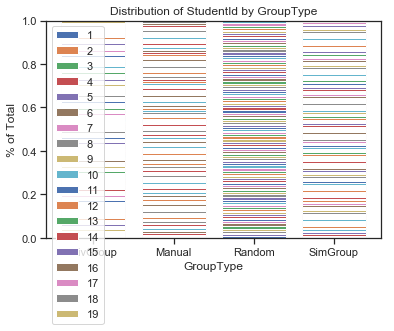


Value Counts For Score And QuizNumber Columns
QuizNumber    1     2     3     4     5     6     7     8     9     10
Score                                                                 
27           NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
28           NaN   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN
32           NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
33           1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
34           2.0   NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
35           1.0   NaN   3.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN
36           4.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN
37           2.0   NaN   1.0   NaN   NaN   2.0   NaN   1.0   NaN   NaN
39           2.0   NaN   1.0   NaN   NaN   3.0   NaN   1.0   NaN   NaN
40           3.0   NaN   NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN
41           2.0   NaN   2.0   3.0   NaN   2.0   NaN   NaN   NaN   NaN
42           4.0   NaN   1.0  

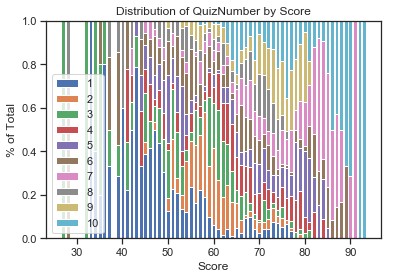


Value Counts For Race And QuizNumber Columns
QuizNumber  1   2   3   4   5   6   7   8   9   10
Race                                              
Atlantean   94  94  94  94  94  94  94  70  94  94
Liliputian  31  31  31  31  31  31  31  23  31  31
Martian     59  59  59  59  59  59  59  45  59  59
Venutian    56  56  56  56  56  56  56  42  56  56


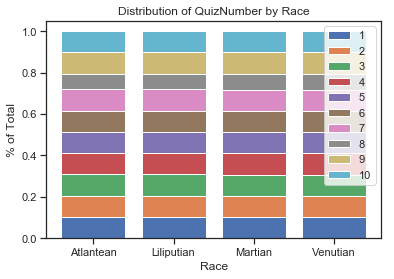


Value Counts For Gender And QuizNumber Columns
QuizNumber   1    2    3    4    5    6    7   8    9    10
Gender                                                     
F            99   99   99   99   99   99   99  76   99   99
M           105  105  105  105  105  105  105  78  105  105
NB           36   36   36   36   36   36   36  26   36   36


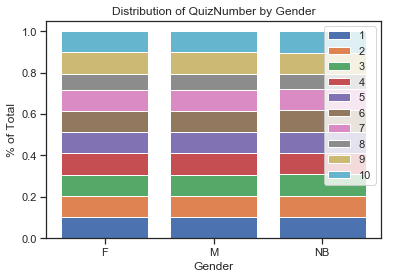


Value Counts For ClassId And QuizNumber Columns
QuizNumber    1     2     3     4     5     6     7     8     9     10
ClassId                                                               
1           30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0
2           30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0
3           30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0
4           30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0
5           30.0  30.0  30.0  30.0  30.0  30.0  30.0   NaN  30.0  30.0
6           30.0  30.0  30.0  30.0  30.0  30.0  30.0   NaN  30.0  30.0
7           30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0
8           30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0  30.0


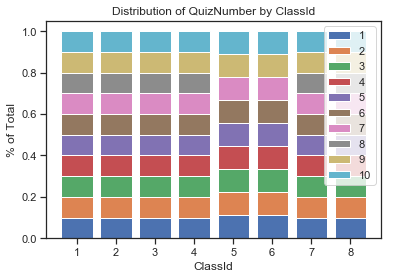


Value Counts For Teacher And QuizNumber Columns
QuizNumber    1     2     3     4     5     6     7     8     9     10
Teacher                                                               
TeacherA    60.0  60.0  60.0  60.0  60.0  60.0  60.0  60.0  60.0  60.0
TeacherB    60.0  60.0  60.0  60.0  60.0  60.0  60.0  60.0  60.0  60.0
TeacherC    60.0  60.0  60.0  60.0  60.0  60.0  60.0   NaN  60.0  60.0
TeacherD    60.0  60.0  60.0  60.0  60.0  60.0  60.0  60.0  60.0  60.0


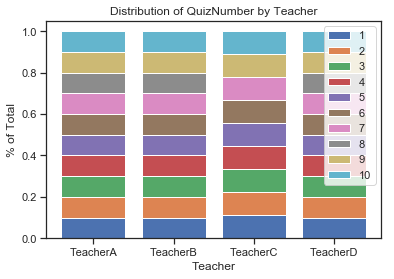


Value Counts For GroupType And QuizNumber Columns
QuizNumber    1      2     3      4      5     6      7     8     9      10
GroupType                                                                  
DivGroup    90.0  150.0  90.0  150.0  150.0  60.0  180.0   NaN  90.0   90.0
Manual      30.0    NaN  30.0    NaN    NaN  60.0   30.0  30.0  60.0   30.0
Random      30.0   30.0  30.0   30.0   30.0  30.0    NaN  90.0  30.0    NaN
SimGroup    90.0   60.0  90.0   60.0   60.0  90.0   30.0  60.0  60.0  120.0


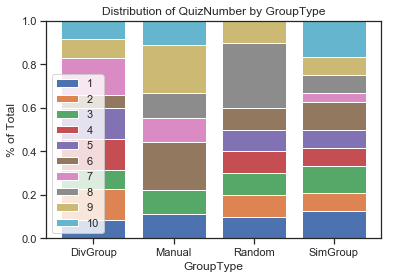


Value Counts For Race And Score Columns
Score        27   28   32   33   34   35   36   37   39   40 ...    84   85  \
Race                                                         ...              
Atlantean   NaN  NaN  NaN  1.0  NaN  2.0  1.0  4.0  3.0  1.0 ...   5.0  8.0   
Liliputian  NaN  NaN  NaN  NaN  1.0  1.0  NaN  NaN  NaN  1.0 ...   2.0  3.0   
Martian     1.0  2.0  1.0  NaN  4.0  2.0  3.0  2.0  2.0  2.0 ...   1.0  2.0   
Venutian    NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  2.0  1.0 ...   3.0  8.0   

Score        86   87   88   89   90   91   92   93  
Race                                                
Atlantean   7.0  2.0  4.0  2.0  3.0  NaN  2.0  NaN  
Liliputian  1.0  NaN  NaN  NaN  NaN  1.0  NaN  1.0  
Martian     1.0  3.0  1.0  NaN  NaN  NaN  NaN  NaN  
Venutian    3.0  2.0  1.0  1.0  4.0  NaN  NaN  NaN  

[4 rows x 63 columns]


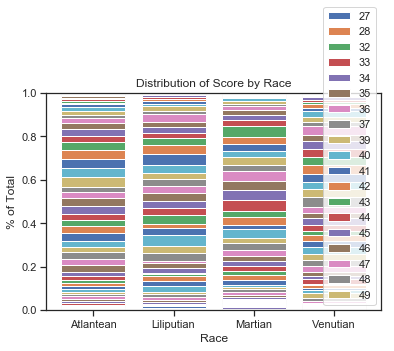


Value Counts For Gender And Score Columns
Score    27   28   32   33   34   35   36   37   39   40 ...    84    85   86  \
Gender                                                   ...                    
F       NaN  NaN  NaN  NaN  1.0  2.0  1.0  NaN  3.0  1.0 ...   8.0  13.0  9.0   
M       1.0  2.0  1.0  1.0  4.0  3.0  3.0  4.0  4.0  2.0 ...   3.0   6.0  3.0   
NB      NaN  NaN  NaN  NaN  NaN  NaN  1.0  2.0  NaN  2.0 ...   NaN   2.0  NaN   

Score    87   88   89   90   91   92   93  
Gender                                     
F       3.0  4.0  2.0  5.0  NaN  2.0  NaN  
M       3.0  1.0  1.0  1.0  NaN  NaN  NaN  
NB      1.0  1.0  NaN  1.0  1.0  NaN  1.0  

[3 rows x 63 columns]


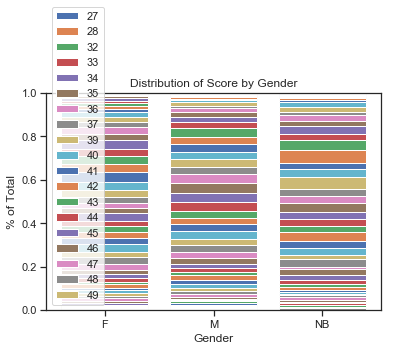


Value Counts For ClassId And Score Columns
Score     27   28   32   33   34   35   36   37   39   40 ...    84    85  \
ClassId                                                   ...               
1        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   3.0  10.0   
2        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   4.0   8.0   
3        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   2.0   NaN   
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   2.0   3.0   
5        NaN  NaN  NaN  1.0  2.0  NaN  2.0  NaN  NaN  NaN ...   NaN   NaN   
6        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN   NaN   
7        NaN  1.0  NaN  NaN  NaN  2.0  2.0  4.0  5.0  3.0 ...   NaN   NaN   
8        1.0  1.0  1.0  NaN  3.0  3.0  1.0  2.0  2.0  2.0 ...   NaN   NaN   

Score     86   87   88   89   90   91   92   93  
ClassId                                          
1        3.0  4.0  3.0  1.0  2.0  NaN  NaN  NaN  
2        9.0  3.0  3.0  2.0  5.0  1

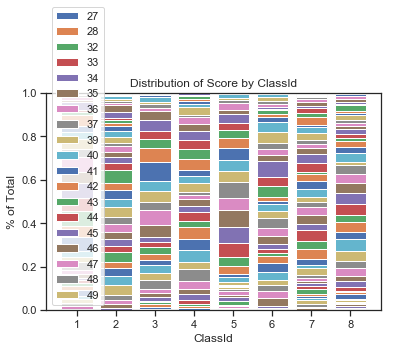


Value Counts For Teacher And Score Columns
Score      27   28   32   33   34   35   36   37   39   40 ...    84    85  \
Teacher                                                    ...               
TeacherA  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   7.0  18.0   
TeacherB  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   4.0   3.0   
TeacherC  NaN  NaN  NaN  1.0  2.0  NaN  2.0  NaN  NaN  NaN ...   NaN   NaN   
TeacherD  1.0  2.0  1.0  NaN  3.0  5.0  3.0  6.0  7.0  5.0 ...   NaN   NaN   

Score       86   87   88   89   90   91   92   93  
Teacher                                            
TeacherA  12.0  7.0  6.0  3.0  7.0  1.0  2.0  1.0  
TeacherB   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
TeacherC   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
TeacherD   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[4 rows x 63 columns]


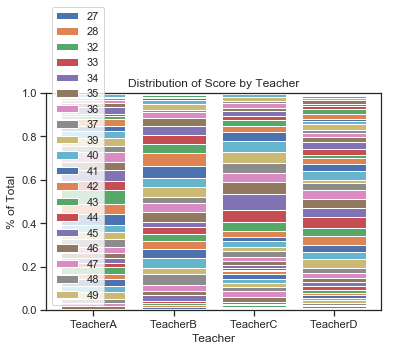


Value Counts For GroupType And Score Columns
Score       27   28   32   33   34   35   36   37   39   40 ...     84    85  \
GroupType                                                   ...                
DivGroup   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   11.0  21.0   
Manual     1.0  2.0  1.0  1.0  5.0  4.0  3.0  4.0  5.0  2.0 ...    NaN   NaN   
Random     NaN  NaN  NaN  NaN  NaN  1.0  2.0  2.0  2.0  3.0 ...    NaN   NaN   
SimGroup   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    NaN   NaN   

Score        86   87   88   89   90   91   92   93  
GroupType                                           
DivGroup   12.0  7.0  6.0  3.0  7.0  1.0  2.0  1.0  
Manual      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Random      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
SimGroup    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[4 rows x 63 columns]


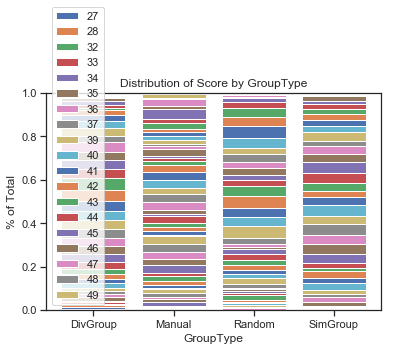


Value Counts For Gender And Race Columns
Race    Atlantean  Liliputian  Martian  Venutian
Gender                                          
F           351.0        70.0      NaN     546.0
M           265.0       182.0    576.0       NaN
NB          300.0        50.0      NaN       NaN


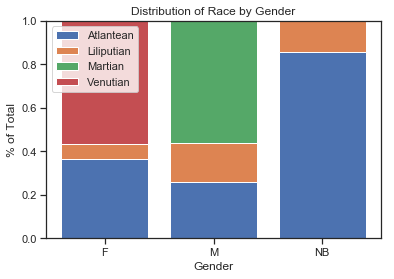


Value Counts For ClassId And Race Columns
Race     Atlantean  Liliputian  Martian  Venutian
ClassId                                          
1              100          30       70       100
2              140          20       80        60
3              110          50       90        50
4              110          50       70        70
5               99          36       54        81
6              117          36       72        45
7              150          20       50        80
8               90          60       90        60


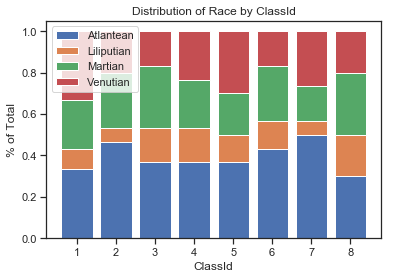


Value Counts For Teacher And Race Columns
Race      Atlantean  Liliputian  Martian  Venutian
Teacher                                           
TeacherA        240          50      150       160
TeacherB        220         100      160       120
TeacherC        216          72      126       126
TeacherD        240          80      140       140


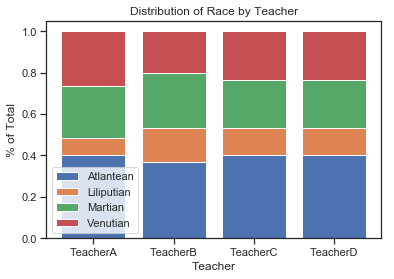


Value Counts For GroupType And Race Columns
Race       Atlantean  Liliputian  Martian  Venutian
GroupType                                          
DivGroup         415         126      246       263
Manual            99          38       65        68
Random           130          30       73        67
SimGroup         272         108      192       148


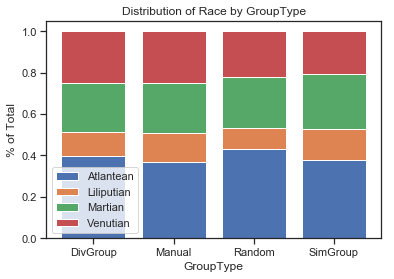


Value Counts For ClassId And Gender Columns
Gender     F    M  NB
ClassId              
1        170  110  20
2        140  150  10
3         90  150  60
4        120  110  70
5         90   99  81
6        117  144   9
7        130  110  60
8        110  150  40


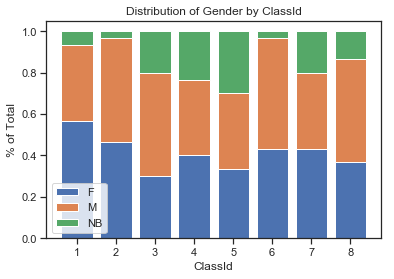


Value Counts For Teacher And Gender Columns
Gender      F    M   NB
Teacher                
TeacherA  310  260   30
TeacherB  210  260  130
TeacherC  207  243   90
TeacherD  240  260  100


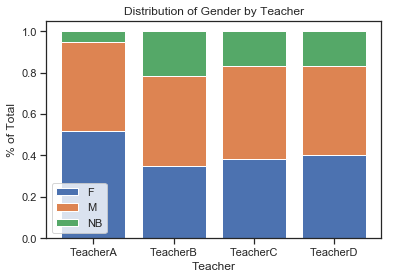


Value Counts For GroupType And Gender Columns
Gender       F    M   NB
GroupType               
DivGroup   444  445  161
Manual     116  112   42
Random     125  134   41
SimGroup   282  332  106


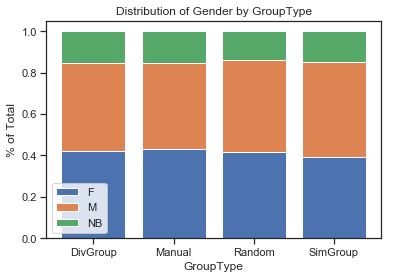


Value Counts For Teacher And ClassId Columns
ClassId       1      2      3      4      5      6      7      8
Teacher                                                         
TeacherA  300.0  300.0    NaN    NaN    NaN    NaN    NaN    NaN
TeacherB    NaN    NaN  300.0  300.0    NaN    NaN    NaN    NaN
TeacherC    NaN    NaN    NaN    NaN  270.0  270.0    NaN    NaN
TeacherD    NaN    NaN    NaN    NaN    NaN    NaN  300.0  300.0


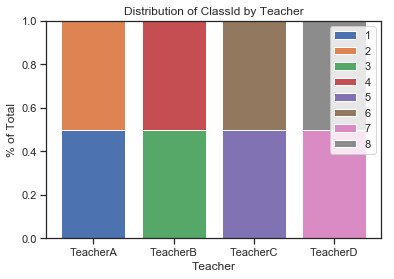


Value Counts For GroupType And ClassId Columns
ClassId        1      2      3      4      5      6      7      8
GroupType                                                        
DivGroup   180.0  120.0   60.0   60.0  210.0  120.0  180.0  120.0
Manual      60.0    NaN    NaN   60.0   30.0   30.0   30.0   60.0
Random      30.0   90.0   90.0    NaN    NaN    NaN   90.0    NaN
SimGroup    30.0   90.0  150.0  180.0   30.0  120.0    NaN  120.0


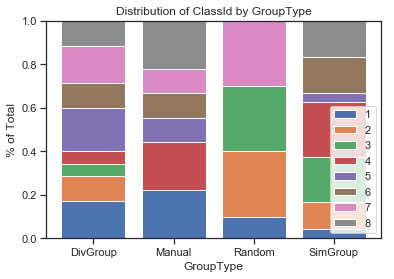


Value Counts For GroupType And Teacher Columns
Teacher    TeacherA  TeacherB  TeacherC  TeacherD
GroupType                                        
DivGroup      300.0     120.0     330.0     300.0
Manual         60.0      60.0      60.0      90.0
Random        120.0      90.0       NaN      90.0
SimGroup      120.0     330.0     150.0     120.0


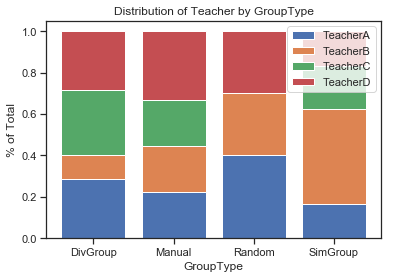

<Figure size 432x288 with 0 Axes>

In [584]:
# join tables together - first join scores to students on student id and then join to groups on quiz and class

df1 = pd.merge(left=scores_raw, right=students_raw, left_on='StudentId', right_on='StudentId')
df2 = pd.merge(left=df1, right=groups_raw, left_on=['ClassId', 'QuizNumber'], right_on=['ClassId','QuizNumber'])
print(df2.head())
print(df2.info())
dataframe_profile(df2)

In [509]:
print(df2)

      StudentId  QuizNumber  Score        Race Gender  ClassId   Teacher  \
0             1           1     45     Martian      M        7  TeacherD   
1             9           1     41   Atlantean      M        7  TeacherD   
2            17           1     37   Atlantean     NB        7  TeacherD   
3            25           1     35   Atlantean      F        7  TeacherD   
4            33           1     39    Venutian      F        7  TeacherD   
5            41           1     36   Atlantean     NB        7  TeacherD   
6            49           1     43   Atlantean      F        7  TeacherD   
7            57           1     49   Atlantean      F        7  TeacherD   
8            65           1     44   Atlantean      M        7  TeacherD   
9            73           1     44   Atlantean      M        7  TeacherD   
10           81           1     49    Venutian      F        7  TeacherD   
11           89           1     43     Martian      M        7  TeacherD   
12          

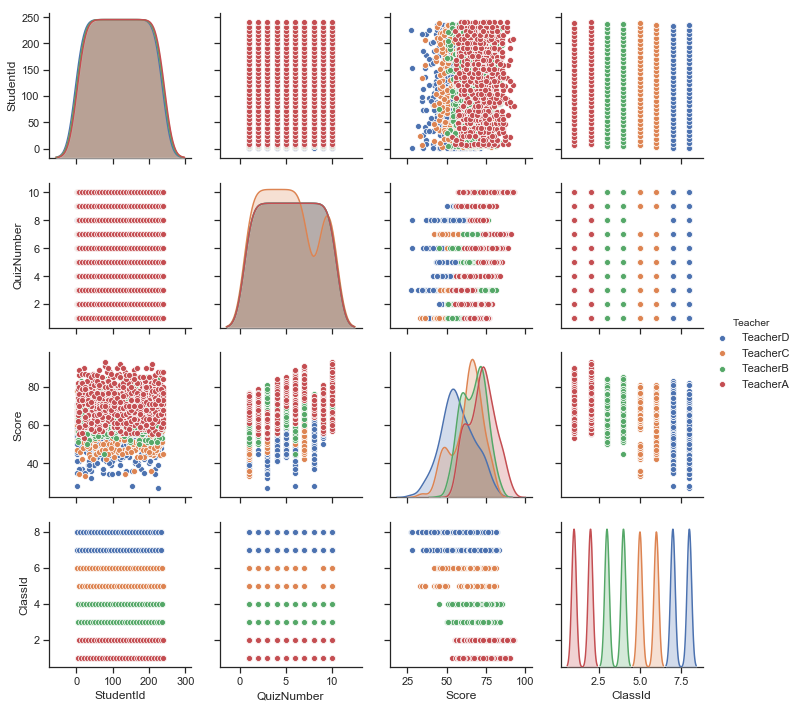

In [517]:
sns.pairplot(df2, hue="Teacher")

In [524]:
!pip3 install matplotlib

In [526]:
import matplotlib.pyplot as plt

      StudentId  QuizNumber  Score        Race Gender  ClassId   Teacher  \
0             1           1     45     Martian      M        7  TeacherD   
1             9           1     41   Atlantean      M        7  TeacherD   
2            17           1     37   Atlantean     NB        7  TeacherD   
3            25           1     35   Atlantean      F        7  TeacherD   
4            33           1     39    Venutian      F        7  TeacherD   
5            41           1     36   Atlantean     NB        7  TeacherD   
6            49           1     43   Atlantean      F        7  TeacherD   
7            57           1     49   Atlantean      F        7  TeacherD   
8            65           1     44   Atlantean      M        7  TeacherD   
9            73           1     44   Atlantean      M        7  TeacherD   
10           81           1     49    Venutian      F        7  TeacherD   
11           89           1     43     Martian      M        7  TeacherD   
12          

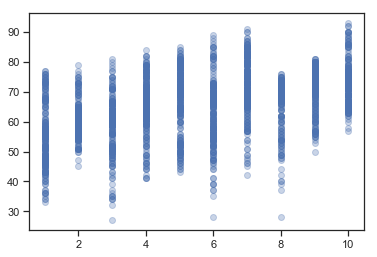

In [663]:

df2['TeacherCoded'] = df2['Teacher'].apply(lambda x: 1 if x == 'TeacherA' else 0)
plt.scatter(df2['QuizNumber'], df2['Score'], alpha = 0.3)
print(df2.head(2300))

['#edd1cb', '#e1b1b4', '#cf91a3', '#b77495', '#9a5b88', '#774576', '#52315f', '#2d1e3e']


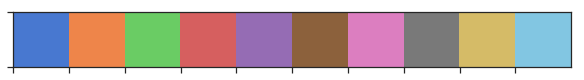

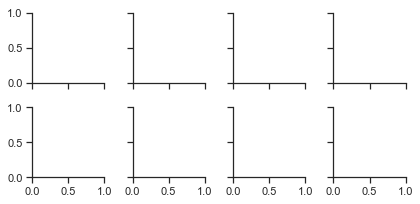

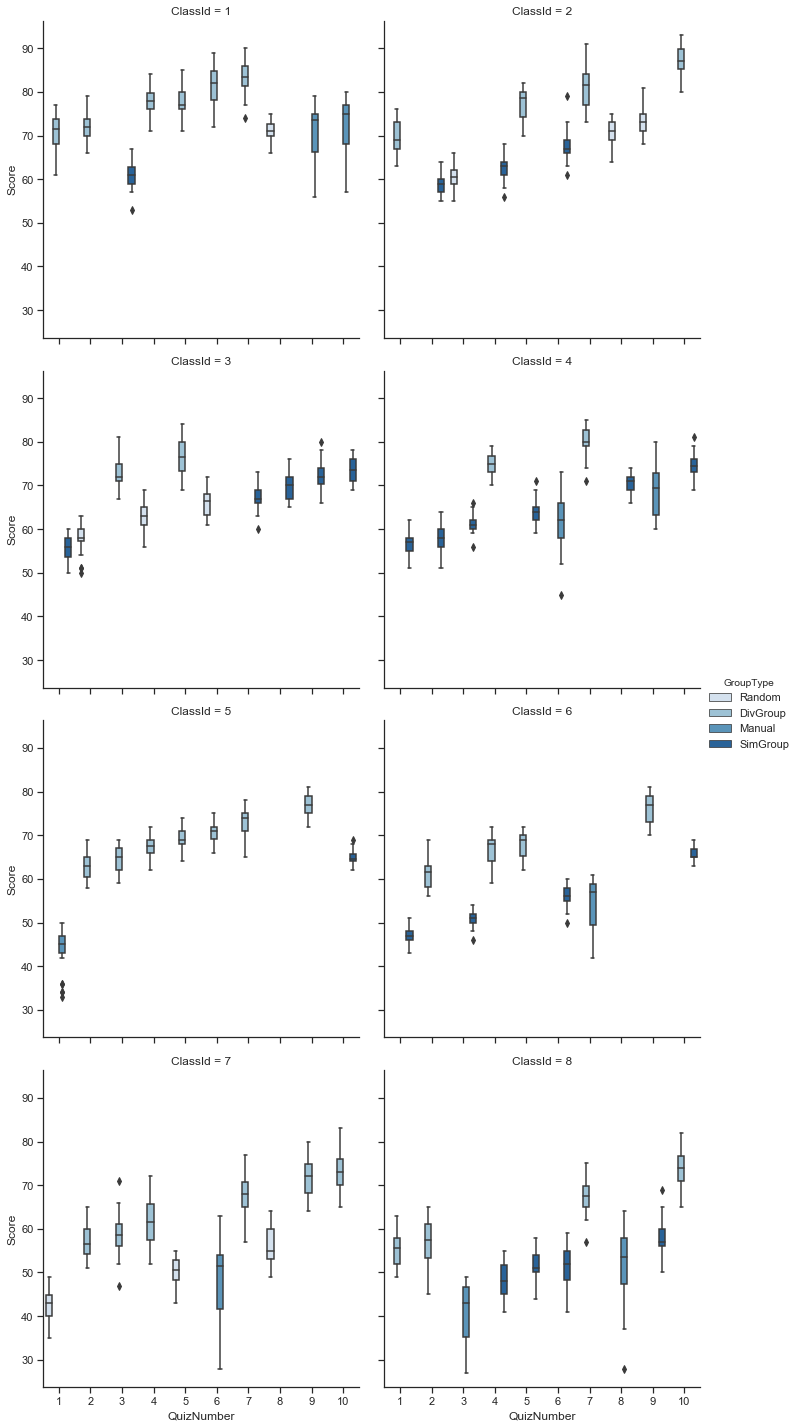

In [669]:
#fig, axs = plt.subplots(1, 3, figsize=(9, 3))
#axs[0].bar(df2['QuizNumber'], df2['Score'])
#plt.scatter(df2['Teacher'], df2['Score'])

#plt.scatter(df2['QuizNumber'], df2['Score'], c=df2['Teacher'].apply(lambda x: colors[x]), alpha = 0.3)
#sns.boxplot(x=df2['QuizNumber'], y=df2['Score'], ax=0)
#sns.boxplot(x=df2['Teacher'], y=df2['Score'], ax=1)

palette = sns.palplot(sns.color_palette("muted"))
color_list = sns.cubehelix_palette(8).as_hex()
print(color_list)
color_key = {"TeacherA":"g", "TeacherB":"b", "TeacherC":"r", "TeacherD":"m"}

#g = sns.catplot(x="QuizNumber", y="Score", hue="Race", col="Teacher", data=df2, kind="box", height=4, aspect=.7)
g = sns.FacetGrid(df2, col="ClassId", col_wrap=4, height=1.5)
g = sns.catplot(x="QuizNumber", y="Score", col="ClassId", hue="GroupType", palette="Blues", data=df2, col_wrap=2, kind="box", height=5, aspect=1)

r
<class 'str'>
r


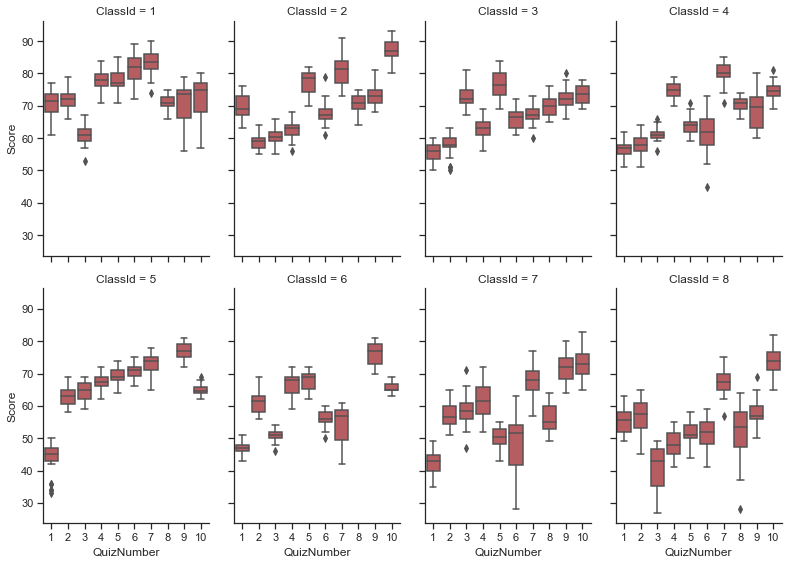

In [715]:
palette = {'Random': 'r', 'DivGroup': 'b', 'Manual':'m', 'SimGroup':'y'}
print(palette.get('Random'))
print(type(df2['GroupType'][0]))
print(palette.get(df2['GroupType'][0]))

g = sns.catplot(x="QuizNumber", y="Score", col="ClassId", 
                data=df2, 
                color=palette[df2["GroupType"][1]], 
                col_wrap = 4, kind="box", height=4, aspect=.7)







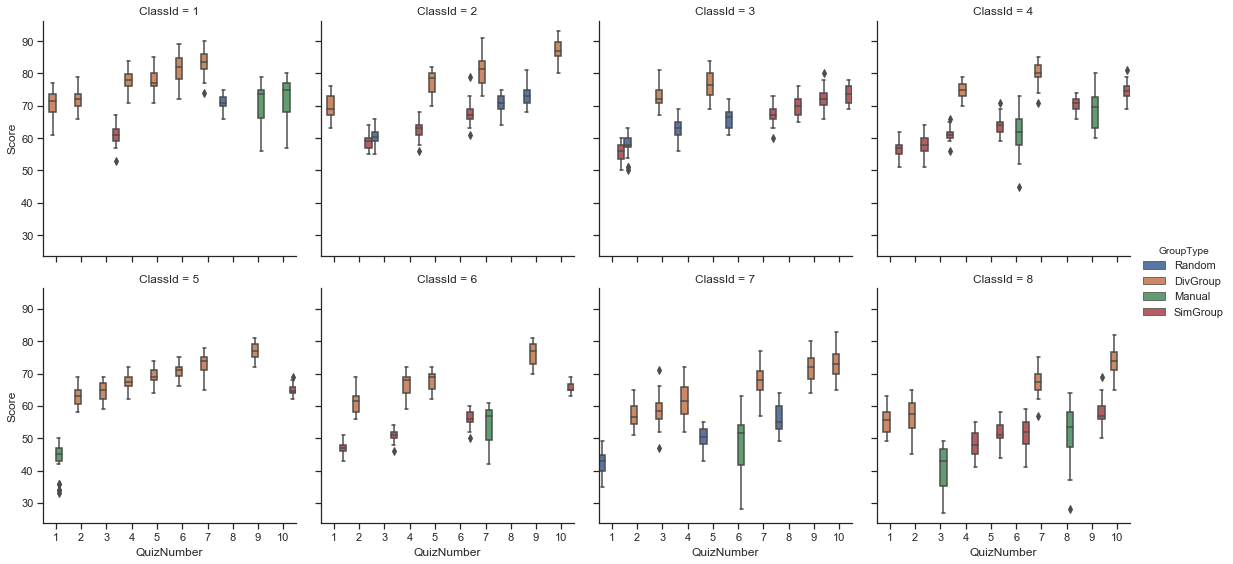

In [721]:
g = sns.catplot(width = 1, x="QuizNumber", y="Score", col="ClassId", hue="GroupType", col_wrap=4, data=df2, kind="box", height=4, aspect=1)

StudentId  QuizNumber  Score       Race Gender  ClassId   Teacher  \
0          1           1     45    Martian      M        7  TeacherD   
1          9           1     41  Atlantean      M        7  TeacherD   
2         17           1     37  Atlantean     NB        7  TeacherD   
3         25           1     35  Atlantean      F        7  TeacherD   
4         33           1     39   Venutian      F        7  TeacherD   

  GroupType  TeacherCoded  
0    Random             0  
1    Random             0  
2    Random             0  
3    Random             0  
4    Random             0

In [1703]:
# order of steps
    # 1. install and import necessary python packages
    # 2. define helper functions (data cleaning, visualizations, etc.)
    # 3. read in files and check contents
    # 4. confirm datatypes of each column
    # 5. check for null values and fill where necessary
    # 6. fill NAs for missing quizzes
    # 7. join dataframes together and sort / reindex
    # 8. create additional fields for analysis (ex. diff in scores)
    # 9. use helper functions to analyze

In [662]:
# install / import required packages

!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns

In [1125]:
# DATA EXPLORATION / ANALYSIS] define helper function to create flexible ridge chart

def ridge_plot_by_category(df, x, y, split=False, split_val=False):

    df_temp = df
    
    if split and split_val:
        df_temp = df[df[split] == split_val]
        
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(df_temp, row=y, hue=y, aspect=12, height=1, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, x, clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot, x, clip_on=False, color="w", lw=2, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, x)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.15)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

In [1126]:
# [DATA EXPLORATION / ANALYSIS] define helper function to create flexible stacked bar chart

def stacked_bar_chart_by_category(df, x, y, pcnt_of_total=False):
    
    df = df.groupby([x,y]).size().unstack()
   
    if pcnt_of_total == True: 
        df = df.divide(df.sum(axis=1),axis=0)
    
    fig, ax = plt.subplots()
    rows = df.index.values
    bars = {}
    label_values = []
    label_names = []
    
    for i in range(len(df.columns.values)):
        bar_bottom = sum(bars.values())
        bars[df.columns.values[i]] = df.iloc[:,i].fillna(0)
        grouptype_i = plt.bar(rows.astype(str), bars[df.columns.values[i]], bottom=bar_bottom)
        label_values.append(grouptype_i[0])
        label_names.append(df.iloc[:,i].fillna(0).name)
        if len(label_values) < 20:
            plt.legend(label_values, label_names, loc=(1.04,0))
            
    plt.xlabel(x)
    #ax.set_xticks(ax.get_xticks()[::2])
    plt.xticks(rotation=60)
    plt.ylabel('Distribution of ' + y)
    plt.title('Distribution of ' + y + ' by ' + x)
    plt.show()
    plt.clf()

In [1127]:
# [DATA EXPLORATION / ANALYSIS] define helper function to create flexible histogram

def histogram_by_category_with_filter(df, filter_var, filter_value, split_var, hist_var, split_value=None,
                                     min=-40, max=40, splits=41, separate_plots=False):

    plt.subplots(1)
    bins = np.linspace(min, max, num=splits) ## 80/5 = 16+1 = 17
    df_filter = df[df[filter_var] == filter_value]
    split_values = df[split_var].unique()
    if split_value:
        split_values = split_value

    for i in df[split_var].unique():
        df_temp = df_filter[df_filter[split_var] == i][hist_var]
        plt.hist(df_temp, bins, alpha=0.40, label=str(i), density=True, rwidth = 10, edgecolor="black")
        plt.legend(loc=(1.04,0))
        if separate_plots == True:
            plt.xlabel(hist_var)
            plt.xticks(rotation=60)
            plt.ylabel('Frequency / Density')
            plt.title(hist_var + ' for ' + split_var + ' = ' + str(i) 
                      + ' (' + filter_var + '=' + str(filter_value) + ')')
            plt.subplots()
            plt.clf()

    if separate_plots == False:
        plt.xlabel(hist_var)
        #ax.set_xticks(ax.get_xticks()[::2])
        plt.xticks(rotation=60)
        plt.ylabel('Frequency / Density')
        plt.title(hist_var + ' for ' + split_var + ' = ' + str(i) 
                      + ' (' + filter_var + '=' + str(filter_value) + ')')
        plt.subplots()
        plt.clf()

In [1128]:
# [DATA LOADING / CLEANING] define helper function to check contents of new dataframes

def check_and_explore(df):
    
    print('\n\n' + df.name + ': First 5 Rows')
    print(df.head())
    
    print('\n' + df.name + ': Dataframe Info (Entries, Nulls, Data Types)')
    print(df.info())
    
    print('\n' + df.name + ': Dataframe Description By Column')
    print(df.describe(include='all'))
    
    for i in range(len(df.columns)): 
        print('\n' + df.name + ': Value Counts For', df.columns[i], "Column")
        print(df.groupby(df.columns[i]).size())
        
    for col1 in df.columns:
        for col2 in df.columns:
            if all([col1 != col2, df[col1].nunique() < 15, df[col2].nunique() < 15]): 
                stacked_bar_chart_by_category(df, col1, col2)

In [1129]:
# [DATA LOADING / CLEANING] define helper function to check for null values via assert statements

def find_null_values(df): 
    
    try:
        assert df.isnull().values.sum() == 0
    except AssertionError:
        print('\nDataframe: ' + df.name)
        print(df[df.isnull().any(axis=1)])

In [1130]:
# [DATA LOADING / CLEANING] define helper function #5 - fill in missing rows for students / dates

def fill_missing_dates(df, entity_field, date_field, fill_field, fill_value):
    
    new_rows = []
    
    for i in range(1, df[entity_field].nunique()+1): 
        for j in range(1, df[date_field].nunique()+1): 
            if len(scores_raw[(df[entity_field] == i) & (df[date_field] == j)]) == 0:
                new_row = {entity_field: [i], 
                           date_field: [j],
                           fill_field: [fill_value]}
                new_row_df = pd.DataFrame(data=new_row)
                new_rows.append(new_row_df)
    
    if len(new_rows) > 0: 
        str = df.name
        df = df.append(pd.concat(new_rows), ignore_index=False, sort=True)
        df.sort_values([entity_field, date_field], inplace=True)
        df.reset_index(drop=True)
        df.name = str
        return df
    
    else:
        print('No values to add!')
        return df

In [1131]:
# [DATA LOADING / CLEANING] define helper function to type cols (numeric and categorical / string values)

def type_fields(df, unique_value_cutoff=15, range_cutoff=40):
    
    for col in df.columns:

        unique_values = df[col].nunique()

        try: 
            df[col] = df[col].astype('int16')
            print('Successfully cast column ' + col + ' as int16!')
            value_range = max(df[col].values)-min(df[col].values)
            sequential_values_yn = pd.Series(df[col].unique()).sort_values().diff().dropna().eq(1).all()
            if value_range > range_cutoff and unique_values > unique_value_cutoff and sequential_values_yn == False:
                print('-> Consider creating bucketed version of ' + col +
                      ' - many unique / non-sequential vals and large range!')     

        except ValueError:
            try: 
                df[col] = df[col].astype('float16')
                value_range = max(df[col].values)-min(df[col].values)
                sequential_values_yn = pd.Series(df[col].unique()).sort_values().diff().dropna().eq(1).all()
                print('Successfully cast column ' + col + ' as float16!')
                if max(df[col].values)-min(df[col].values) > range_cutoff and df[col].nunique() > unique_value_cutoff and pd.Series(df[col].unique()).diff().dropna().eq(1).all() == False:
                    print('-> Consider creating bucketed version of ' + col + ' - many unique / non-sequential values and large range!')     

            except ValueError:
                try:
                    if unique_values <= 15:
                        df[col] = df[col].astype('category')
                        print('Successfully cast column ' + col + ' as category!')

                    else:
                        df[col] = df[col].astype('string')
                        print('Successfully cast column ' + col + ' as string!')

                except ValueError:
                    'Not able to successfully type col ' + col + ' - should take closer look!'
    
    return df

In [1132]:
# read in raw data files as dataframes

groups_raw = pd.read_csv('groups.csv')
groups_raw.name = 'groups_raw'

students_raw = pd.read_csv('students.csv')
students_raw.name = 'students_raw'

scores_raw = pd.read_csv('scores.csv')
scores_raw.name = 'scores_raw'



groups_raw: First 5 Rows
  GroupType  QuizNumber  ClassId
0  DivGroup           1        1
1  DivGroup           2        1
2  SimGroup           3        1
3  DivGroup           4        1
4  DivGroup           5        1

groups_raw: Dataframe Info (Entries, Nulls, Data Types)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
GroupType     80 non-null object
QuizNumber    80 non-null int64
ClassId       80 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.0+ KB
None

groups_raw: Dataframe Description By Column
       GroupType  QuizNumber    ClassId
count         80   80.000000  80.000000
unique         4         NaN        NaN
top     DivGroup         NaN        NaN
freq          36         NaN        NaN
mean         NaN    5.500000   4.500000
std          NaN    2.890403   2.305744
min          NaN    1.000000   1.000000
25%          NaN    3.000000   2.750000
50%          NaN    5.500000   4.500000
75%          NaN   

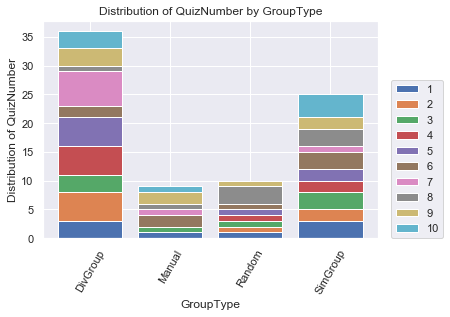

<Figure size 432x288 with 0 Axes>

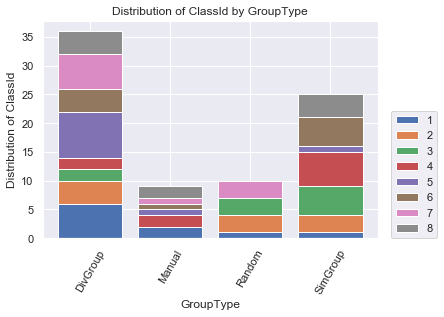

<Figure size 432x288 with 0 Axes>

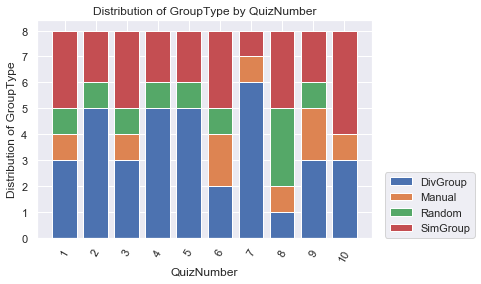

<Figure size 432x288 with 0 Axes>

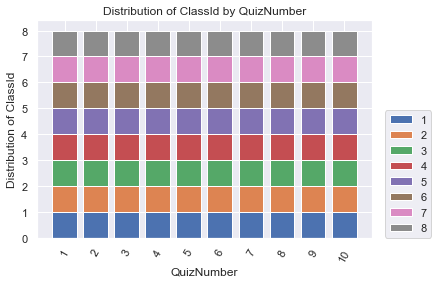

<Figure size 432x288 with 0 Axes>

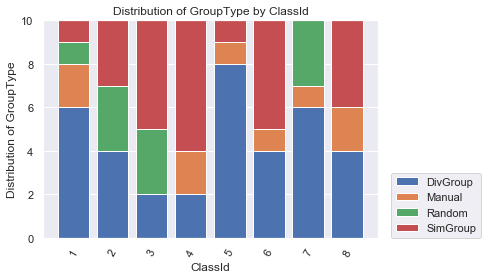

<Figure size 432x288 with 0 Axes>

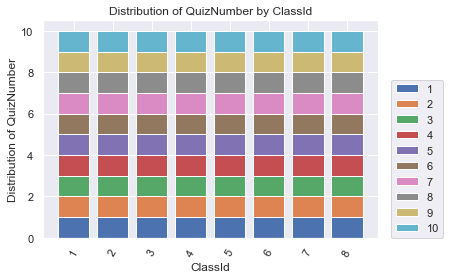



students_raw: First 5 Rows
   StudentId        Race Gender  ClassId   Teacher
0          6     Martian      M        1  TeacherA
1         14    Venutian      F        1  TeacherA
2         22   Atlantean     NB        1  TeacherA
3         30   Atlantean      F        1  TeacherA
4         38  Liliputian      M        1  TeacherA

students_raw: Dataframe Info (Entries, Nulls, Data Types)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
StudentId    240 non-null int64
Race         240 non-null object
Gender       239 non-null object
ClassId      240 non-null int64
Teacher      240 non-null object
dtypes: int64(2), object(3)
memory usage: 9.5+ KB
None

students_raw: Dataframe Description By Column
        StudentId       Race Gender     ClassId   Teacher
count   240.00000        240    239  240.000000       240
unique        NaN          4      4         NaN         4
top           NaN  Atlantean      M         NaN  TeacherB
freq 

<Figure size 432x288 with 0 Axes>

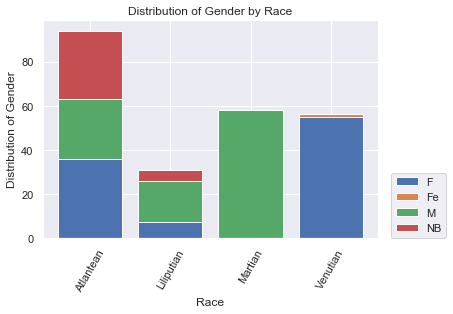

<Figure size 432x288 with 0 Axes>

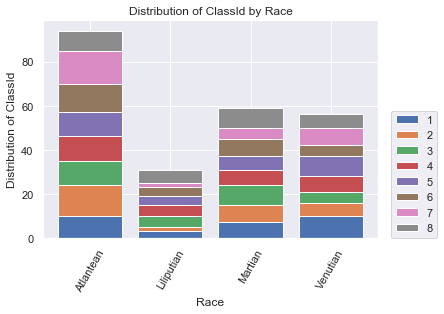

<Figure size 432x288 with 0 Axes>

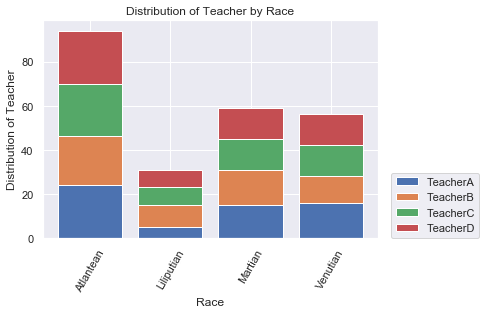

<Figure size 432x288 with 0 Axes>

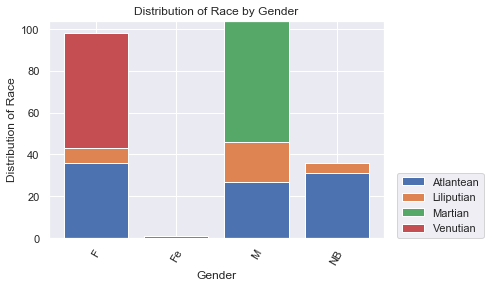

<Figure size 432x288 with 0 Axes>

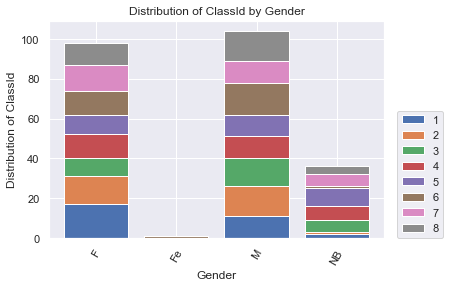

<Figure size 432x288 with 0 Axes>

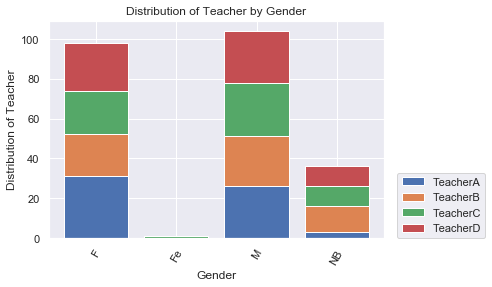

<Figure size 432x288 with 0 Axes>

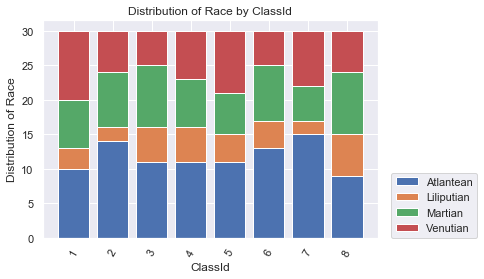

<Figure size 432x288 with 0 Axes>

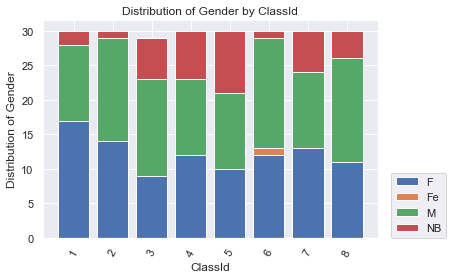

<Figure size 432x288 with 0 Axes>

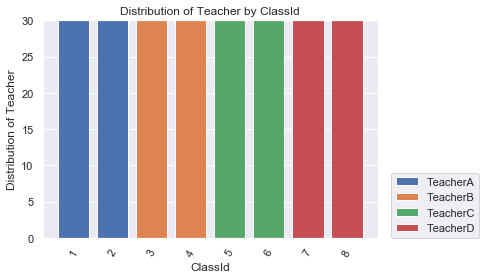

<Figure size 432x288 with 0 Axes>

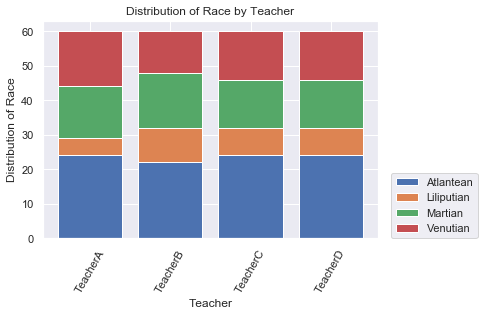

<Figure size 432x288 with 0 Axes>

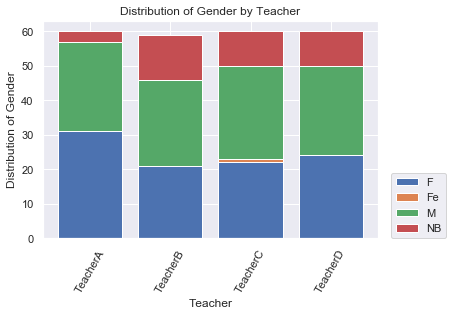

<Figure size 432x288 with 0 Axes>

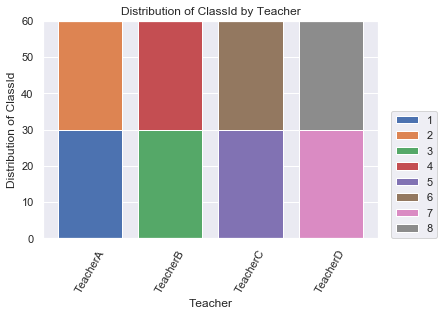



scores_raw: First 5 Rows
   StudentId  QuizNumber  Score
0          1           1     45
1          2           1     54
2          3           1     47
3          4           1     55
4          5           1     52

scores_raw: Dataframe Info (Entries, Nulls, Data Types)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
StudentId     2340 non-null int64
QuizNumber    2340 non-null int64
Score         2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB
None

scores_raw: Dataframe Description By Column
         StudentId   QuizNumber        Score
count  2340.000000  2340.000000  2340.000000
mean    120.487179     5.435897    65.038034
std      69.296423     2.881097    10.761824
min       1.000000     1.000000    27.000000
25%      60.750000     3.000000    58.000000
50%     120.500000     5.000000    66.000000
75%     180.250000     8.000000    73.000000
max     240.000000    10.000000    93.000000

scores_raw: Value Cou

<Figure size 432x288 with 0 Axes>

In [1133]:
# explore new dataframes (cols, size, type, relationships)

check_and_explore(groups_raw)
check_and_explore(students_raw)
check_and_explore(scores_raw)

In [1134]:
# find and address null values where necessary

find_null_values(groups_raw)
find_null_values(students_raw)
find_null_values(scores_raw)


Dataframe: students_raw
    StudentId     Race Gender  ClassId   Teacher
81        173  Martian    NaN        3  TeacherB


In [1135]:
# fix unexpected nulls / potentially erroneous values 

students_raw.loc[students_raw['Gender'].isnull(), 'Gender'] = 'M' # all other Martians are M
students_raw.loc[students_raw['Gender'] == 'Fe', 'Gender'] = 'F' # all other Venutians are F, likely typo / miscoded

In [1136]:
# fill missing dates for included students (test 8 for one teacher / two classrooms of students)

scores_raw = fill_missing_dates(scores_raw, 'StudentId', 'QuizNumber', 'Score', np.nan)

In [1137]:
# make sure all fields can be successfully typed

groups_typed = type_fields(groups_raw)
groups_typed.name = 'groups_typed'

students_typed = type_fields(students_raw)
students_typed.name = 'students_typed'

scores_typed = type_fields(scores_raw)
scores_typed.name = 'scores_typed'

Successfully cast column GroupType as category!
Successfully cast column QuizNumber as int16!
Successfully cast column ClassId as int16!
Successfully cast column StudentId as int16!
Successfully cast column Race as category!
Successfully cast column Gender as category!
Successfully cast column ClassId as int16!
Successfully cast column Teacher as category!
Successfully cast column QuizNumber as int16!
Successfully cast column Score as float16!
-> Consider creating bucketed version of Score - many unique / non-sequential values and large range!
Successfully cast column StudentId as int16!


In [1138]:
# create bucketed category version of Score field

bins = np.linspace(20, 100, num=9)
scores_typed['ScoreBucket'] = pd.cut(scores_raw["Score"], bins)
scores_typed['ScoreBucket'] = scores_typed['ScoreBucket'].astype('category')

In [1139]:
# create score diff columns derived from Score field

scores_typed.sort_values(['StudentId', 'QuizNumber'], inplace=True)

for i in range(1, max(scores_typed['QuizNumber'])):
    field_name = 'ScoreDiff_' + str(i)
    scores_typed[field_name] = scores_typed['Score'].diff(i)
    for j in range(i+1):
        scores_typed.loc[scores_typed['QuizNumber'] == j, field_name] = np.nan
        scores_typed[field_name].astype('float16')



groups_typed: First 5 Rows
  GroupType  QuizNumber  ClassId
0  DivGroup           1        1
1  DivGroup           2        1
2  SimGroup           3        1
3  DivGroup           4        1
4  DivGroup           5        1

groups_typed: Dataframe Info (Entries, Nulls, Data Types)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
GroupType     80 non-null category
QuizNumber    80 non-null int16
ClassId       80 non-null int16
dtypes: category(1), int16(2)
memory usage: 672.0 bytes
None

groups_typed: Dataframe Description By Column
       GroupType  QuizNumber    ClassId
count         80   80.000000  80.000000
unique         4         NaN        NaN
top     DivGroup         NaN        NaN
freq          36         NaN        NaN
mean         NaN    5.500000   4.500000
std          NaN    2.890403   2.305744
min          NaN    1.000000   1.000000
25%          NaN    3.000000   2.750000
50%          NaN    5.500000   4.500000
75%  

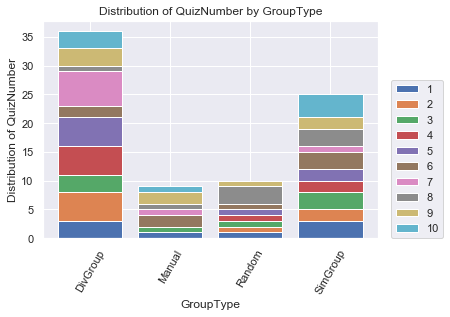

<Figure size 432x288 with 0 Axes>

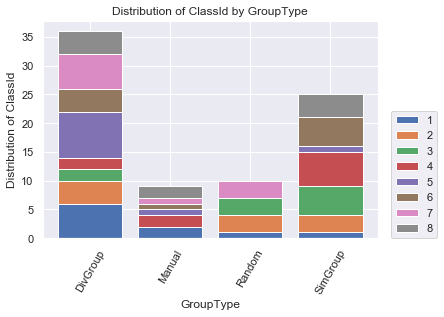

<Figure size 432x288 with 0 Axes>

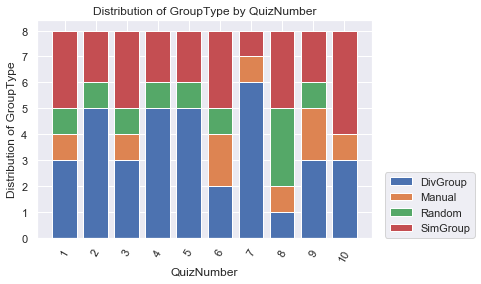

<Figure size 432x288 with 0 Axes>

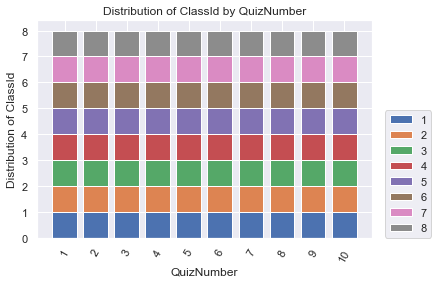

<Figure size 432x288 with 0 Axes>

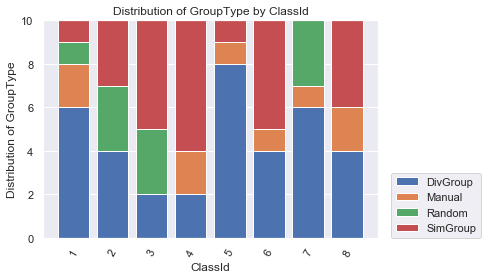

<Figure size 432x288 with 0 Axes>

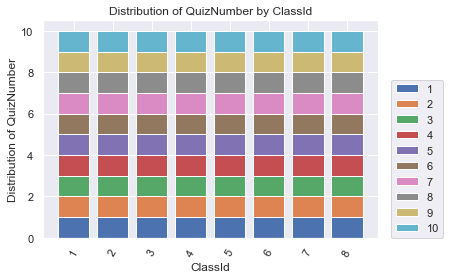



students_typed: First 5 Rows
   StudentId        Race Gender  ClassId   Teacher
0          6     Martian      M        1  TeacherA
1         14    Venutian      F        1  TeacherA
2         22   Atlantean     NB        1  TeacherA
3         30   Atlantean      F        1  TeacherA
4         38  Liliputian      M        1  TeacherA

students_typed: Dataframe Info (Entries, Nulls, Data Types)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
StudentId    240 non-null int16
Race         240 non-null category
Gender       240 non-null category
ClassId      240 non-null int16
Teacher      240 non-null category
dtypes: category(3), int16(2)
memory usage: 2.2 KB
None

students_typed: Dataframe Description By Column
        StudentId       Race Gender     ClassId   Teacher
count   240.00000        240    240  240.000000       240
unique        NaN          4      3         NaN         4
top           NaN  Atlantean      M         NaN  T

<Figure size 432x288 with 0 Axes>

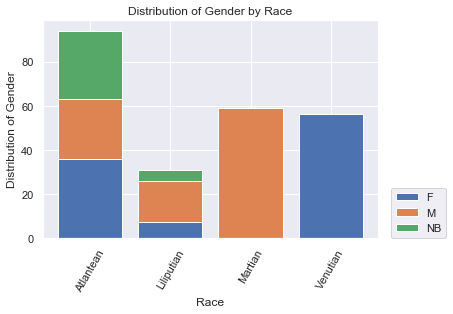

<Figure size 432x288 with 0 Axes>

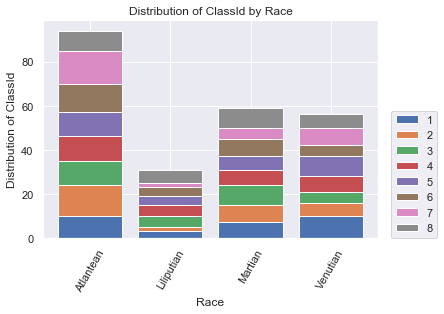

<Figure size 432x288 with 0 Axes>

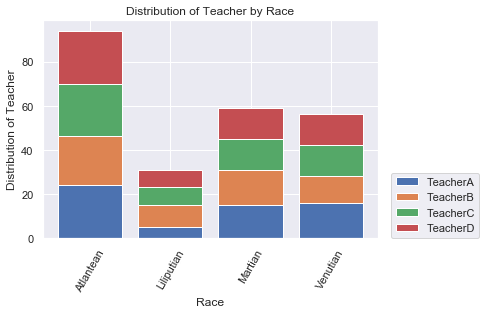

<Figure size 432x288 with 0 Axes>

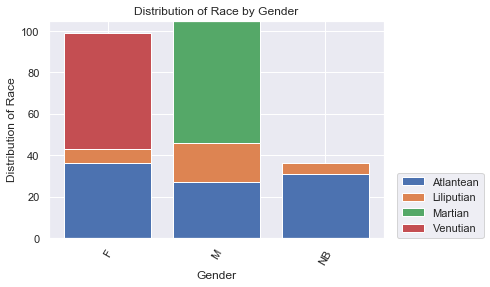

<Figure size 432x288 with 0 Axes>

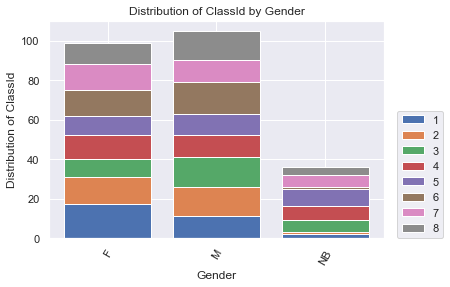

<Figure size 432x288 with 0 Axes>

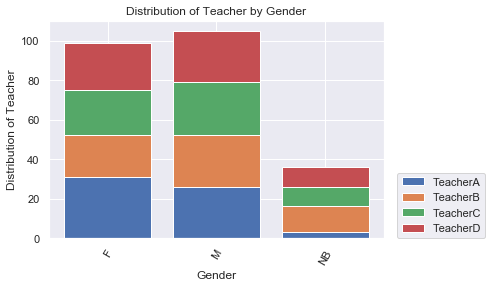

<Figure size 432x288 with 0 Axes>

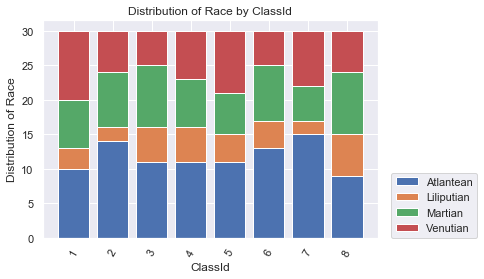

<Figure size 432x288 with 0 Axes>

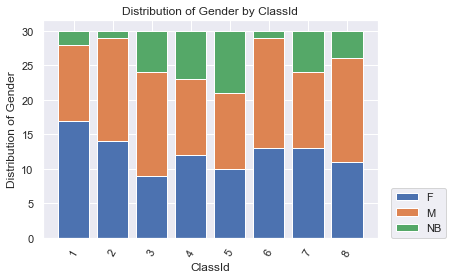

<Figure size 432x288 with 0 Axes>

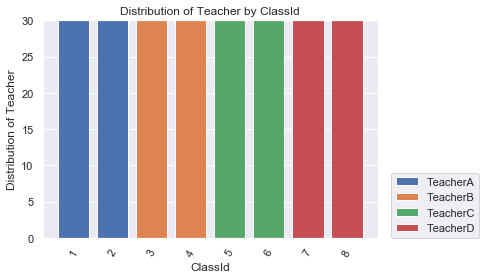

<Figure size 432x288 with 0 Axes>

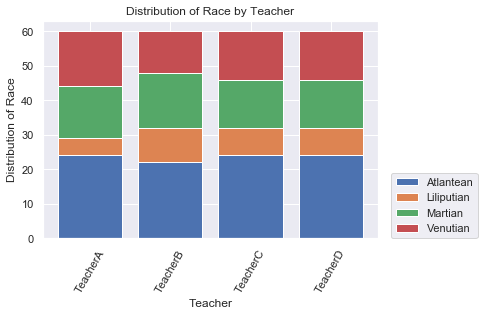

<Figure size 432x288 with 0 Axes>

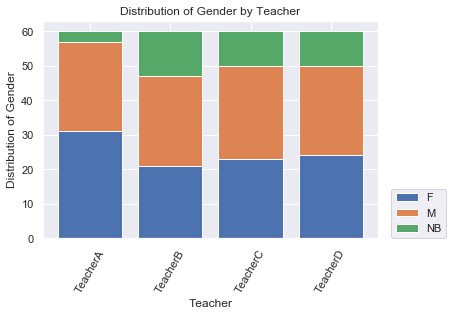

<Figure size 432x288 with 0 Axes>

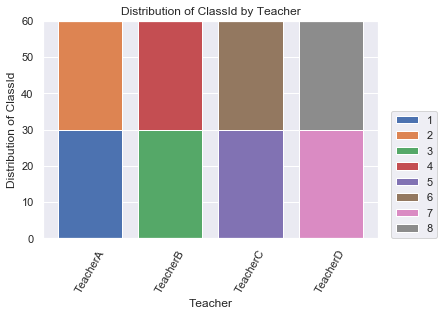



scores_typed: First 5 Rows
     QuizNumber  Score  StudentId   ScoreBucket  ScoreDiff_1  ScoreDiff_2  \
0             1   45.0          1  (40.0, 50.0]          NaN          NaN   
240           2   58.0          1  (50.0, 60.0]         13.0          NaN   
480           3   53.0          1  (50.0, 60.0]         -5.0          8.0   
720           4   55.0          1  (50.0, 60.0]          2.0         -3.0   
960           5   53.0          1  (50.0, 60.0]         -2.0          0.0   

     ScoreDiff_3  ScoreDiff_4  ScoreDiff_5  ScoreDiff_6  ScoreDiff_7  \
0            NaN          NaN          NaN          NaN          NaN   
240          NaN          NaN          NaN          NaN          NaN   
480          NaN          NaN          NaN          NaN          NaN   
720         10.0          NaN          NaN          NaN          NaN   
960         -5.0          8.0          NaN          NaN          NaN   

     ScoreDiff_8  ScoreDiff_9  
0            NaN          NaN  
240        

<Figure size 432x288 with 0 Axes>

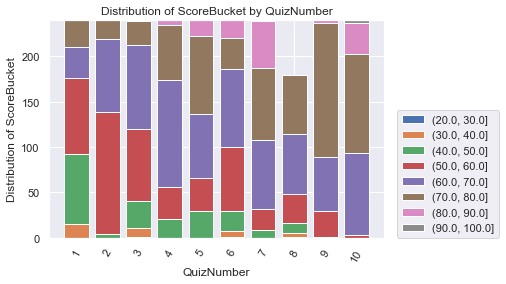

<Figure size 432x288 with 0 Axes>

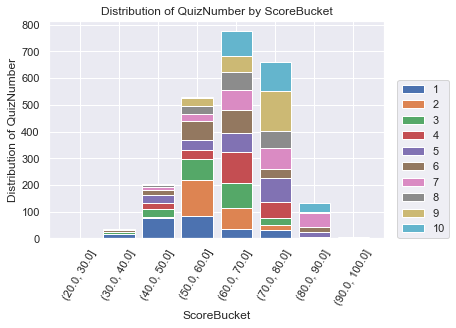

<Figure size 432x288 with 0 Axes>

In [1140]:
# before joining, rerun script to explore typed dataframes

check_and_explore(groups_raw)
check_and_explore(students_raw)
check_and_explore(scores_raw)

In [1141]:
# join tables together - first join scores to students on student id and then join to groups on quiz and class

df1 = pd.merge(left=scores_typed, right=students_typed, left_on='StudentId', right_on='StudentId')
combined_view = pd.merge(left=df1, right=groups_typed, left_on=['ClassId', 'QuizNumber'], right_on=['ClassId','QuizNumber'])
combined_view.name = 'combined_view'
combined_view.sort_values(['StudentId', 'QuizNumber'], inplace=True)
combined_view.reset_index(drop=True)


QuizNumber  Score  StudentId   ScoreBucket  ScoreDiff_1  ScoreDiff_2  \
0              1   45.0          1  (40.0, 50.0]          NaN          NaN   
1              2   58.0          1  (50.0, 60.0]         13.0          NaN   
2              3   53.0          1  (50.0, 60.0]         -5.0          8.0   
3              4   55.0          1  (50.0, 60.0]          2.0         -3.0   
4              5   53.0          1  (50.0, 60.0]         -2.0          0.0   
5              6   28.0          1  (20.0, 30.0]        -25.0        -27.0   
6              7   59.0          1  (50.0, 60.0]         31.0          6.0   
7              8   62.0          1  (60.0, 70.0]          3.0         34.0   
8              9   68.0          1  (60.0, 70.0]          6.0          9.0   
9             10   67.0          1  (60.0, 70.0]         -1.0          5.0   
10             1   54.0          2  (50.0, 60.0]          NaN          NaN   
11             2   54.0          2  (50.0, 60.0]          0.0          NaN   
12             3   35.0          2  (30.0, 40.0]        -19.0        -19.0   
13             4   46.0          2  (40.0, 50.0]         11.0         -8.0   
14             5   52.0          2  (50.0, 60.0]          6.0         17.0   
15             6   41.0          2  (40.0, 50.0]        -11.0         -5.0   
16             7   65.0          2  (60.0, 70.0]         24.0         13.0   
17             8   50.0          2  (40.0, 50.0]        -15.0          9.0   
18             9   60.0          2  (50.0, 60.0]         10.0         -5.0   
19            10   71.0          2  (70.0, 80.0]         11.0         21.0   
20             1   47.0          3  (40.0, 50.0]          NaN          NaN   
21             2   63.0          3  (60.0, 70.0]         16.0          NaN   
22             3   52.0          3  (50.0, 60.0]        -11.0          5.0   
23             4   68.0          3  (60.0, 70.0]         16.0          5.0   
24             5   70.0          3  (60.0, 70.0]          2.0         18.0   
25             6   57.0          3  (50.0, 60.0]        -13.0        -11.0   
26             7   60.0          3  (50.0, 60.0]          3.0        -10.0   
27             8    NaN          3           NaN          NaN          NaN   
28             9   78.0          3  (70.0, 80.0]          NaN         18.0   
29            10   65.0          3  (60.0, 70.0]        -13.0          NaN   
...          ...    ...        ...           ...          ...          ...   
2370           1   68.0        238  (60.0, 70.0]          NaN          NaN   
2371           2   76.0        238  (70.0, 80.0]          8.0          NaN   
2372           3   64.0        238  (60.0, 70.0]        -12.0         -4.0   
2373           4   76.0        238  (70.0, 80.0]         12.0          0.0   
2374           5   76.0        238  (70.0, 80.0]          0.0         12.0   
2375           6   78.0        238  (70.0, 80.0]          2.0          2.0   
2376           7   79.0        238  (70.0, 80.0]          1.0          3.0   
2377           8   71.0        238  (70.0, 80.0]         -8.0         -7.0   
2378           9   66.0        238  (60.0, 70.0]         -5.0        -13.0   
2379          10   73.0        238  (70.0, 80.0]          7.0          2.0   
2380           1   45.0        239  (40.0, 50.0]          NaN          NaN   
2381           2   60.0        239  (50.0, 60.0]         15.0          NaN   
2382           3   61.0        239  (60.0, 70.0]          1.0         16.0   
2383           4   64.0        239  (60.0, 70.0]          3.0          4.0   
2384           5   69.0        239  (60.0, 70.0]          5.0          8.0   
2385           6   66.0        239  (60.0, 70.0]         -3.0          2.0   
2386           7   65.0        239  (60.0, 70.0]         -1.0         -4.0   
2387           8    NaN        239           NaN          NaN          NaN   
2388           9   72.0        239  (70.0, 80.0]          NaN          7.0   
2389          10   69.0     

In [1142]:
# create score rank from Score and Class field (top third = High, middle third = Mid, bottom third = Low)

combined_view['ScoreRank'] = combined_view.groupby(['QuizNumber','ClassId'])['Score'].rank(ascending=False)
combined_view['ScoreRank'] = combined_view['ScoreRank'].astype('float16')

bins = np.linspace(0, 30, num=4)
combined_view['ScoreRank_Bucket'] = pd.cut(combined_view['ScoreRank'], bins)
combined_view['ScoreRank_Bucket'] = combined_view['ScoreRank_Bucket'].astype('category')

combined_view.sort_values(['ClassId', 'QuizNumber', 'Score'], inplace=True)
print(combined_view[['ClassId', 'QuizNumber', 'Score','ScoreRank', 'ScoreRank_Bucket']])  

      ClassId  QuizNumber  Score  ScoreRank ScoreRank_Bucket
1517        1           1   61.0       30.0     (20.0, 30.0]
1500        1           1   65.0       28.5     (20.0, 30.0]
1508        1           1   65.0       28.5     (20.0, 30.0]
1524        1           1   66.0       27.0     (20.0, 30.0]
1515        1           1   67.0       25.0     (20.0, 30.0]
1522        1           1   67.0       25.0     (20.0, 30.0]
1527        1           1   67.0       25.0     (20.0, 30.0]
1506        1           1   68.0       21.0     (20.0, 30.0]
1509        1           1   68.0       21.0     (20.0, 30.0]
1513        1           1   68.0       21.0     (20.0, 30.0]
1519        1           1   68.0       21.0     (20.0, 30.0]
1529        1           1   68.0       21.0     (20.0, 30.0]
1505        1           1   70.0       17.5     (10.0, 20.0]
1518        1           1   70.0       17.5     (10.0, 20.0]
1503        1           1   71.0       16.0     (10.0, 20.0]
1501        1           



combined_view: First 5 Rows
      QuizNumber  Score  StudentId   ScoreBucket  ScoreDiff_1  ScoreDiff_2  \
1517           1   61.0        142  (60.0, 70.0]          NaN          NaN   
1500           1   65.0          6  (60.0, 70.0]          NaN          NaN   
1508           1   65.0         70  (60.0, 70.0]          NaN          NaN   
1524           1   66.0        198  (60.0, 70.0]          NaN          NaN   
1515           1   67.0        126  (60.0, 70.0]          NaN          NaN   

      ScoreDiff_3  ScoreDiff_4  ScoreDiff_5  ScoreDiff_6  ScoreDiff_7  \
1517          NaN          NaN          NaN          NaN          NaN   
1500          NaN          NaN          NaN          NaN          NaN   
1508          NaN          NaN          NaN          NaN          NaN   
1524          NaN          NaN          NaN          NaN          NaN   
1515          NaN          NaN          NaN          NaN          NaN   

      ScoreDiff_8  ScoreDiff_9       Race Gender  ClassId   Te

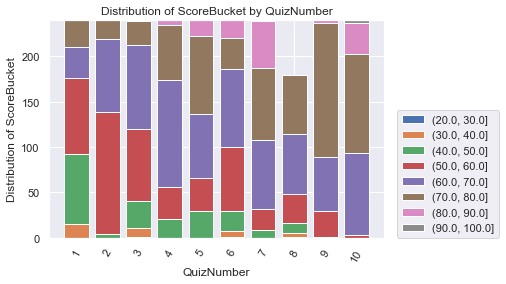

<Figure size 432x288 with 0 Axes>

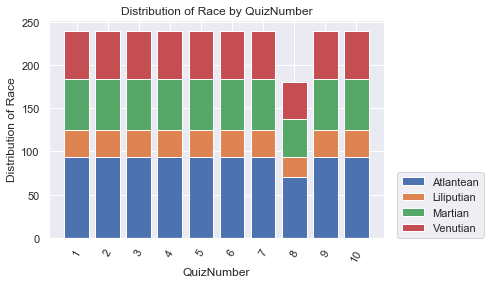

<Figure size 432x288 with 0 Axes>

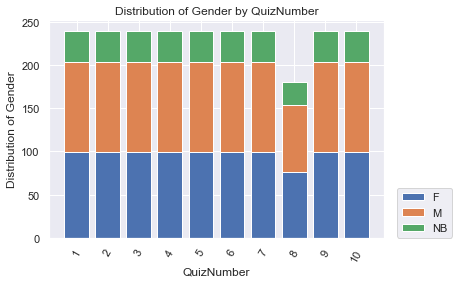

<Figure size 432x288 with 0 Axes>

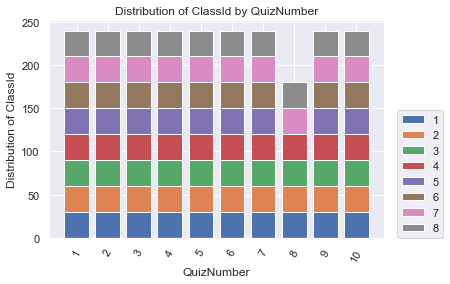

<Figure size 432x288 with 0 Axes>

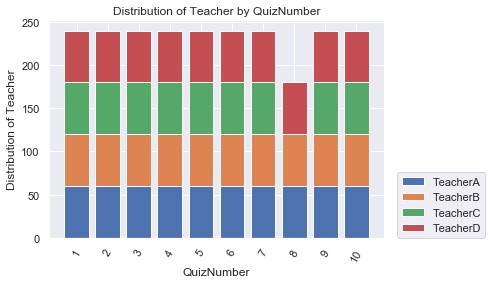

<Figure size 432x288 with 0 Axes>

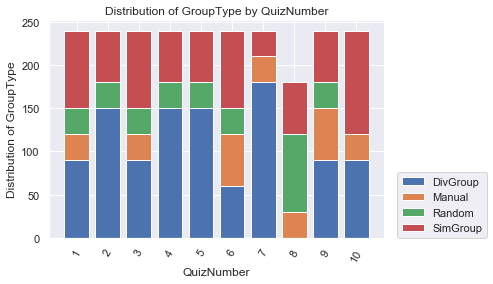

<Figure size 432x288 with 0 Axes>

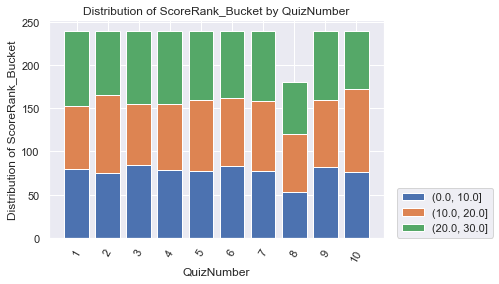

<Figure size 432x288 with 0 Axes>

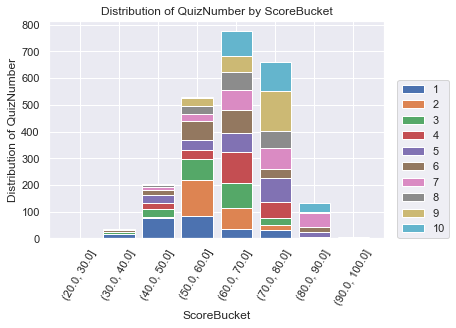

<Figure size 432x288 with 0 Axes>

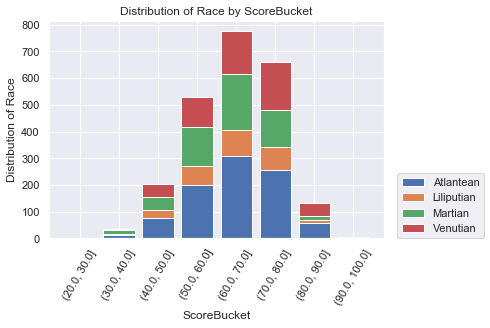

<Figure size 432x288 with 0 Axes>

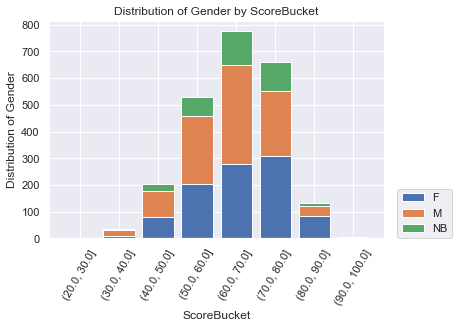

<Figure size 432x288 with 0 Axes>

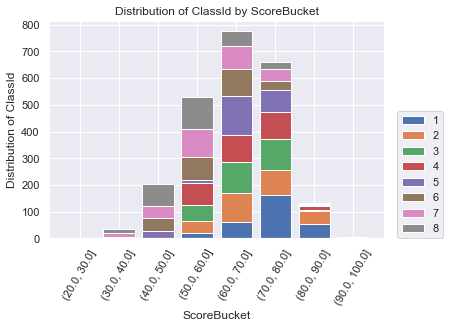

<Figure size 432x288 with 0 Axes>

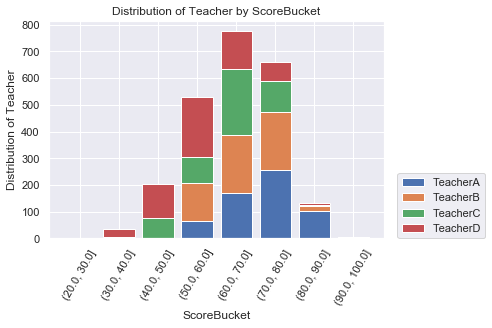

<Figure size 432x288 with 0 Axes>

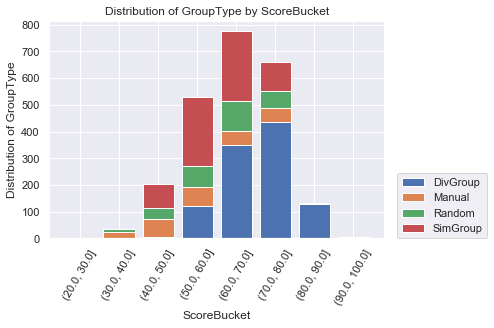

<Figure size 432x288 with 0 Axes>

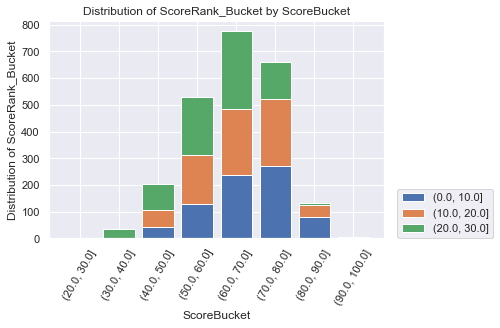

<Figure size 432x288 with 0 Axes>

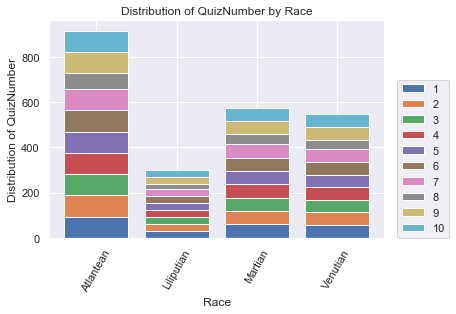

<Figure size 432x288 with 0 Axes>

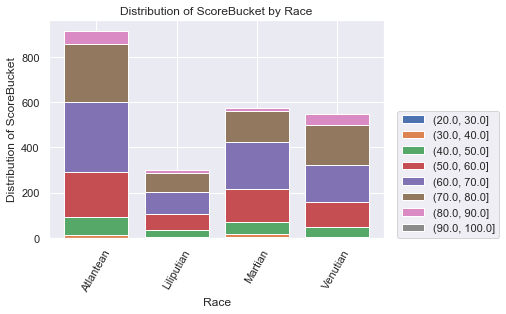

<Figure size 432x288 with 0 Axes>

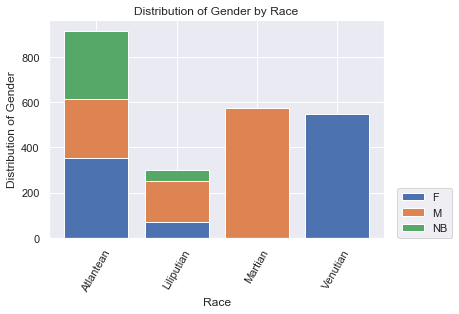

<Figure size 432x288 with 0 Axes>

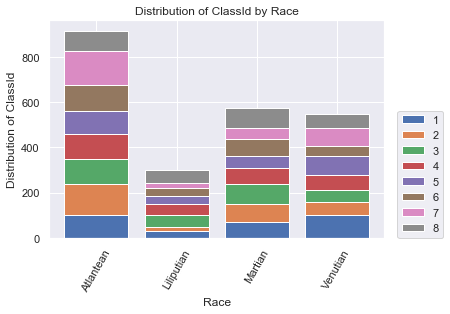

<Figure size 432x288 with 0 Axes>

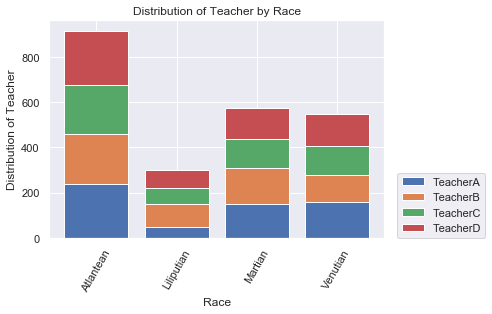

<Figure size 432x288 with 0 Axes>

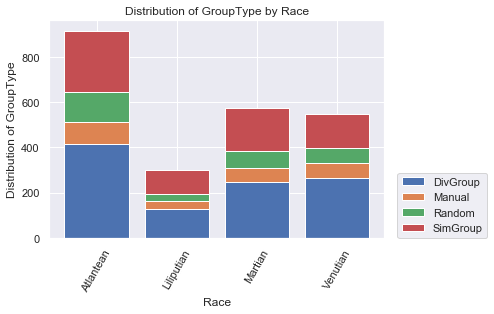

<Figure size 432x288 with 0 Axes>

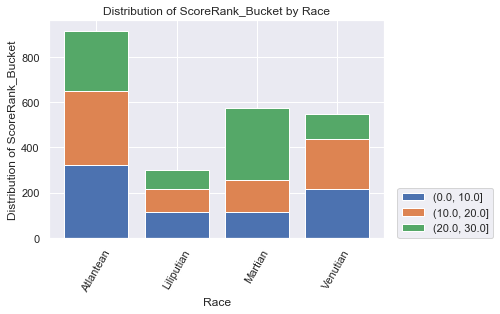

<Figure size 432x288 with 0 Axes>

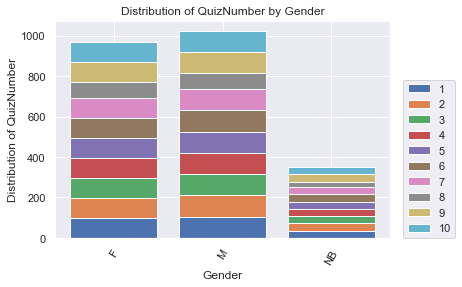

<Figure size 432x288 with 0 Axes>

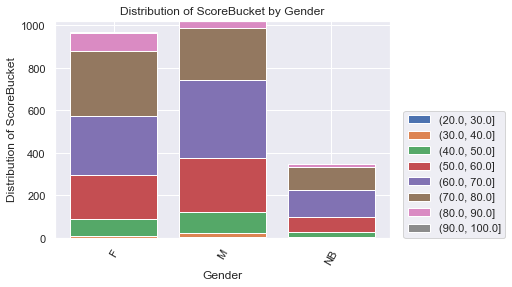

<Figure size 432x288 with 0 Axes>

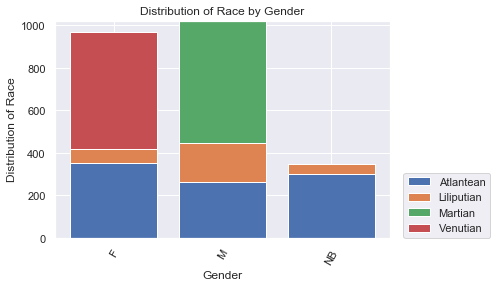

<Figure size 432x288 with 0 Axes>

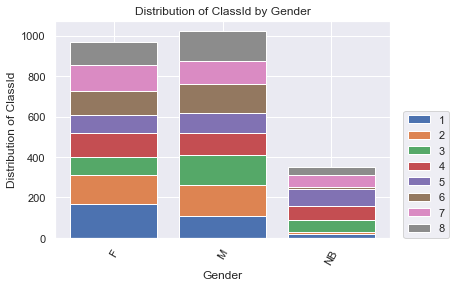

<Figure size 432x288 with 0 Axes>

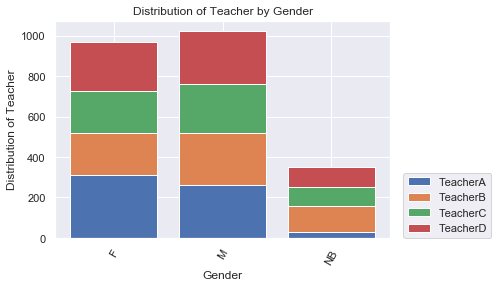

<Figure size 432x288 with 0 Axes>

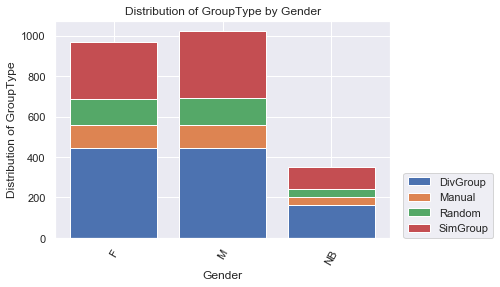

<Figure size 432x288 with 0 Axes>

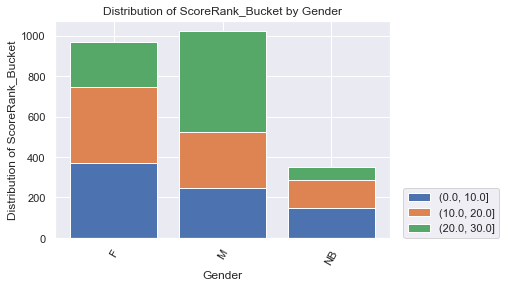

<Figure size 432x288 with 0 Axes>

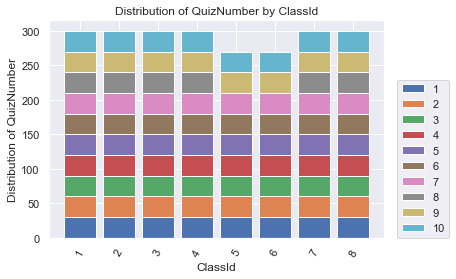

<Figure size 432x288 with 0 Axes>

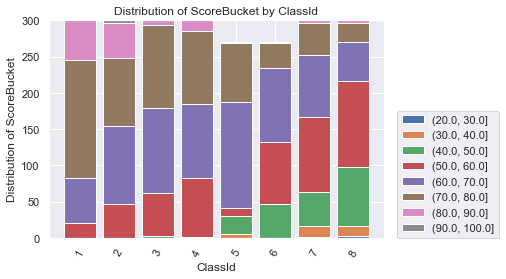

<Figure size 432x288 with 0 Axes>

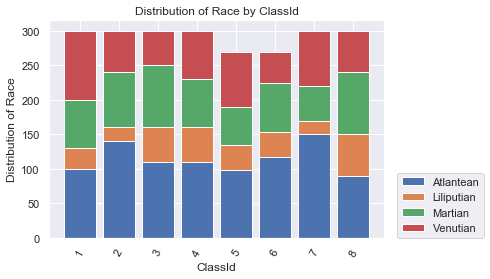

<Figure size 432x288 with 0 Axes>

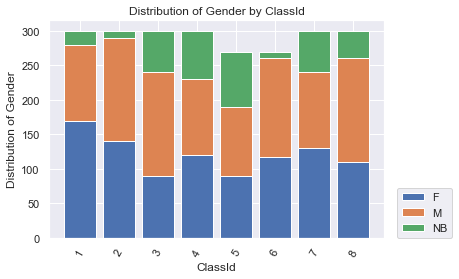

<Figure size 432x288 with 0 Axes>

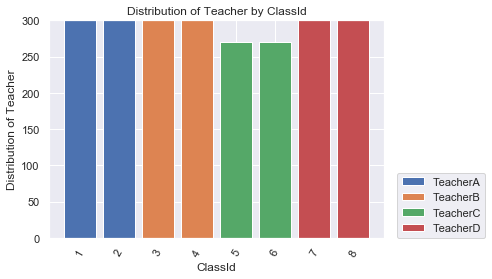

<Figure size 432x288 with 0 Axes>

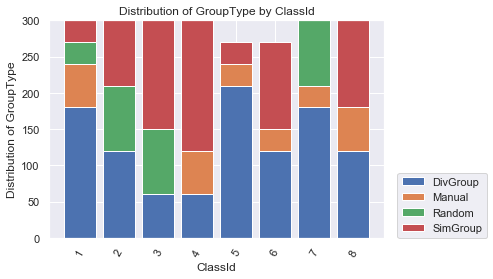

<Figure size 432x288 with 0 Axes>

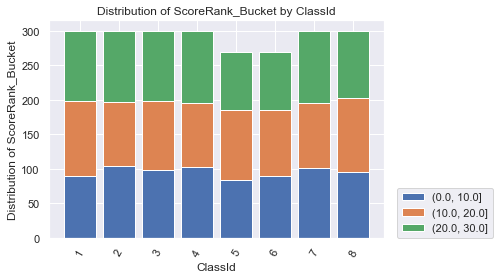

<Figure size 432x288 with 0 Axes>

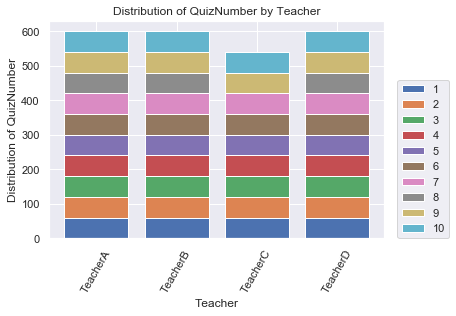

<Figure size 432x288 with 0 Axes>

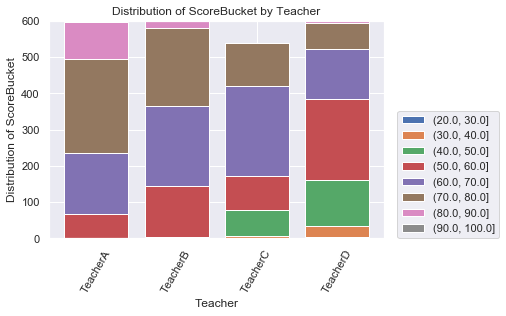

<Figure size 432x288 with 0 Axes>

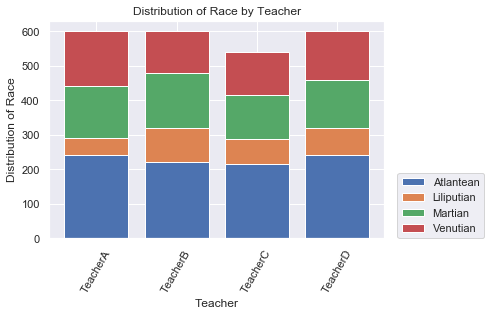

<Figure size 432x288 with 0 Axes>

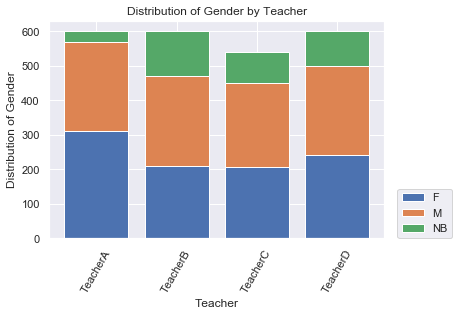

<Figure size 432x288 with 0 Axes>

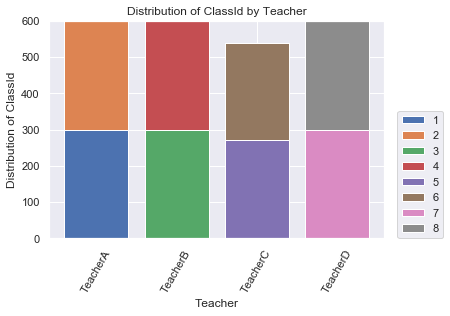

<Figure size 432x288 with 0 Axes>

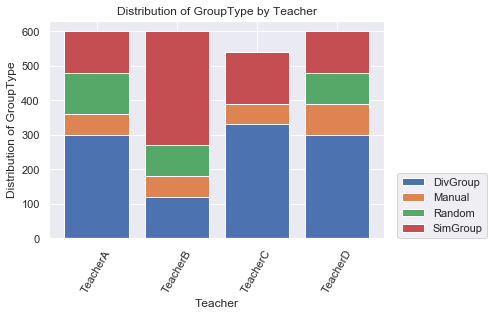

<Figure size 432x288 with 0 Axes>

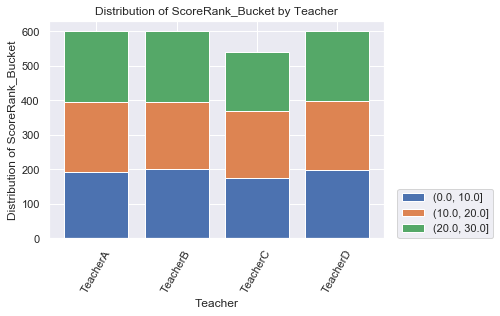

<Figure size 432x288 with 0 Axes>

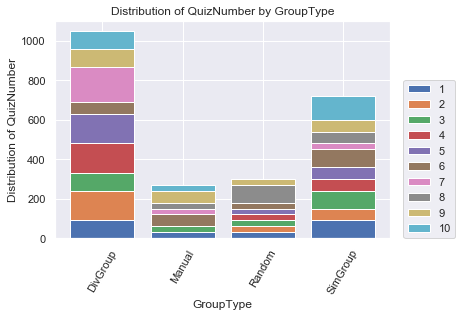

<Figure size 432x288 with 0 Axes>

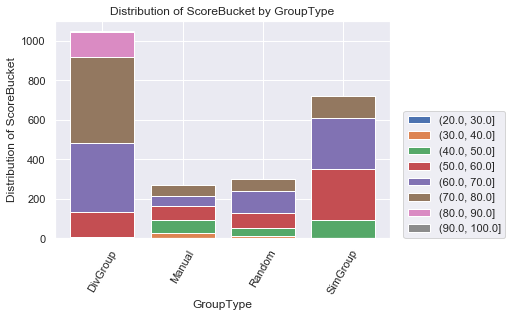

<Figure size 432x288 with 0 Axes>

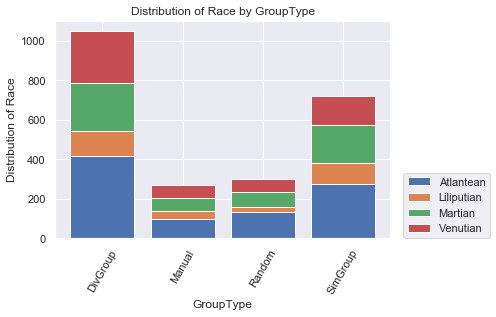

<Figure size 432x288 with 0 Axes>

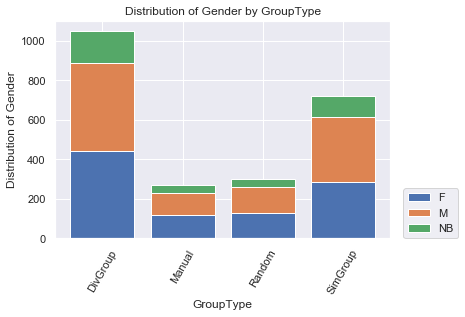

<Figure size 432x288 with 0 Axes>

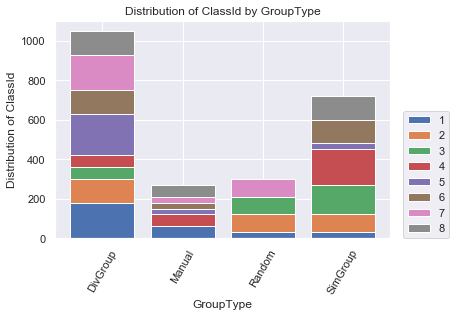

<Figure size 432x288 with 0 Axes>

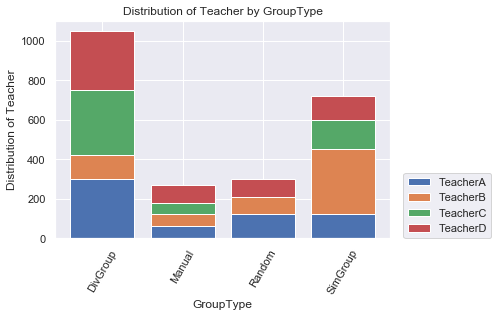

<Figure size 432x288 with 0 Axes>

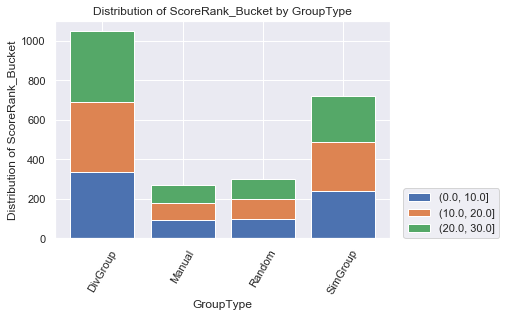

<Figure size 432x288 with 0 Axes>

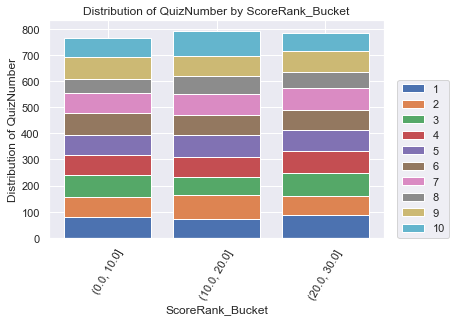

<Figure size 432x288 with 0 Axes>

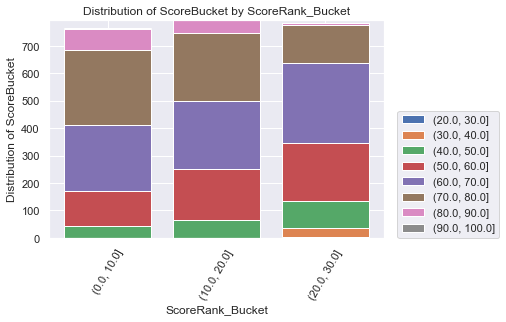

<Figure size 432x288 with 0 Axes>

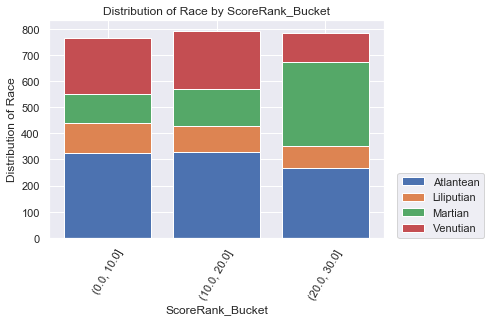

<Figure size 432x288 with 0 Axes>

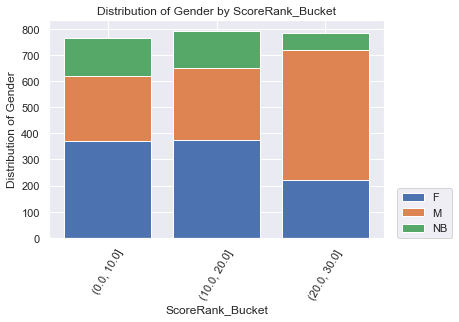

<Figure size 432x288 with 0 Axes>

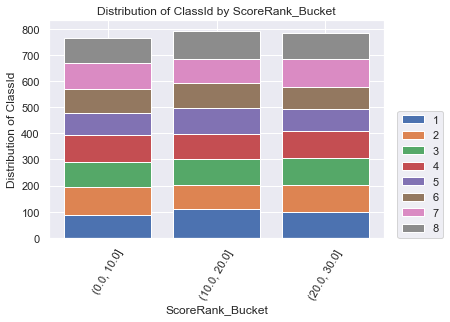

<Figure size 432x288 with 0 Axes>

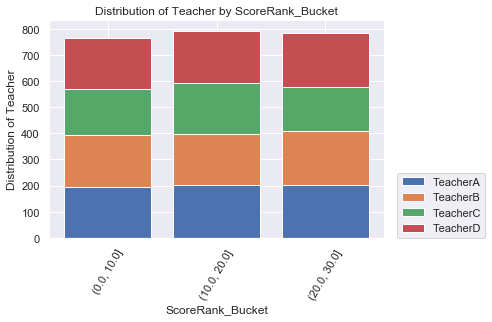

<Figure size 432x288 with 0 Axes>

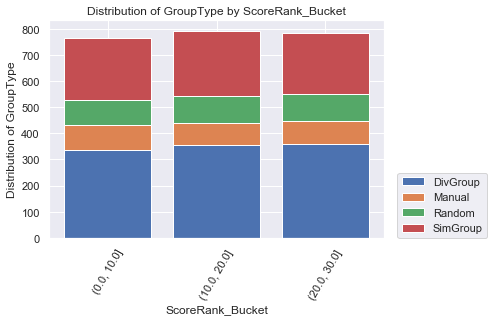

<Figure size 432x288 with 0 Axes>

In [1143]:
# check and explore new combined view as we did previously 

combined_view = combined_view[combined_view['Score'] > 0]
combined_view.name = 'combined_view'
check_and_explore(combined_view)

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


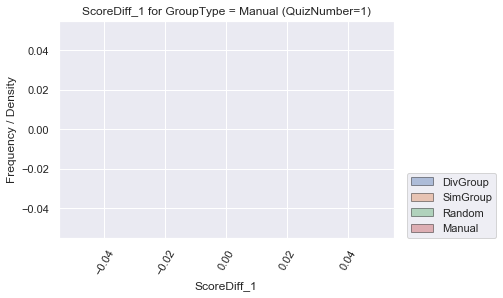

<Figure size 432x288 with 0 Axes>

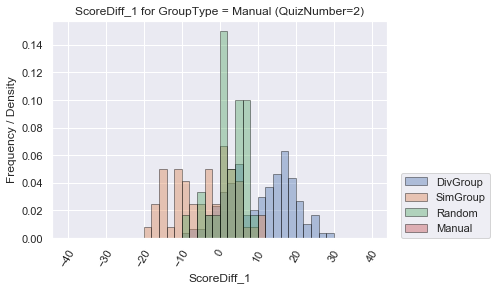

<Figure size 432x288 with 0 Axes>

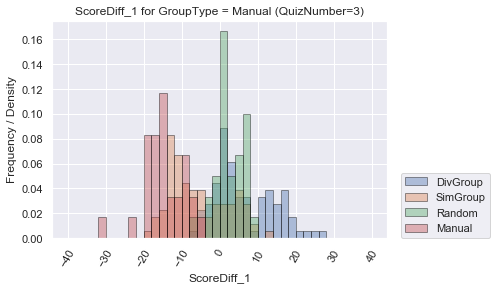

<Figure size 432x288 with 0 Axes>

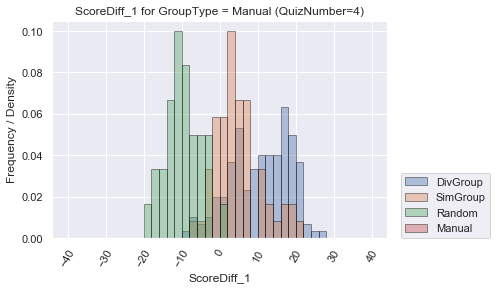

<Figure size 432x288 with 0 Axes>

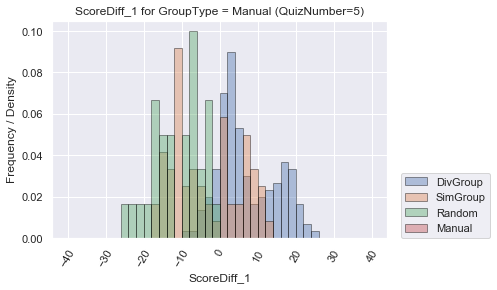

<Figure size 432x288 with 0 Axes>

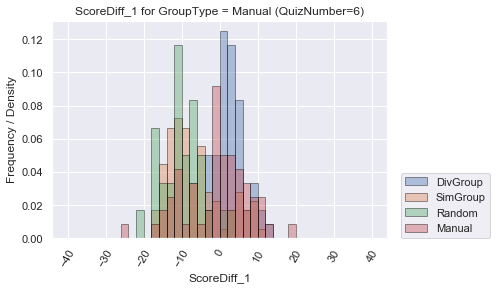

<Figure size 432x288 with 0 Axes>

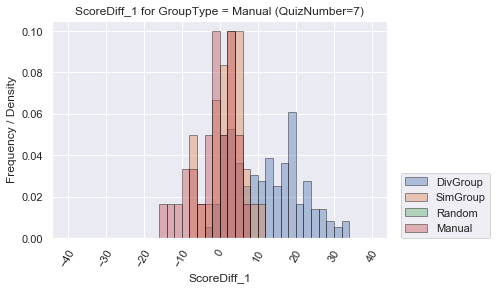

<Figure size 432x288 with 0 Axes>

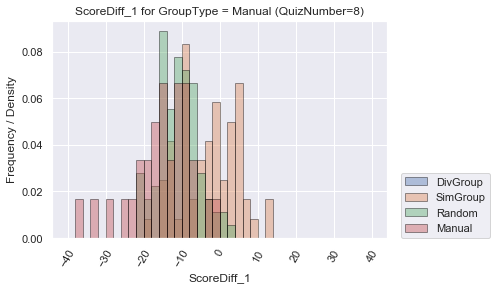

<Figure size 432x288 with 0 Axes>

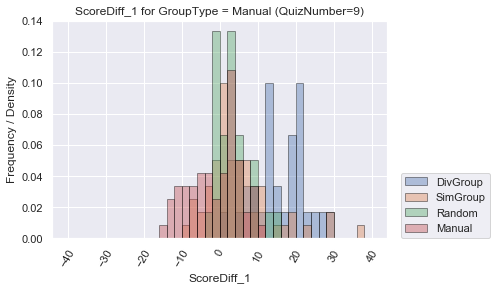

<Figure size 432x288 with 0 Axes>

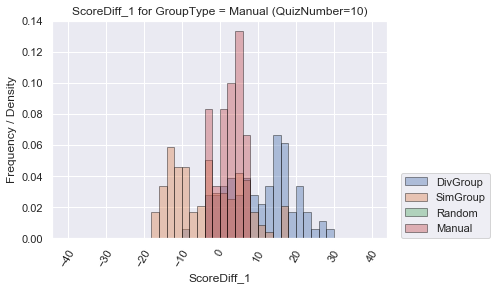

<Figure size 432x288 with 0 Axes>

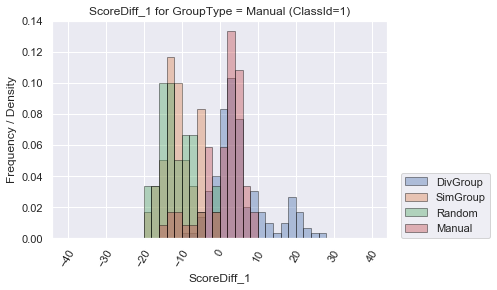

<Figure size 432x288 with 0 Axes>

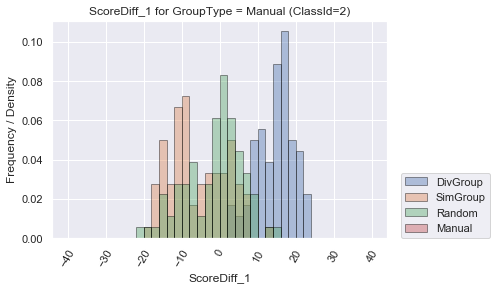

<Figure size 432x288 with 0 Axes>

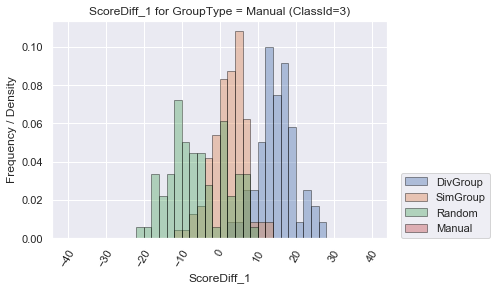

<Figure size 432x288 with 0 Axes>

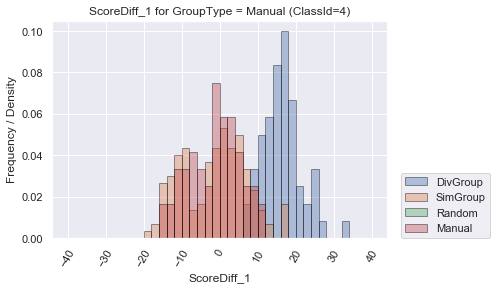

<Figure size 432x288 with 0 Axes>

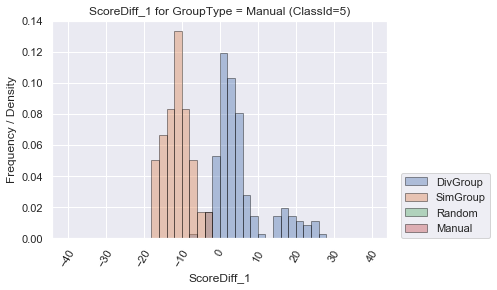

<Figure size 432x288 with 0 Axes>

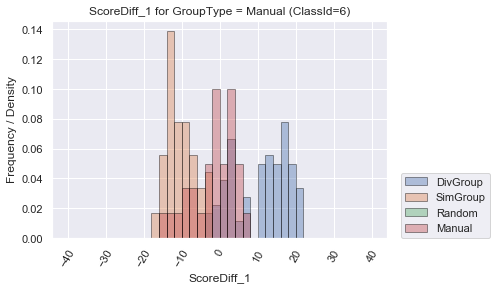

<Figure size 432x288 with 0 Axes>

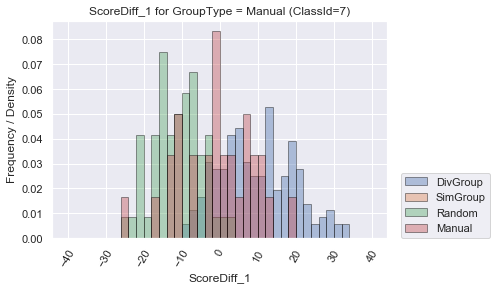

<Figure size 432x288 with 0 Axes>

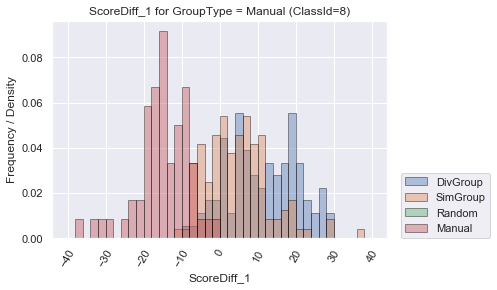

<Figure size 432x288 with 0 Axes>

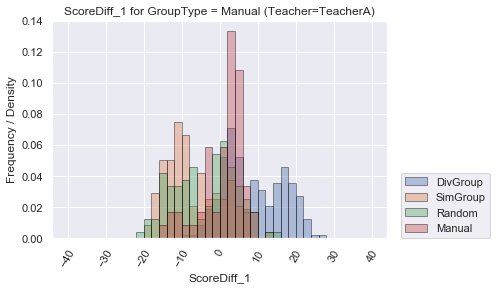

<Figure size 432x288 with 0 Axes>

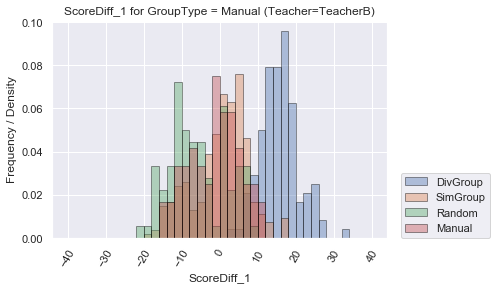

<Figure size 432x288 with 0 Axes>

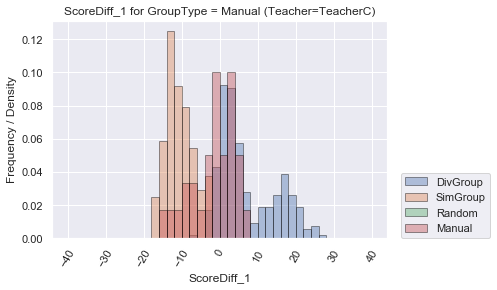

<Figure size 432x288 with 0 Axes>

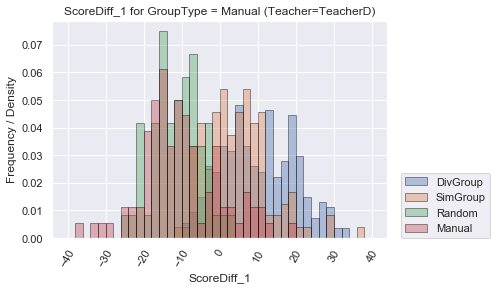

<Figure size 432x288 with 0 Axes>

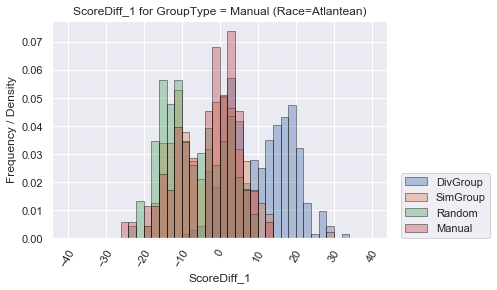

<Figure size 432x288 with 0 Axes>

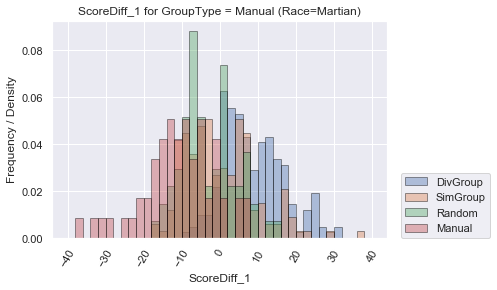

<Figure size 432x288 with 0 Axes>

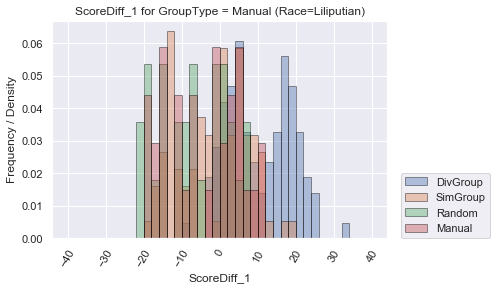

<Figure size 432x288 with 0 Axes>

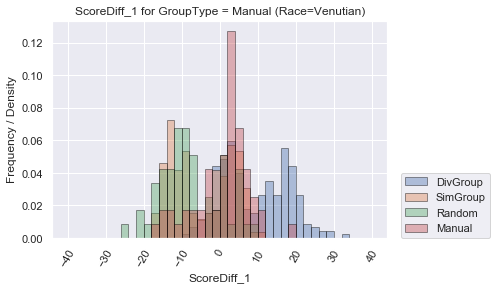

<Figure size 432x288 with 0 Axes>

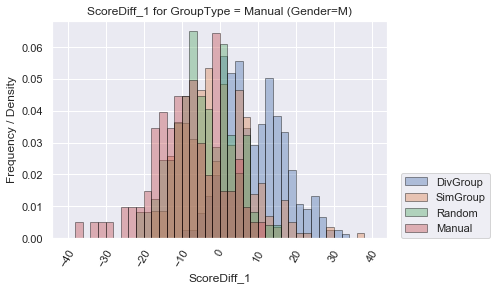

<Figure size 432x288 with 0 Axes>

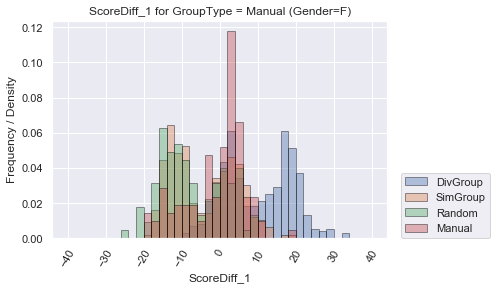

<Figure size 432x288 with 0 Axes>

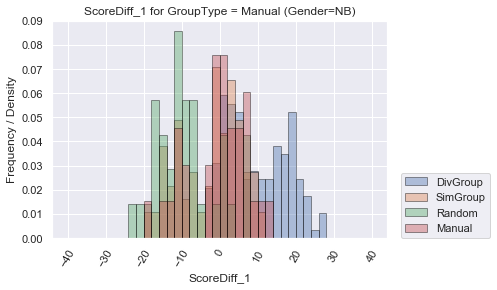

<Figure size 432x288 with 0 Axes>

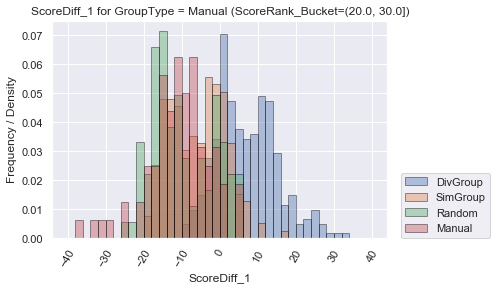

<Figure size 432x288 with 0 Axes>

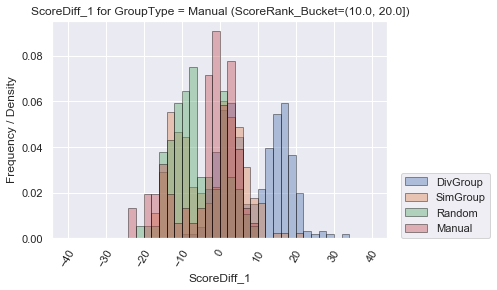

<Figure size 432x288 with 0 Axes>

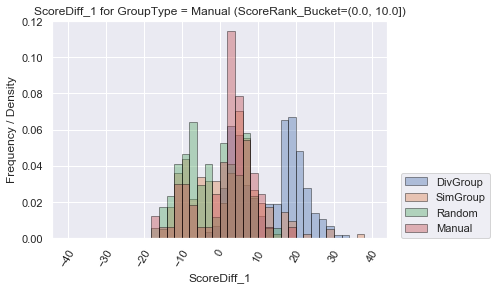

<Figure size 432x288 with 0 Axes>

In [1144]:
# create histograms to chart change in score (t-1) by different vars and split by group type

sns.set()

for i in combined_view['QuizNumber'].unique():
    histogram_by_category_and_filter(combined_view, 'QuizNumber', i, 'GroupType', 'ScoreDiff_1')
    
for i in combined_view['ClassId'].unique():
    histogram_by_category_and_filter(combined_view, 'ClassId', i, 'GroupType', 'ScoreDiff_1')
    
for i in combined_view['Teacher'].unique():
    histogram_by_category_and_filter(combined_view, 'Teacher', i, 'GroupType', 'ScoreDiff_1')  
    
for i in combined_view['Race'].unique():
    histogram_by_category_and_filter(combined_view, 'Race', i, 'GroupType', 'ScoreDiff_1')
    
for i in combined_view['Gender'].unique():
    histogram_by_category_and_filter(combined_view, 'Gender', i, 'GroupType', 'ScoreDiff_1')
    
for i in combined_view['ScoreRank_Bucket'].unique():
    histogram_by_category_and_filter(combined_view, 'ScoreRank_Bucket', i, 'GroupType', 'ScoreDiff_1')

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


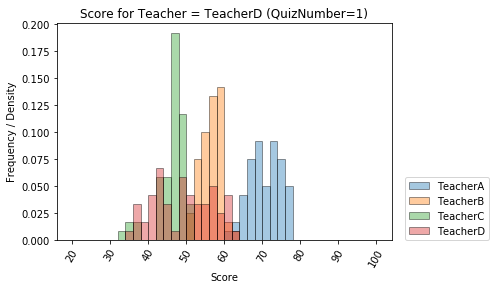

<Figure size 432x288 with 0 Axes>

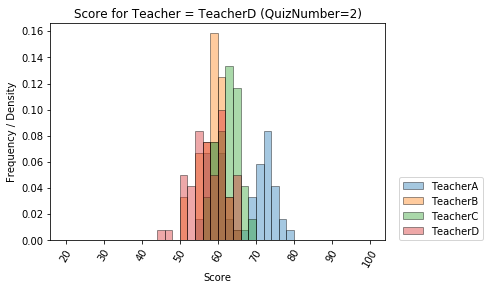

<Figure size 432x288 with 0 Axes>

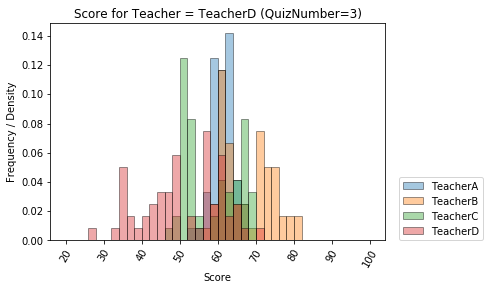

<Figure size 432x288 with 0 Axes>

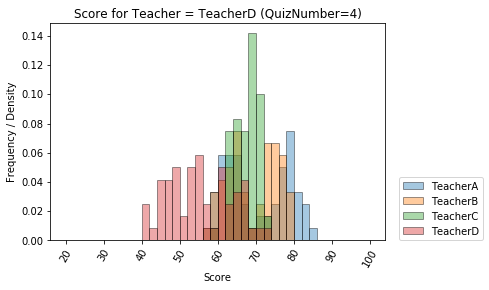

<Figure size 432x288 with 0 Axes>

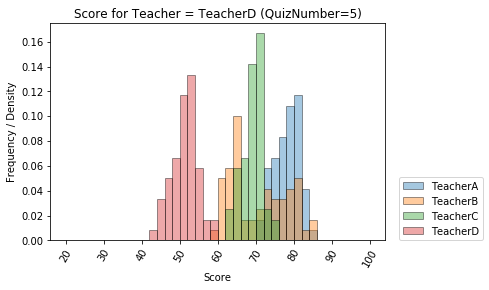

<Figure size 432x288 with 0 Axes>

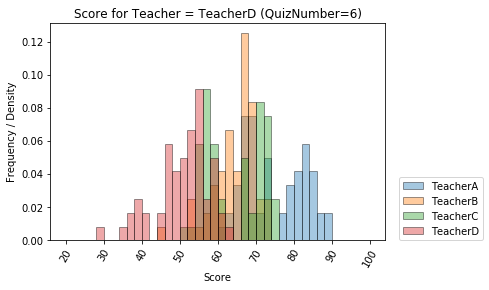

<Figure size 432x288 with 0 Axes>

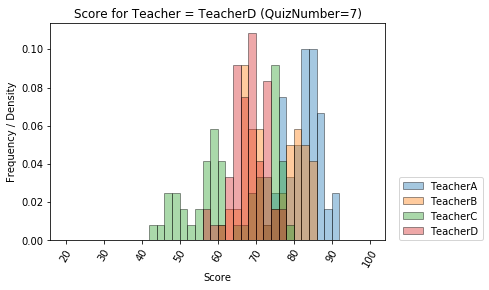

<Figure size 432x288 with 0 Axes>

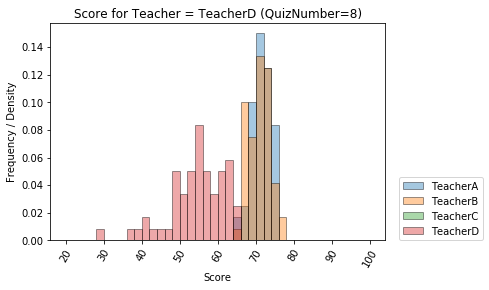

<Figure size 432x288 with 0 Axes>

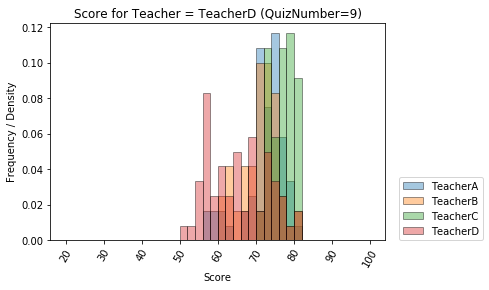

<Figure size 432x288 with 0 Axes>

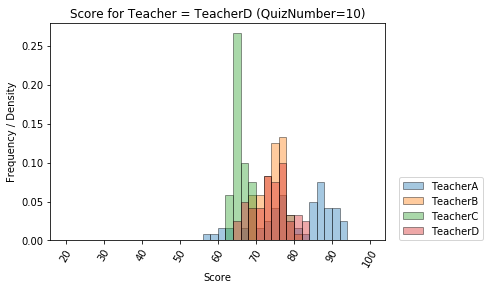

<Figure size 432x288 with 0 Axes>

In [684]:
# create histograms to chart raw score (t-1) by different vars and split by group type)

for i in combined_view['QuizNumber'].unique():
    histogram_by_category_and_filter(combined_view, 'QuizNumber', i, 'Race', 'Score', 
                                    min=20, max = 100, splits=41)
    
for i in combined_view['ClassId'].unique():
    histogram_by_category_and_filter(combined_view, 'ClassId', i, 'Race', 'Score',
                                    min=20, max = 100, splits=41)

for i in combined_view['QuizNumber'].unique():
    histogram_by_category_and_filter(combined_view, 'QuizNumber', i, 'Gender', 'Score',
                                    min=20, max = 100, splits=41)

for i in combined_view['QuizNumber'].unique():
    histogram_by_category_and_filter(combined_view, 'QuizNumber', i, 'Gender', 'Score',
                                    min=20, max = 100, splits=41)

for i in combined_view['ClassId'].unique():
    histogram_by_category_and_filter(combined_view, 'ClassId', i, 'Teacher', 'Score',
                                    min=20, max = 100, splits=41)

for i in combined_view['QuizNumber'].unique():
    histogram_by_category_and_filter(combined_view, 'QuizNumber', i, 'Teacher', 'Score',
                                    min=20, max = 100, splits=41)

ValueError: Could not interpret input 'ScoreRank_Bucket'

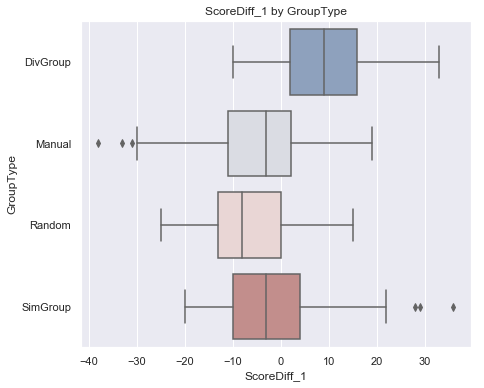

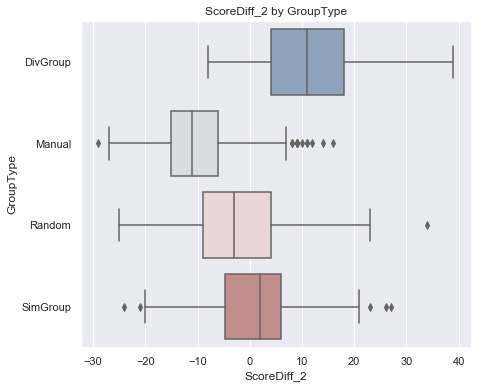

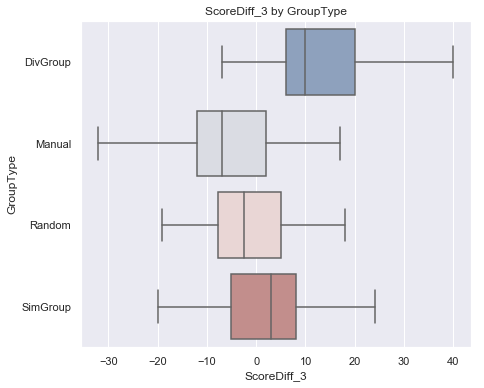

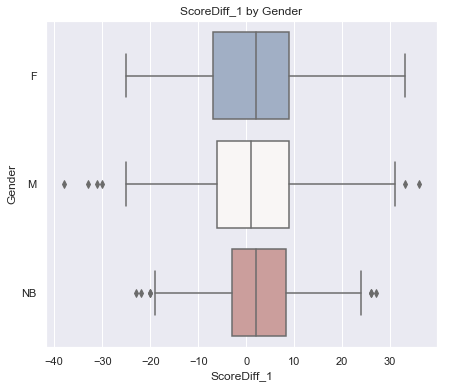

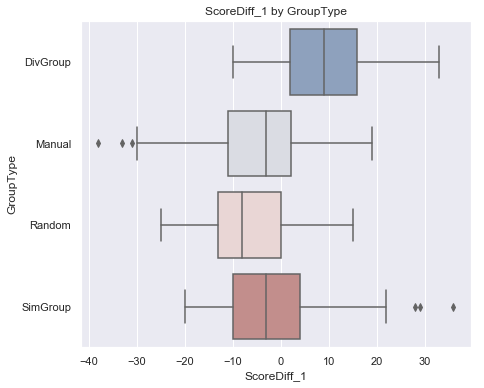

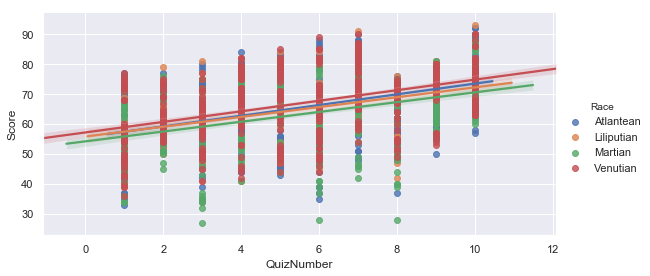

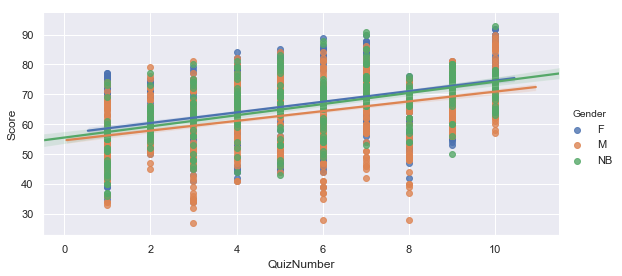

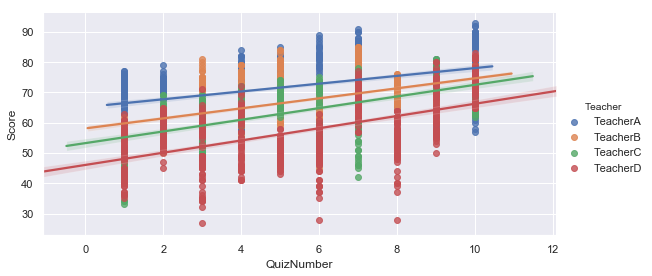

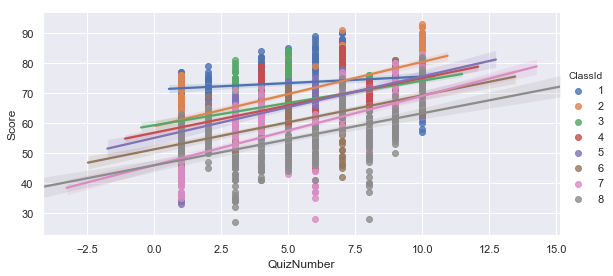

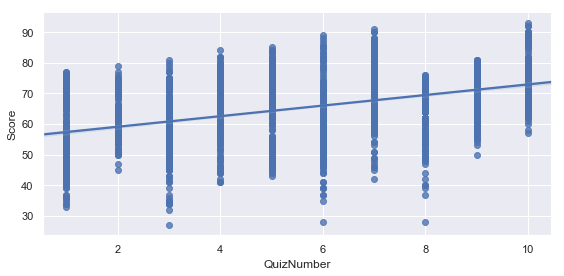

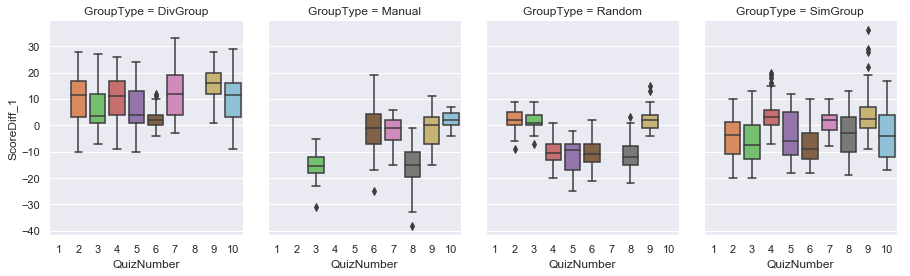

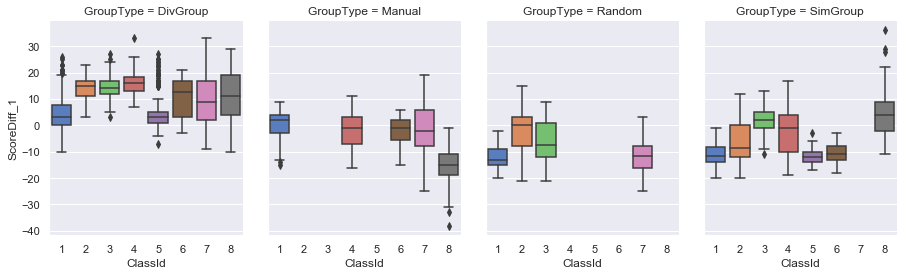

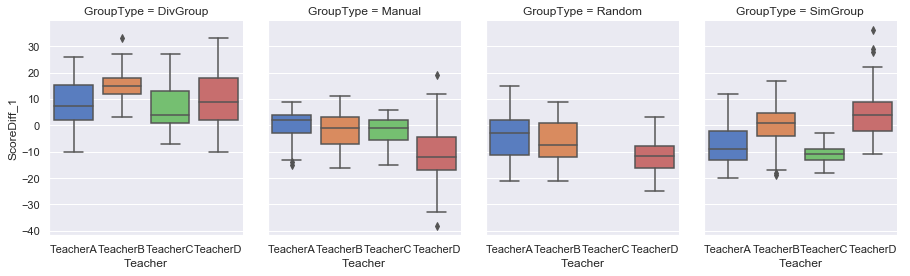

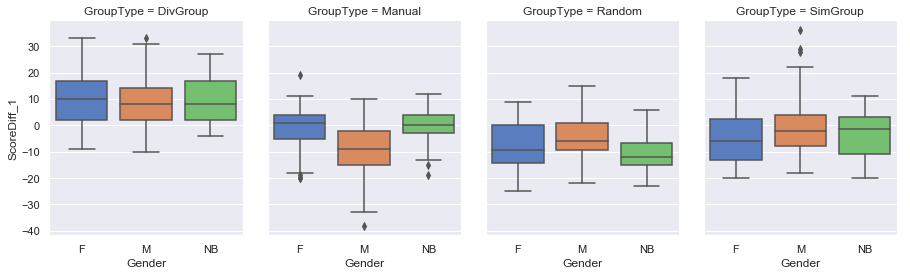

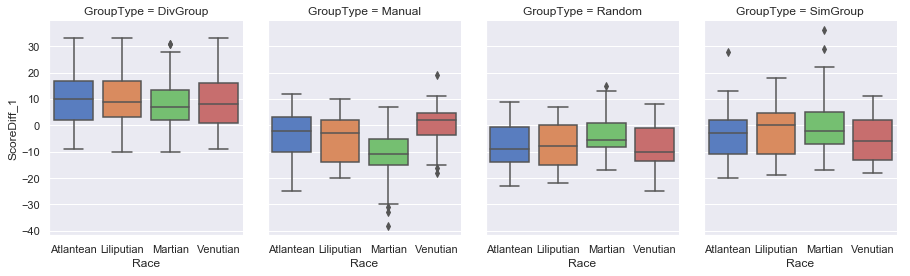

In [1053]:
sns.set()

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="ScoreDiff_1", y="GroupType", data=combined_view, palette="vlag")
ax.set_title('ScoreDiff_1 by GroupType')
ax.xaxis.grid(True)

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="ScoreDiff_2", y="GroupType", data=combined_view, palette="vlag")
ax.set_title('ScoreDiff_2 by GroupType')
ax.xaxis.grid(True)

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="ScoreDiff_3", y="GroupType", data=combined_view, palette="vlag")
ax.set_title('ScoreDiff_3 by GroupType')
ax.xaxis.grid(True)

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="ScoreDiff_1", y="Gender", data=combined_view, palette="vlag")
ax.set_title('ScoreDiff_1 by Gender')
ax.xaxis.grid(True)

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="ScoreDiff_1", y="GroupType", data=combined_view, palette="vlag")
ax.set_title('ScoreDiff_1 by GroupType')




sns.lmplot(x="QuizNumber", y="Score", data=combined_view, 
           hue="Race", height=4, aspect=2)

sns.lmplot(x="QuizNumber", y="Score", data=combined_view, 
           hue="Gender", height=4, aspect=2)

sns.lmplot(x="QuizNumber", y="Score", data=combined_view, 
           hue="Teacher", height=4, aspect=2)

sns.lmplot(x="QuizNumber", y="Score", data=combined_view, 
           hue="ClassId", height=4, aspect=2)

sns.lmplot(x="QuizNumber", y="Score", data=combined_view, height=4, aspect=2)





sns.catplot(x='QuizNumber', y='ScoreDiff_1', col='GroupType', 
                data=combined_view, palette=sns.color_palette("muted"), 
                col_wrap = 4, kind="box", height=4, aspect=0.8)


sns.catplot(x='ClassId', y='ScoreDiff_1', col='GroupType', 
                data=combined_view, palette=sns.color_palette("muted"), 
                col_wrap = 4, kind="box", height=4, aspect=0.8)

sns.catplot(x='Teacher', y='ScoreDiff_1', col='GroupType', 
                data=combined_view, palette=sns.color_palette("muted"), 
                col_wrap = 4, kind="box", height=4, aspect=0.8)

sns.catplot(x='Gender', y='ScoreDiff_1', col='GroupType', 
                data=combined_view, palette=sns.color_palette("muted"), 
                col_wrap = 4, kind="box", height=4, aspect=0.8)

sns.catplot(x='Race', y='ScoreDiff_1', col='GroupType', 
                data=combined_view, palette=sns.color_palette("muted"), 
                col_wrap = 4, kind="box", height=4, aspect=0.8)


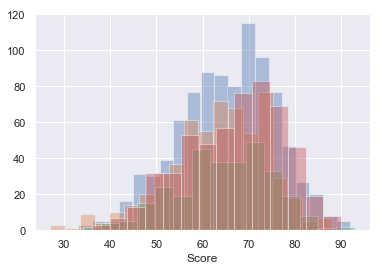

In [777]:
sns.set()

for i in combined_view['Race'].unique():
    ax = sns.distplot(combined_view[combined_view['Race'] == i]['Score'], label=i, kde=False)



    
# ax = sns.distplot(combined_view['Score'])
# ax = sns.distplot(combined_view[combined_view['Gender'] == 'M']['Score'])

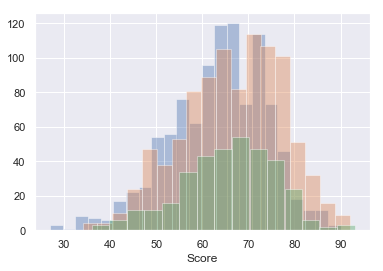

In [772]:
for i in combined_view['Gender'].unique():
    ax = sns.distplot(combined_view[combined_view['Gender'] == i]['Score'], label=i, kde=False)

In [825]:
from scipy import stats

nonull_scorediff = combined_view[combined_view['ScoreDiff_1'].notna()]
for i in combined_view['GroupType'].unique():
    print(i, ": ", stats.ttest_1samp(nonull_scorediff[nonull_scorediff['GroupType'] == i]['ScoreDiff_1'],0))


DivGroup :  Ttest_1sampResult(statistic=32.61116552532989, pvalue=1.431492260365745e-154)
SimGroup :  Ttest_1sampResult(statistic=-8.266186888858142, pvalue=8.223048951250926e-16)
Random :  Ttest_1sampResult(statistic=-13.62556728311207, pvalue=1.6679094780855123e-32)
Manual :  Ttest_1sampResult(statistic=-7.752341052081667, pvalue=2.5856160332950867e-13)


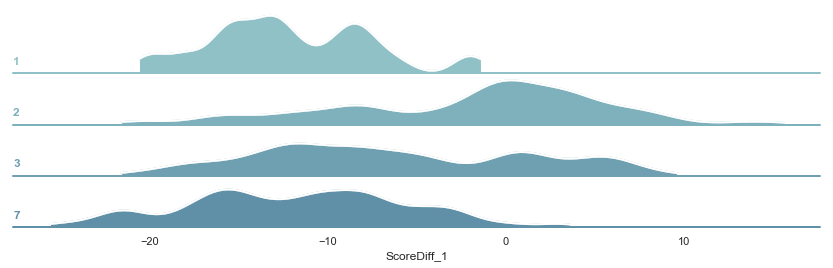

In [1098]:
ridge_plot_by_category(combined_view, 'ScoreDiff_1', 'ClassId', 'GroupType', 'Random')

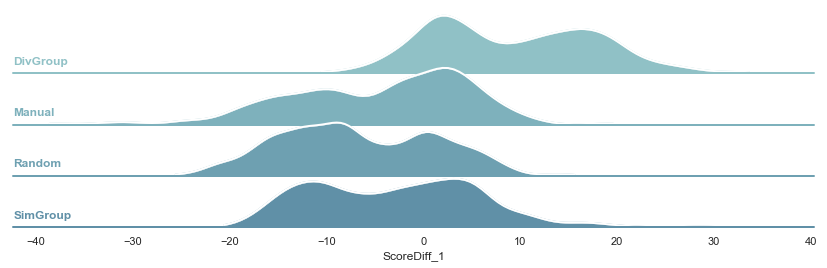

In [1111]:
ridge_plot_by_category(combined_view, 'ScoreDiff_1', 'GroupType')

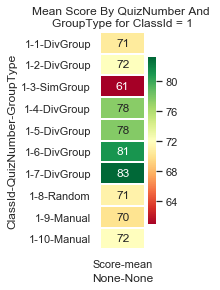

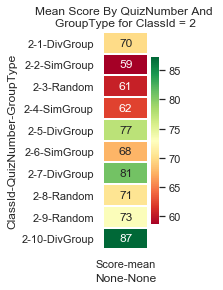

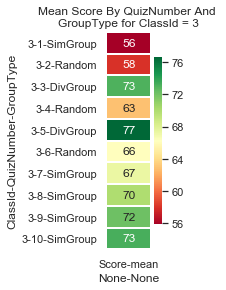

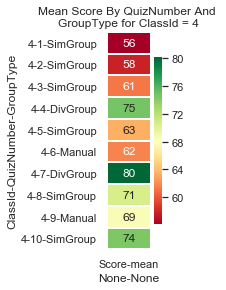

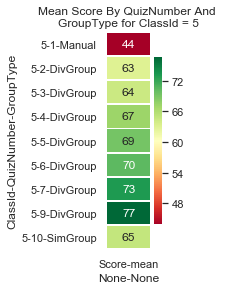

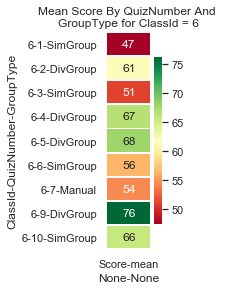

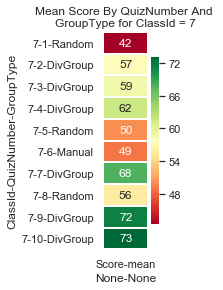

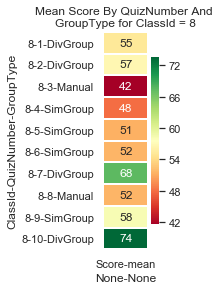

In [1192]:
sns.set()

# Load the example flights dataset and conver to long-form
for i in combined_view['ClassId'].unique(): 
    combined_view_temp = combined_view[combined_view['ClassId'] == i]
    pivot_table = combined_view_temp[['ClassId', 'QuizNumber', 'GroupType', 'Score']].groupby(
        ['ClassId', 'QuizNumber', 'GroupType']).agg([np.mean]) # np.std, np.min, np.max

    f, ax = plt.subplots(figsize=(1, 4))
    ax.set_title('Mean Score By QuizNumber And \nGroupType for ClassId = ' + str(i))
    ax.set_ylabel('Mean Score')
    sns.heatmap(pivot_table, annot=True, linewidths=1, ax=ax, cmap='RdYlGn')
    




/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


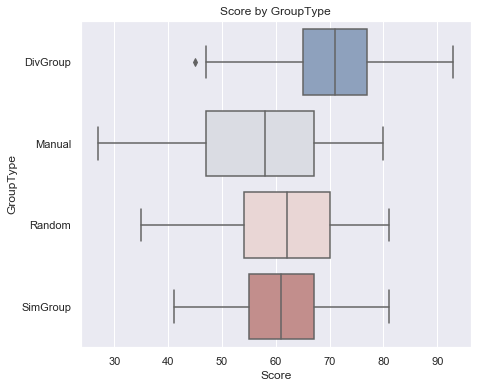

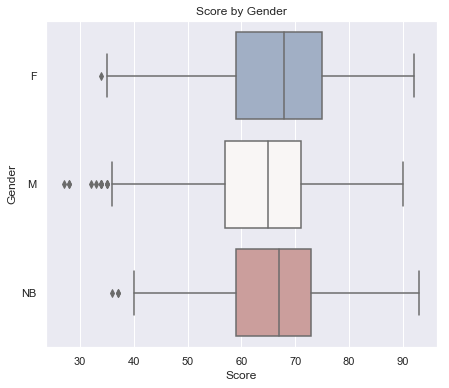

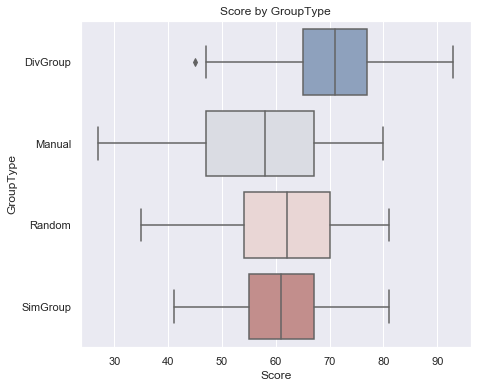

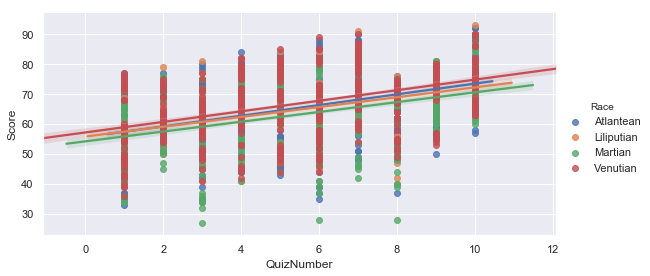

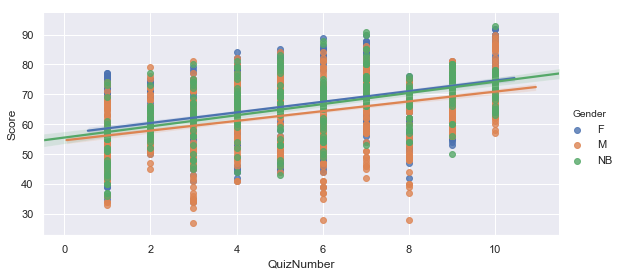

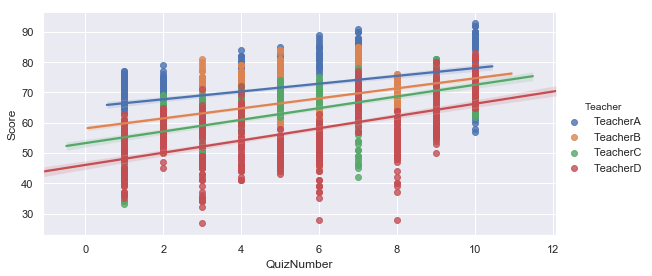

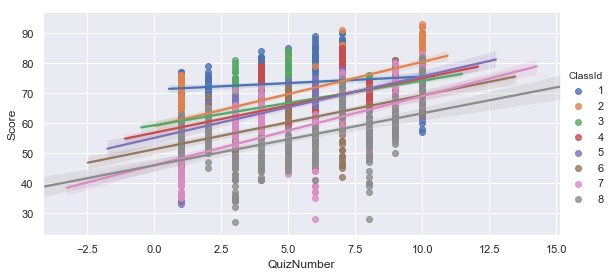

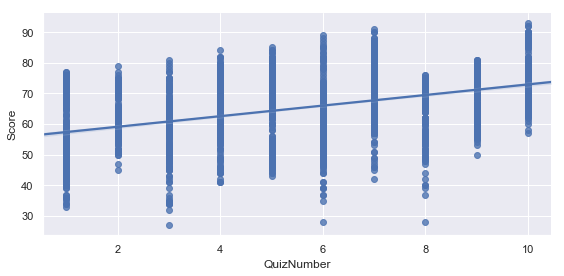

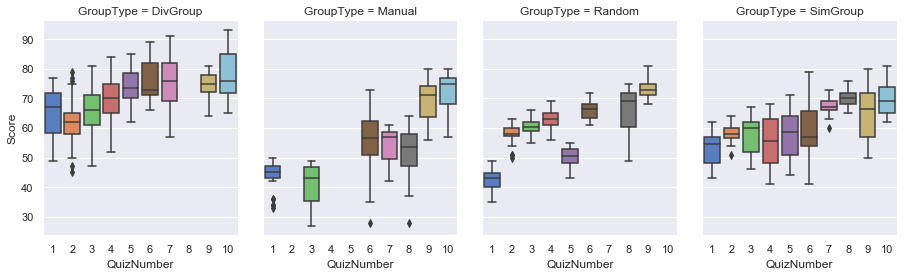

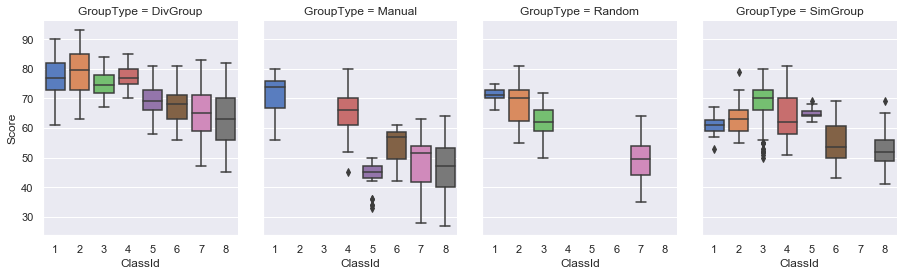

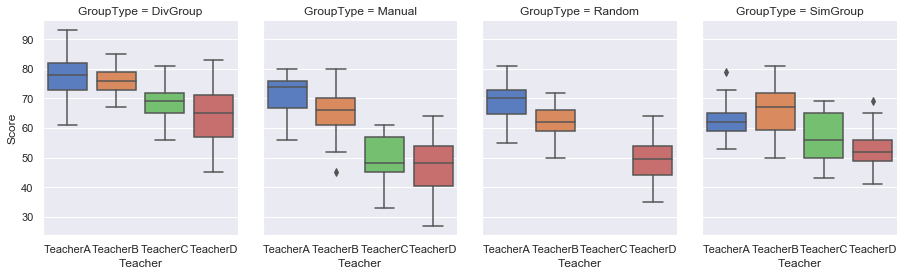

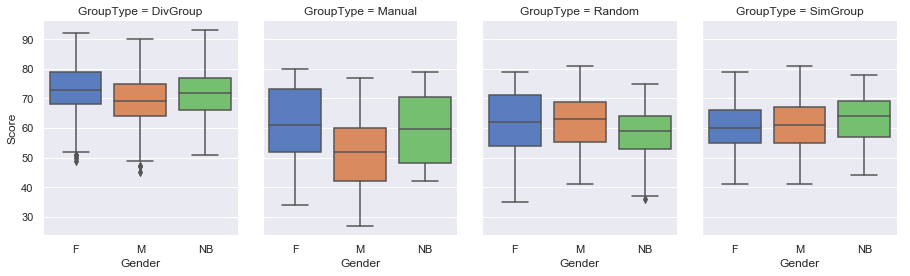

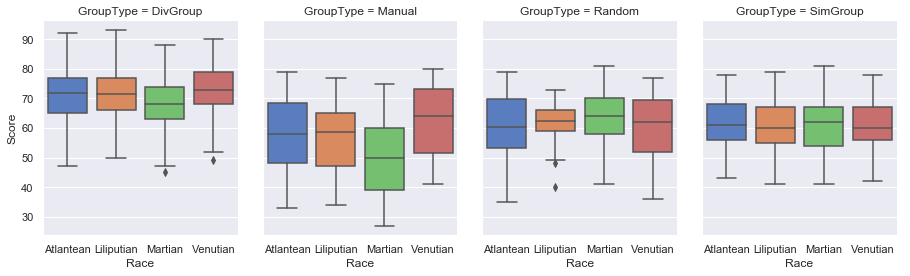

In [1193]:
sns.set()

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="Score", y="GroupType", data=combined_view, palette="vlag")
ax.set_title('Score by GroupType')
ax.xaxis.grid(True)

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="Score", y="Gender", data=combined_view, palette="vlag")
ax.set_title('Score by Gender')
ax.xaxis.grid(True)

f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="Score", y="GroupType", data=combined_view, palette="vlag")
ax.set_title('Score by GroupType')




sns.lmplot(x="QuizNumber", y="Score", data=combined_view, 
           hue="Race", height=4, aspect=2)

sns.lmplot(x="QuizNumber", y="Score", data=combined_view, 
           hue="Gender", height=4, aspect=2)

sns.lmplot(x="QuizNumber", y="Score", data=combined_view, 
           hue="Teacher", height=4, aspect=2)

sns.lmplot(x="QuizNumber", y="Score", data=combined_view, 
           hue="ClassId", height=4, aspect=2)

sns.lmplot(x="QuizNumber", y="Score", data=combined_view, height=4, aspect=2)





sns.catplot(x='QuizNumber', y='Score', col='GroupType', 
                data=combined_view, palette=sns.color_palette("muted"), 
                col_wrap = 4, kind="box", height=4, aspect=0.8)


sns.catplot(x='ClassId', y='Score', col='GroupType', 
                data=combined_view, palette=sns.color_palette("muted"), 
                col_wrap = 4, kind="box", height=4, aspect=0.8)

sns.catplot(x='Teacher', y='Score', col='GroupType', 
                data=combined_view, palette=sns.color_palette("muted"), 
                col_wrap = 4, kind="box", height=4, aspect=0.8)

sns.catplot(x='Gender', y='Score', col='GroupType', 
                data=combined_view, palette=sns.color_palette("muted"), 
                col_wrap = 4, kind="box", height=4, aspect=0.8)

sns.catplot(x='Race', y='Score', col='GroupType', 
                data=combined_view, palette=sns.color_palette("muted"), 
                col_wrap = 4, kind="box", height=4, aspect=0.8)

In [1191]:
print(combined_view)

pivot_table = combined_view[['QuizNumber', 'Gender', 'Score']].groupby(
    'QuizNumber', 'Gender', as_index=False).agg([np.mean]) # np.std, np.min, np.max

#pivot_table = combined_view[['QuizNumber', 'Score']].groupby(
    #'QuizNumber',as_index=False).agg([np.mean]) # np.std, np.min, np.max

    

plt.plot(pivot_table['Score'], marker = 'o')
plt.ylim(0,100)
plt.title('Average Score By Quiz Week')
plt.ylabel('Average Score')



      QuizNumber  Score  StudentId   ScoreBucket  ScoreDiff_1  ScoreDiff_2  \
1517           1   61.0        142  (60.0, 70.0]          NaN          NaN   
1500           1   65.0          6  (60.0, 70.0]          NaN          NaN   
1508           1   65.0         70  (60.0, 70.0]          NaN          NaN   
1524           1   66.0        198  (60.0, 70.0]          NaN          NaN   
1515           1   67.0        126  (60.0, 70.0]          NaN          NaN   
1522           1   67.0        182  (60.0, 70.0]          NaN          NaN   
1527           1   67.0        222  (60.0, 70.0]          NaN          NaN   
1506           1   68.0         54  (60.0, 70.0]          NaN          NaN   
1509           1   68.0         78  (60.0, 70.0]          NaN          NaN   
1513           1   68.0        110  (60.0, 70.0]          NaN          NaN   
1519           1   68.0        158  (60.0, 70.0]          NaN          NaN   
1529           1   68.0        238  (60.0, 70.0]          NaN   

ValueError: No axis named Gender for object type <class 'pandas.core.frame.DataFrame'>

In [1123]:
# read in raw data files as dataframes

groups_raw = pd.read_csv('groups.csv')
students_raw = pd.read_csv('students.csv')
scores_raw = pd.read_csv('scores.csv')

In [1124]:
# confirm rows and columns for each dataframe

print('\n',groups_raw.head())
print('\n',students_raw.head())
print('\n',scores_raw.head())


   GroupType  QuizNumber  ClassId
0  DivGroup           1        1
1  DivGroup           2        1
2  SimGroup           3        1
3  DivGroup           4        1
4  DivGroup           5        1

    StudentId        Race Gender  ClassId   Teacher
0          6     Martian      M        1  TeacherA
1         14    Venutian      F        1  TeacherA
2         22   Atlantean     NB        1  TeacherA
3         30   Atlantean      F        1  TeacherA
4         38  Liliputian      M        1  TeacherA

    StudentId  QuizNumber  Score
0          1           1     45
1          2           1     54
2          3           1     47
3          4           1     55
4          5           1     52


In [30]:
# confirm numeric data types in each dataframe

numeric_dtypes = [np.dtype('int64'), np.dtype('float64')]

cols_to_check = ['QuizNumber', 'ClassId']
assert groups_raw[cols_to_check].apply(lambda x: x.dtype).isin(numeric_dtypes).all()

cols_to_check = ['StudentId', 'ClassId']
assert students_raw[cols_to_check].apply(lambda x: x.dtype).isin(numeric_dtypes).all()

cols_to_check = ['StudentId', 'QuizNumber', 'Score']
assert scores_raw[cols_to_check].apply(lambda x: x.dtype).isin(numeric_dtypes).all()

In [31]:
# check for null values in each dataframe

try:
    assert students_raw.isnull().values.sum() == 0
except AssertionError:
    print('\nDataframe: students_raw')
    print([students_raw.iloc[i] for i in range(len(students_raw)) 
           if students_raw.isnull().values[i].sum() > 0])
    
try:
    assert groups_raw.isnull().values.sum() == 0
except AssertionError:
    print('\nDataframe: groups_raw')
    print([groups_raw.iloc[i] for i in range(len(groups_raw)) 
           if groups_raw.isnull().values[i].sum() > 0])
    
try:
    assert scores_raw.isnull().values.sum() == 0
except AssertionError:
    print('\nDataframe: scores_raw')
    print([scores_raw.iloc[i] for i in range(len(scores_raw)) 
           if scores_raw.isnull().values[i].sum() > 0])


Dataframe: students_raw
[StudentId         173
Race          Martian
Gender            NaN
ClassId             3
Teacher      TeacherB
Name: 81, dtype: object]


In [32]:
# fill in values for Gender (1 Fe value looks like it should be F, and NaN should be M)

students_raw.loc[students_raw['Gender'].isnull(), 'Gender'] = 'M' ## all other Martians are M
students_raw.loc[students_raw['Gender'] == 'Fe', 'Gender'] = 'F' ## all other Venutians are F

In [33]:
# add additional fields (score buckets, coded values for categorical variables)

bins = np.linspace(20, 100, num=21)
scores_raw['ScoreBucket'] = pd.cut(scores_raw["Score"], bins)




Dataframe: students_raw


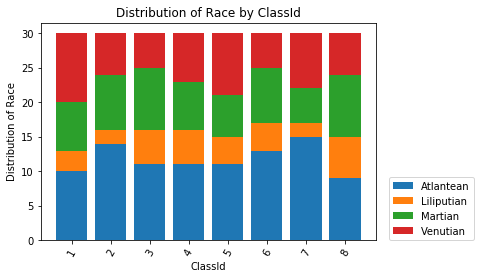

<Figure size 432x288 with 0 Axes>

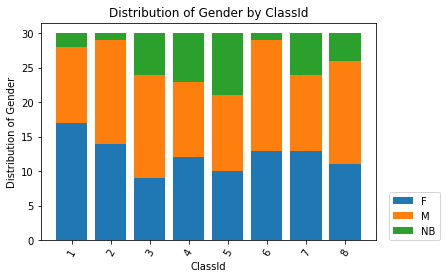

<Figure size 432x288 with 0 Axes>

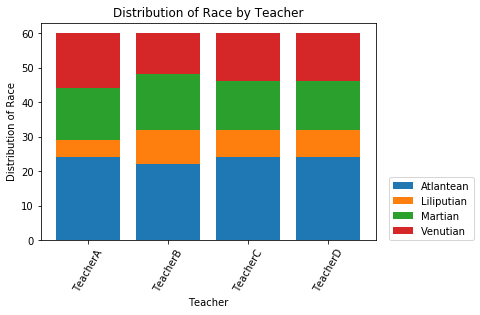

<Figure size 432x288 with 0 Axes>

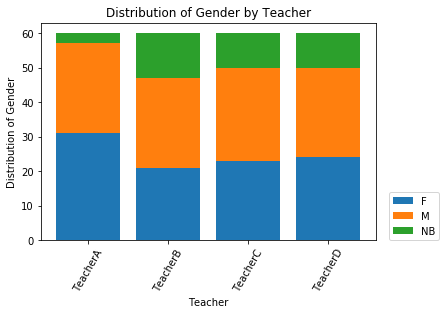

<Figure size 432x288 with 0 Axes>

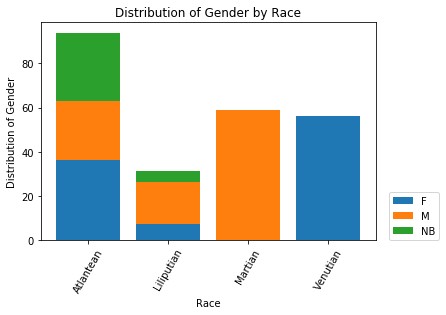

<Figure size 432x288 with 0 Axes>

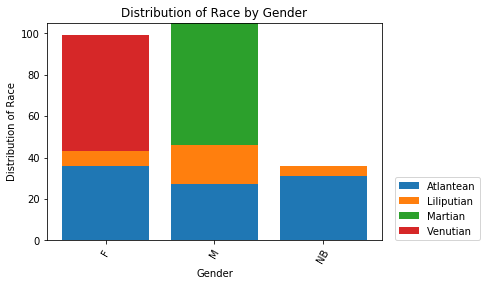

<Figure size 432x288 with 0 Axes>

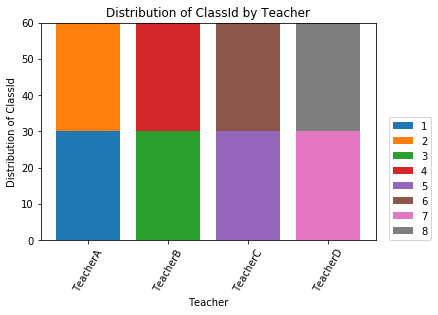




Dataframe: groups_raw


<Figure size 432x288 with 0 Axes>

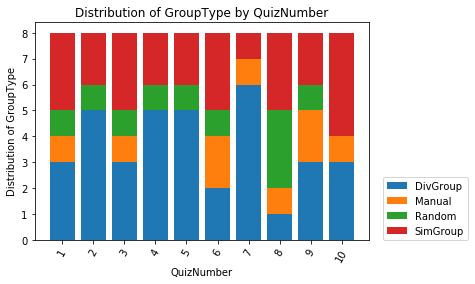

<Figure size 432x288 with 0 Axes>

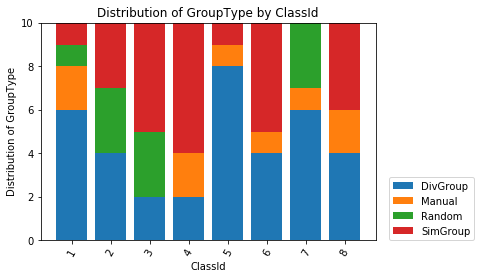

<Figure size 432x288 with 0 Axes>

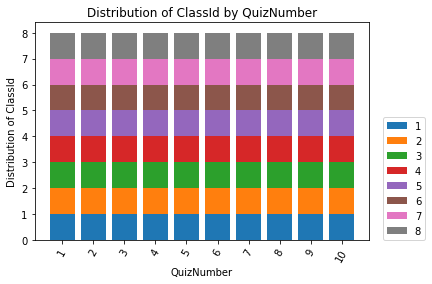




Dataframe: scores_raw


<Figure size 432x288 with 0 Axes>

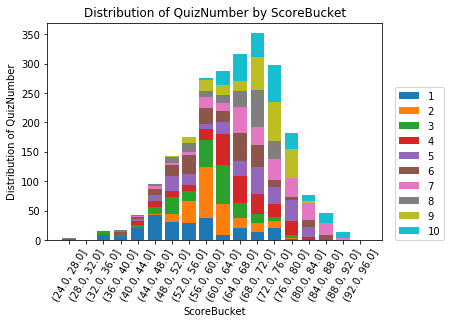

<Figure size 432x288 with 0 Axes>

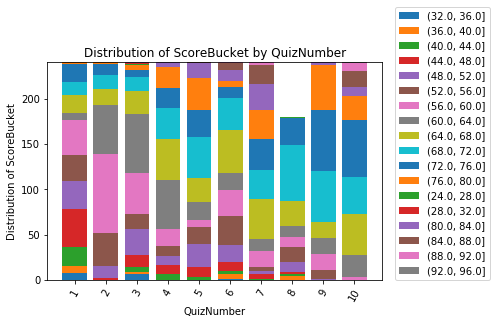

<Figure size 432x288 with 0 Axes>

In [34]:
# run through exploratory data analysis using pre defined helper functions (rerun after more cleaning)

## students_raw
print('\n\n\nDataframe: students_raw')
stacked_bar_chart_by_category(students_raw,'ClassId','Race')
stacked_bar_chart_by_category(students_raw,'ClassId','Gender')
stacked_bar_chart_by_category(students_raw,'Teacher','Race')
stacked_bar_chart_by_category(students_raw,'Teacher','Gender')
stacked_bar_chart_by_category(students_raw,'Race','Gender')
stacked_bar_chart_by_category(students_raw,'Gender','Race')
stacked_bar_chart_by_category(students_raw,'Teacher','ClassId')

## groups_raw
print('\n\n\nDataframe: groups_raw')
stacked_bar_chart_by_category(groups_raw,'QuizNumber', 'GroupType')
stacked_bar_chart_by_category(groups_raw,'ClassId', 'GroupType')
stacked_bar_chart_by_category(groups_raw,'QuizNumber','ClassId')

## scores_raw
print('\n\n\nDataframe: scores_raw')
stacked_bar_chart_by_category(scores_raw[scores_raw['ScoreBucket'].notna()],'ScoreBucket', 'QuizNumber')
stacked_bar_chart_by_category(scores_raw[scores_raw['ScoreBucket'].notna()],'QuizNumber', 'ScoreBucket')

In [35]:
# filling in rows for students who are missing certain quizzes

new_rows = []
for i in range(1, scores_raw['StudentId'].nunique()+1): 
    for j in range(1, scores_raw['QuizNumber'].nunique()+1): 
        if len(scores_raw[(scores_raw['StudentId'] == i) & (scores_raw['QuizNumber'] == j)]) == 0:
            new_row = {'StudentId': [i], 
                       'QuizNumber': [j],
                       'Score': [np.nan]}
            new_row_df = pd.DataFrame(data=new_row)
            new_rows.append(new_row_df)

scores_raw = scores_raw.append(pd.concat(new_rows), ignore_index=False, sort=True)
scores_raw.sort_values(['StudentId', 'QuizNumber'], inplace=True)
scores_raw.reset_index(drop=True)

QuizNumber  Score   ScoreBucket  StudentId
0              1   45.0  (44.0, 48.0]          1
1              2   58.0  (56.0, 60.0]          1
2              3   53.0  (52.0, 56.0]          1
3              4   55.0  (52.0, 56.0]          1
4              5   53.0  (52.0, 56.0]          1
5              6   28.0  (24.0, 28.0]          1
6              7   59.0  (56.0, 60.0]          1
7              8   62.0  (60.0, 64.0]          1
8              9   68.0  (64.0, 68.0]          1
9             10   67.0  (64.0, 68.0]          1
10             1   54.0  (52.0, 56.0]          2
11             2   54.0  (52.0, 56.0]          2
12             3   35.0  (32.0, 36.0]          2
13             4   46.0  (44.0, 48.0]          2
14             5   52.0  (48.0, 52.0]          2
15             6   41.0  (40.0, 44.0]          2
16             7   65.0  (64.0, 68.0]          2
17             8   50.0  (48.0, 52.0]          2
18             9   60.0  (56.0, 60.0]          2
19            10   71.0  (68.0, 72.0]          2
20             1   47.0  (44.0, 48.0]          3
21             2   63.0  (60.0, 64.0]          3
22             3   52.0  (48.0, 52.0]          3
23             4   68.0  (64.0, 68.0]          3
24             5   70.0  (68.0, 72.0]          3
25             6   57.0  (56.0, 60.0]          3
26             7   60.0  (56.0, 60.0]          3
27             8    NaN           NaN          3
28             9   78.0  (76.0, 80.0]          3
29            10   65.0  (64.0, 68.0]          3
...          ...    ...           ...        ...
2370           1   68.0  (64.0, 68.0]        238
2371           2   76.0  (72.0, 76.0]        238
2372           3   64.0  (60.0, 64.0]        238
2373           4   76.0  (72.0, 76.0]        238
2374           5   76.0  (72.0, 76.0]        238
2375           6   78.0  (76.0, 80.0]        238
2376           7   79.0  (76.0, 80.0]        238
2377           8   71.0  (68.0, 72.0]        238
2378           9   66.0  (64.0, 68.0]        238
2379          10   73.0  (72.0, 76.0]        238
2380           1   45.0  (44.0, 48.0]        239
2381           2   60.0  (56.0, 60.0]        239
2382           3   61.0  (60.0, 64.0]        239
2383           4   64.0  (60.0, 64.0]        239
2384           5   69.0  (68.0, 72.0]        239
2385           6   66.0  (64.0, 68.0]        239
2386           7   65.0  (64.0, 68.0]        239
2387           8    NaN           NaN        239
2388           9   72.0  (68.0, 72.0]        239
2389          10   69.0  (68.0, 72.0]        239
2390           1   75.0  (72.0, 76.0]        240
2391           2   59.0  (56.0, 60.0]        240
2392           3   63.0  (60.0, 64.0]        240
2393           4   61.0  (60.0, 64.0]        240
2394           5   80.0  (76.0, 80.0]        240
2395           6   68.0  (64.0, 68.0]        240
2396           7   84.0  (80.0, 84.0]        240
2397           8   73.0  (72.0, 76.0]        240
2398           9   77.0  (76.0, 80.0]        240
2399          10   88.0  (84.0, 88.0]        240

[2400 rows x 4 columns]

In [36]:
# join tables together - first join scores to students on student id and then join to groups on quiz and class

df1 = pd.merge(left=scores_raw, right=students_raw, left_on='StudentId', right_on='StudentId')
df2 = pd.merge(left=df1, right=groups_raw, left_on=['ClassId', 'QuizNumber'], right_on=['ClassId','QuizNumber'])
#dataframe_profile(df2)

In [37]:
# create score diff columns

df2.sort_values(['StudentId', 'QuizNumber'], inplace=True)

for i in range(1, max(df2['QuizNumber'])):
    field_name = 'ScoreDiff_' + str(i)
    df2[field_name] = df2['Score'].diff(i)
    for j in range(i+1):
        df2.loc[df2['QuizNumber'] == j, field_name] = np.nan

In [ ]:
# check structure and contents of groups table
# things to address: nothing
# key takeaways: 
    # 1. 80 rows as expected (10 quizzes * 8 classes)
    # 2. Group Type is string (4 distinct), Quiz Number is int (10 distinct), ClassId is int (8 distinct)
    # 3. DivGroup (36) is most common, followed by SimGroup (25), then Random and Manual (9 and 10)
    # 4. Distribution of GroupType by QuizNumber varies dramatically
    # 5. Distribution of GroupType by ClassId varies dramatically also
#dataframe_profile(groups_raw)

In [1173]:
# check structure and contents of students table 
# things to address: null value for Gender, miscellaneous gender values (Fe -- likely F, null -- likely  M)
# key takeaways: 
    # 1. 240 rows numbered 0 to 239(30 students per class * 8 classes)
    # 2. 5 columns (StudentId, Race, Gender, ClassId, Teacher)
    # 3. Gender has four distinct values + 1 null, though really should have just three distinct (M, F, NB)
    # 4. Race has four distinct values (Martian, Venutian, Atlantean, Liliputian)
    # 5. Teacher has four distinct values (Teachers A through D)
    # 6. Every teacher has exactly 60 students split evenly across two classes
    # 7. Martians look like they're only M Gender, Venutians look like only F Gender, other two are split
    # 8. Relatively even distribution of Race across classrooms / teachers
    # 9. Slightly less even distribution of Gender across classrooms / teachers (ex. 1, 2, 6)
#dataframe_profile(students_raw)

In [ ]:
# check structure and contents of scores table 
# things to address: missing scores for quiz 8 for two classrooms / one teacher
# key takeaways: 
    # 1.
    # 2. 
    # 3.
    # 4.
#dataframe_profile(scores_raw)

In [1280]:
# fill in value for student with missing gender 
    # Martians are only M, so assuming M here (would want to confirm here)
    # students_raw[students_raw['Gender'].isnull()] 
students_raw.loc[students_raw['Gender'].isnull(), 'Gender'] = 'M'

In [1281]:
# fill in value for student with gender = 'Fe'
# looks like this should be 'F' - all other Venutians are F (there's only one Fe)
    # students_raw[students_raw['Gender'] == 'Fe']
    # students_raw[students_raw['Race'] == 'Venutian']
students_raw.loc[students_raw['Gender'] == 'Fe', 'Gender'] = 'F'

In [1282]:
# filling in rows for students who are missing certain quizzes

new_rows = []
for i in range(1, scores_raw['StudentId'].nunique()+1): 
    for j in range(1, scores_raw['QuizNumber'].nunique()+1): 
        if len(scores_raw[(scores_raw['StudentId'] == i) & (scores_raw['QuizNumber'] == j)]) == 0:
            new_row = {'StudentId': [i], 
                       'QuizNumber': [j],
                       'Score': [np.nan]}
            new_row_df = pd.DataFrame(data=new_row)
            new_rows.append(new_row_df)

scores_raw = scores_raw.append(pd.concat(new_rows), ignore_index=False)
scores_raw.sort_values(['StudentId', 'QuizNumber'], inplace=True)
scores_raw.reset_index(drop=True)

StudentId  QuizNumber  Score
0             1           1   45.0
1             1           2   58.0
2             1           3   53.0
3             1           4   55.0
4             1           5   53.0
5             1           6   28.0
6             1           7   59.0
7             1           8   62.0
8             1           9   68.0
9             1          10   67.0
10            2           1   54.0
11            2           2   54.0
12            2           3   35.0
13            2           4   46.0
14            2           5   52.0
15            2           6   41.0
16            2           7   65.0
17            2           8   50.0
18            2           9   60.0
19            2          10   71.0
20            3           1   47.0
21            3           2   63.0
22            3           3   52.0
23            3           4   68.0
24            3           5   70.0
25            3           6   57.0
26            3           7   60.0
27            3           8    NaN
28            3           9   78.0
29            3          10   65.0
...         ...         ...    ...
2370        238           1   68.0
2371        238           2   76.0
2372        238           3   64.0
2373        238           4   76.0
2374        238           5   76.0
2375        238           6   78.0
2376        238           7   79.0
2377        238           8   71.0
2378        238           9   66.0
2379        238          10   73.0
2380        239           1   45.0
2381        239           2   60.0
2382        239           3   61.0
2383        239           4   64.0
2384        239           5   69.0
2385        239           6   66.0
2386        239           7   65.0
2387        239           8    NaN
2388        239           9   72.0
2389        239          10   69.0
2390        240           1   75.0
2391        240           2   59.0
2392        240           3   63.0
2393        240           4   61.0
2394        240           5   80.0
2395        240           6   68.0
2396        240           7   84.0
2397        240           8   73.0
2398        240           9   77.0
2399        240          10   88.0

[2400 rows x 3 columns]

In [1284]:
# join tables together - first join scores to students on student id and then join to groups on quiz and class

df1 = pd.merge(left=scores_raw, right=students_raw, left_on='StudentId', right_on='StudentId')
df2 = pd.merge(left=df1, right=groups_raw, left_on=['ClassId', 'QuizNumber'], right_on=['ClassId','QuizNumber'])
#dataframe_profile(df2)

In [1288]:
# create score diff columns

df2.sort_values(['StudentId', 'QuizNumber'], inplace=True)

for i in range(1, max(df2['QuizNumber'])):
    field_name = 'ScoreDiff_' + str(i)
    df2[field_name] = df2['Score'].diff(i)
    for j in range(i+1):
        df2.loc[df2['QuizNumber'] == j, field_name] = np.nan

# print(df2[['StudentId', 'QuizNumber', 'Score','ScoreDiff_1', 
#            'ScoreDiff_4', 'ScoreDiff_9']])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15501ab38>)

(array([0.        , 0.        , 0.        , 0.00416667, 0.00833333,
        0.02083333, 0.03645833, 0.034375  , 0.03020833, 0.04375   ,
        0.0125    , 0.01458333, 0.01770833, 0.02083333, 0.00625   ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([ 20.,  24.,  28.,  32.,  36.,  40.,  44.,  48.,  52.,  56.,  60.,
         64.,  68.,  72.,  76.,  80.,  84.,  88.,  92.,  96., 100.]),
 <a list of 20 Patch objects>)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00208333, 0.01041667, 0.02604167, 0.07604167,
        0.07395833, 0.02916667, 0.01354167, 0.015625  , 0.003125  ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([ 20.,  24.,  28.,  32.,  36.,  40.,  44.,  48.,  52.,  56.,  60.,
         64.,  68.,  72.,  76.,  80.,  84.,  88.,  92.,  96., 100.]),
 <a list of 20 Patch objects>)

(array([0.        , 0.00104167, 0.        , 0.00729167, 0.003125  ,
        0.00520833, 0.009375  , 0.025     , 0.01770833, 0.03854167,
        0.07395833, 0.034375  , 0.015625  , 0.0125    , 0.00416667,
        0.00208333, 0.        , 0.        , 0.        , 0.        ]),
 array([ 20.,  24.,  28.,  32.,  36.,  40.,  44.,  48.,  52.,  56.,  60.,
         64.,  68.,  72.,  76.,  80.,  84.,  88.,  92.,  96., 100.]),
 <a list of 20 Patch objects>)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00416667, 0.01041667, 0.00833333, 0.01354167, 0.015625  ,
        0.04479167, 0.053125  , 0.03958333, 0.025     , 0.02708333,
        0.00729167, 0.00104167, 0.        , 0.        , 0.        ]),
 array([ 20.,  24.,  28.,  32.,  36.,  40.,  44.,  48.,  52.,  56.,  60.,
         64.,  68.,  72.,  76.,  80.,  84.,  88.,  92.,  96., 100.]),
 <a list of 20 Patch objects>)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00104167, 0.01041667, 0.02291667, 0.02395833, 0.00520833,
        0.01666667, 0.03020833, 0.04583333, 0.03020833, 0.03333333,
        0.02708333, 0.003125  , 0.        , 0.        , 0.        ]),
 array([ 20.,  24.,  28.,  32.,  36.,  40.,  44.,  48.,  52.,  56.,  60.,
         64.,  68.,  72.,  76.,  80.,  84.,  88.,  92.,  96., 100.]),
 <a list of 20 Patch objects>)

(array([0.        , 0.        , 0.00104167, 0.00104167, 0.00520833,
        0.00208333, 0.01041667, 0.0125    , 0.03229167, 0.034375  ,
        0.02291667, 0.040625  , 0.0375    , 0.021875  , 0.00625   ,
        0.0125    , 0.00729167, 0.00208333, 0.        , 0.        ]),
 array([ 20.,  24.,  28.,  32.,  36.,  40.,  44.,  48.,  52.,  56.,  60.,
         64.,  68.,  72.,  76.,  80.,  84.,  88.,  92.,  96., 100.]),
 <a list of 20 Patch objects>)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00104167, 0.00416667, 0.00520833, 0.003125  , 0.015625  ,
        0.01354167, 0.03645833, 0.040625  , 0.03541667, 0.03125   ,
        0.03229167, 0.02604167, 0.00520833, 0.        , 0.        ]),
 array([ 20.,  24.,  28.,  32.,  36.,  40.,  44.,  48.,  52.,  56.,  60.,
         64.,  68.,  72.,  76.,  80.,  84.,  88.,  92.,  96., 100.]),
 <a list of 20 Patch objects>)

(array([0.        , 0.        , 0.00138889, 0.        , 0.00277778,
        0.00416667, 0.00277778, 0.01388889, 0.02222222, 0.01388889,
        0.01805556, 0.02916667, 0.07638889, 0.0625    , 0.00277778,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([ 20.,  24.,  28.,  32.,  36.,  40.,  44.,  48.,  52.,  56.,  60.,
         64.,  68.,  72.,  76.,  80.,  84.,  88.,  92.,  96., 100.]),
 <a list of 20 Patch objects>)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00104167, 0.00520833, 0.01770833,
        0.01979167, 0.01770833, 0.04583333, 0.078125  , 0.04791667,
        0.01666667, 0.        , 0.        , 0.        , 0.        ]),
 array([ 20.,  24.,  28.,  32.,  36.,  40.,  44.,  48.,  52.,  56.,  60.,
         64.,  68.,  72.,  76.,  80.,  84.,  88.,  92.,  96., 100.]),
 <a list of 20 Patch objects>)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00208333,
        0.01145833, 0.05729167, 0.03645833, 0.05416667, 0.04791667,
        0.01145833, 0.015625  , 0.01041667, 0.003125  , 0.        ]),
 array([ 20.,  24.,  28.,  32.,  36.,  40.,  44.,  48.,  52.,  56.,  60.,
         64.,  68.,  72.,  76.,  80.,  84.,  88.,  92.,  96., 100.]),
 <a list of 20 Patch objects>)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x153ce8518>)

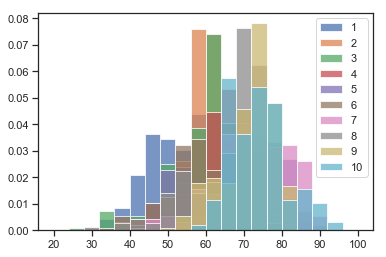

<Figure size 432x288 with 0 Axes>

In [1293]:
plt.subplots(1)
bins = np.linspace(20, 100, num=21)

for i in range(1,11):
    df = scores_raw[scores_raw["QuizNumber"] == i]["Score"]
    plt.hist(df, bins, alpha=0.75, label=str(i), density=True, rwidth = 10)
    
plt.legend(loc='upper right')
plt.subplots()
plt.clf()

#sns.catplot(data=a["Score"], x=a["Score"]["ScoreBucket"], kind="bar")

#sns.set(style="whitegrid")
#ax = sns.boxplot(x=scores_raw["scores"])
#sns.catplot(data=scores_raw, x=scores_raw["Scores"], kind="bar")

# a = pd.pivot_table(scores_raw, index=["ScoreBucket"],columns=["QuizNumber"],
#                aggfunc=len,fill_value=0)
# print(a)
#n, bins, patches = plt.hist(scores_raw["Score"], 30, facecolor='green', alpha=0.6)

In [ ]:
# filling in rows for students who are missing certain quizzes

new_rows = []
for i in range(1, scores_raw['StudentId'].nunique()+1): 
    for j in range(1, scores_raw['QuizNumber'].nunique()+1): 
        if len(scores_raw[(scores_raw['StudentId'] == i) & (scores_raw['QuizNumber'] == j)]) == 0:
            new_row = {'StudentId': [i], 
                       'QuizNumber': [j],
                       'Score': [np.nan]}
            new_row_df = pd.DataFrame(data=new_row)
            new_rows.append(new_row_df)

scores_raw = scores_raw.append(pd.concat(new_rows), ignore_index=False)
scores_raw.sort_values(['StudentId', 'QuizNumber'], inplace=True)
scores_raw.reset_index(drop=True)

In [1692]:
bins = np.linspace(20, 100, num=21)
scores_raw['ScoreBucket'] = pd.cut(scores_raw["Score"], bins)
a = pd.pivot_table(scores_raw, index=["ScoreBucket"],columns=["QuizNumber"],
                aggfunc=len,fill_value=0)

In [155]:
# define key helper function #2 (profiling dataframes)

def dataframe_profile(dataframe):
    
    print('Top 5 Rows')
    print(dataframe.head())
    
    print('\nDataframe Info (Entries, Nulls, Data Types)')
    print(dataframe.info())
    
    print('\nDataframe Description By Column')
    print(dataframe.describe(include='all'))
    
    for i in range(len(dataframe.columns)): 
        print('\nValue Counts For', dataframe.columns[i], "Column")
        print(dataframe.groupby(dataframe.columns[i]).size())
    
#     for i in range(len(dataframe.columns)):
#         for j in range(i, len(dataframe.columns)):
#             if i != j: 
                
#                 print('\nValue Counts For', dataframe.columns[j], "And", dataframe.columns[i], "Columns")
#                 grouped_views_1 = dataframe.groupby([dataframe.columns[j], dataframe.columns[i]]).size().unstack()
#                 print(grouped_views_1)
                
#                 grouped_views_2 = dataframe.groupby([dataframe.columns[j]]).size().fillna(0)
#                 pcnt_of_totals = grouped_views_1.fillna(0).divide(grouped_views_2,axis=0)
#                 bar_chart_with_legend(pcnt_of_totals, dataframe.columns[j], '% of Total', 'Distribution of ' + dataframe.columns[i] + ' by ' + dataframe.columns[j])
            

In [157]:
dataframe_profile(students_raw)

Top 5 Rows
   StudentId        Race Gender  ClassId   Teacher
0          6     Martian      M        1  TeacherA
1         14    Venutian      F        1  TeacherA
2         22   Atlantean     NB        1  TeacherA
3         30   Atlantean      F        1  TeacherA
4         38  Liliputian      M        1  TeacherA

Dataframe Info (Entries, Nulls, Data Types)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
StudentId    240 non-null int64
Race         240 non-null object
Gender       240 non-null object
ClassId      240 non-null int64
Teacher      240 non-null object
dtypes: int64(2), object(3)
memory usage: 9.5+ KB
None

Dataframe Description By Column
        StudentId       Race Gender     ClassId   Teacher
count   240.00000        240    240  240.000000       240
unique        NaN          4      3         NaN         4
top           NaN  Atlantean      M         NaN  TeacherB
freq          NaN         94    105         NaN    

In [ ]:
# confirm numeric data types in each dataframe

numeric_dtypes = [np.dtype('int64'), np.dtype('float64')]

cols_to_check = ['QuizNumber', 'ClassId']
assert groups_raw[cols_to_check].apply(lambda x: x.dtype).isin(numeric_dtypes).all()

cols_to_check = ['StudentId', 'ClassId']
assert students_raw[cols_to_check].apply(lambda x: x.dtype).isin(numeric_dtypes).all()

cols_to_check = ['StudentId', 'QuizNumber', 'Score']
assert scores_raw[cols_to_check].apply(lambda x: x.dtype).isin(numeric_dtypes).all()